In [30]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [31]:
data=pd.read_csv("new_customers.csv")
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data=data.iloc[:,1:].values
data=data.astype(float)
scalar=MinMaxScaler()
data=scalar.fit_transform(data)

### Hierarchical Clustering class 

In [32]:
class HC:
    def linkages(self,data,link_type):
        return linkage(data,link_type)
    def Dendogram(self,mat):
        dendrogram(mat)

### Implementing Hierarchical clustering on customers dataset

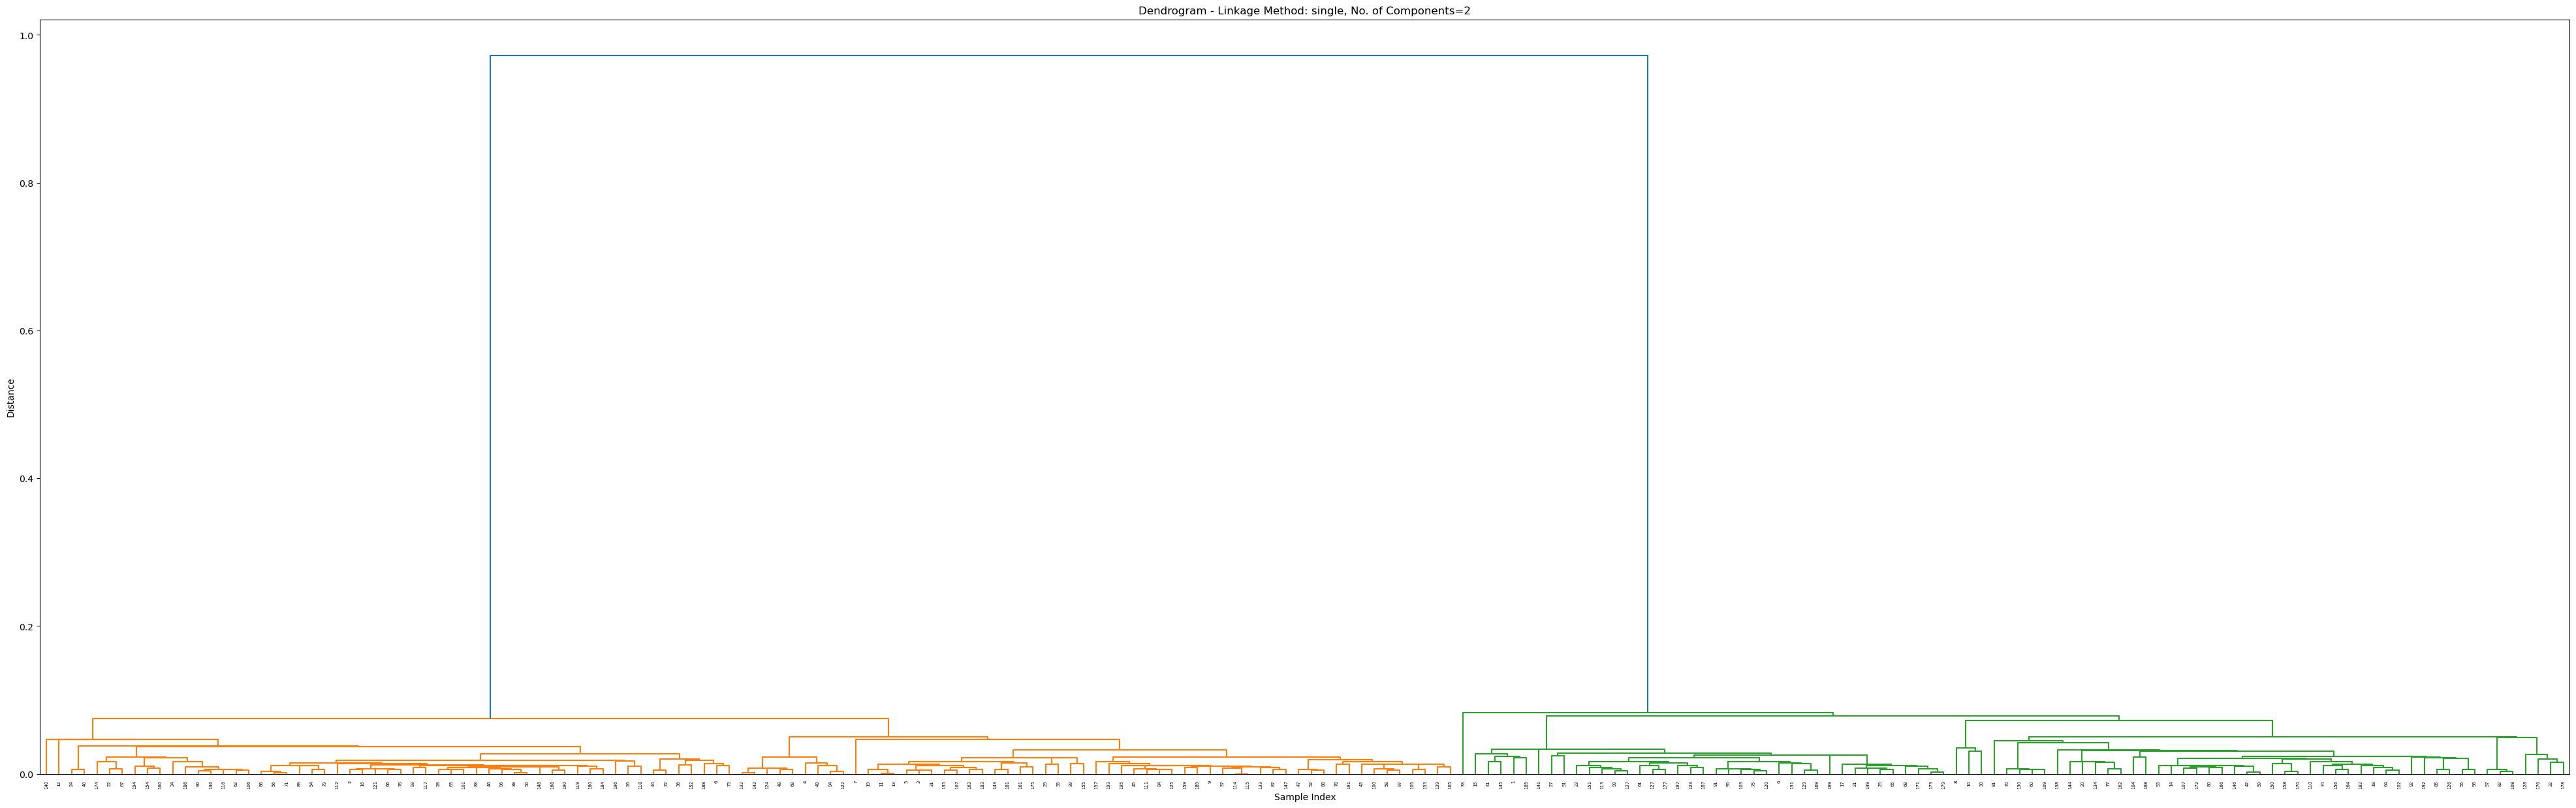

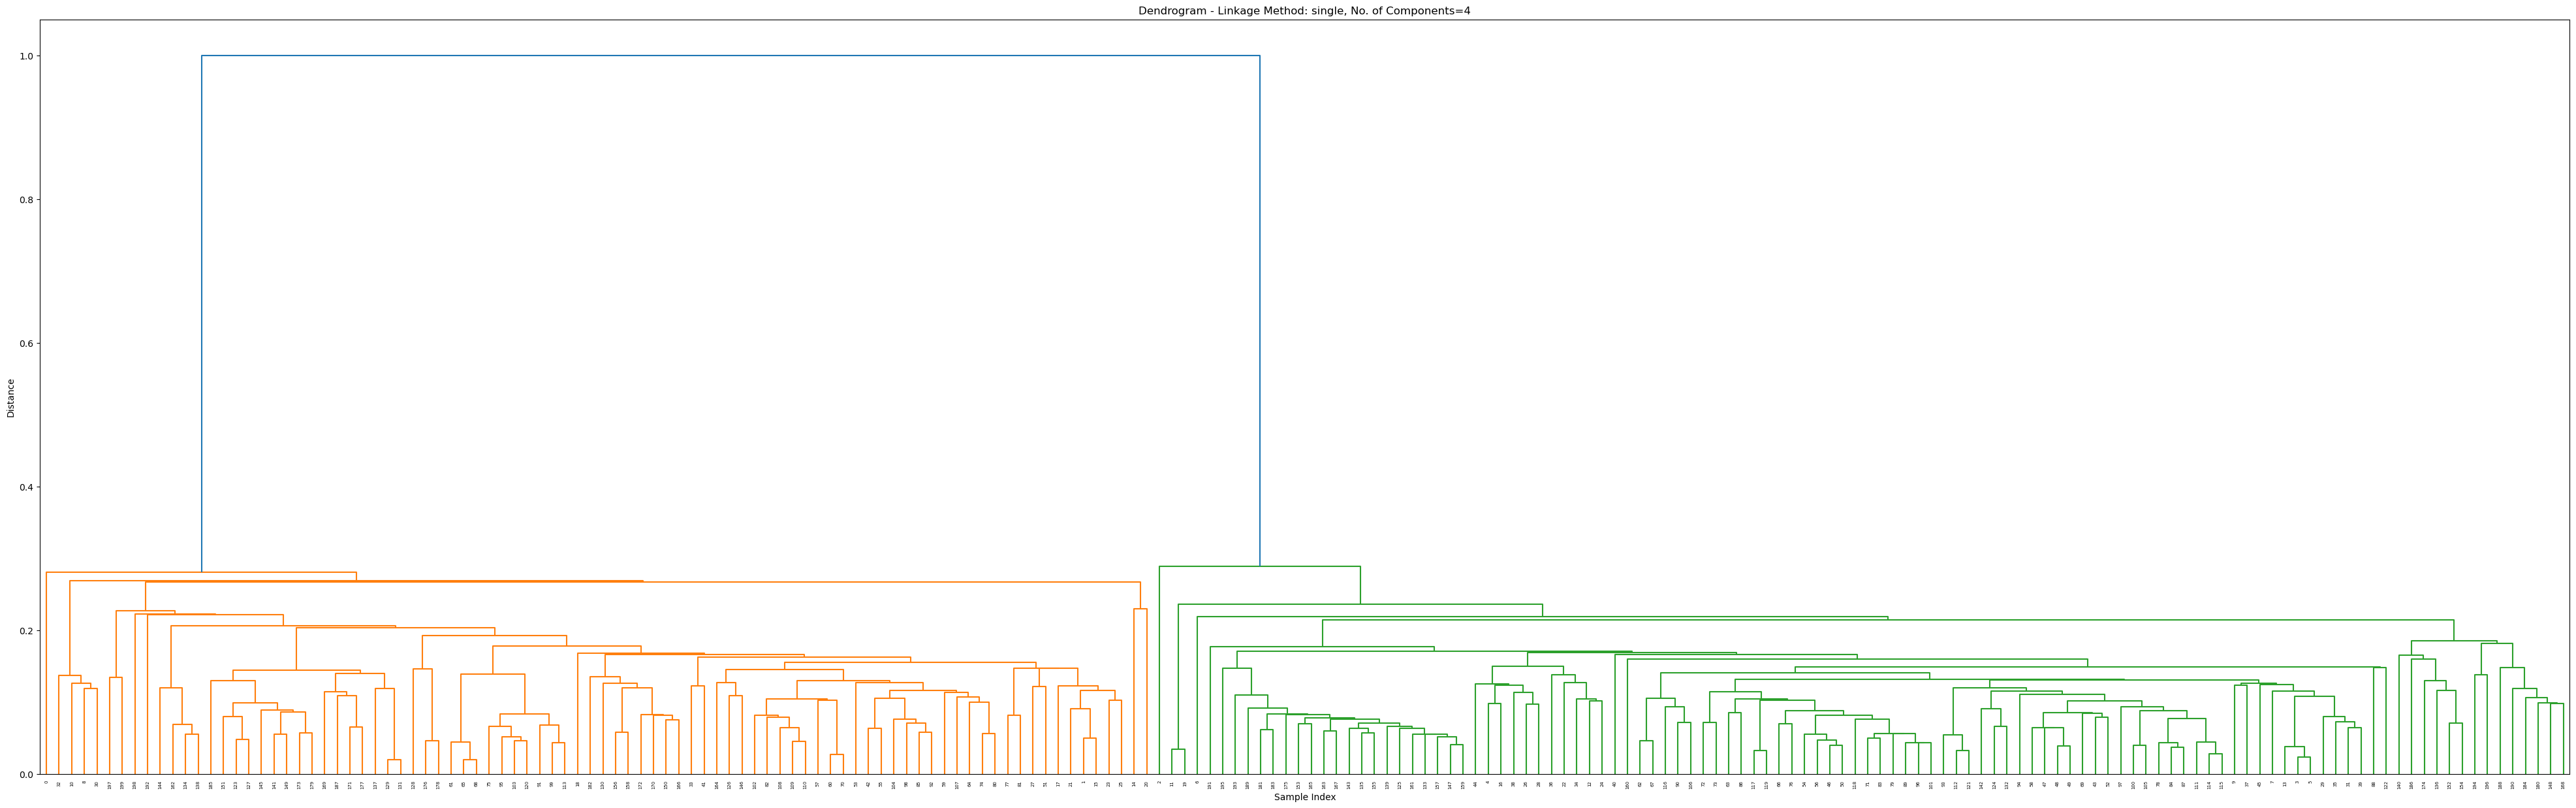

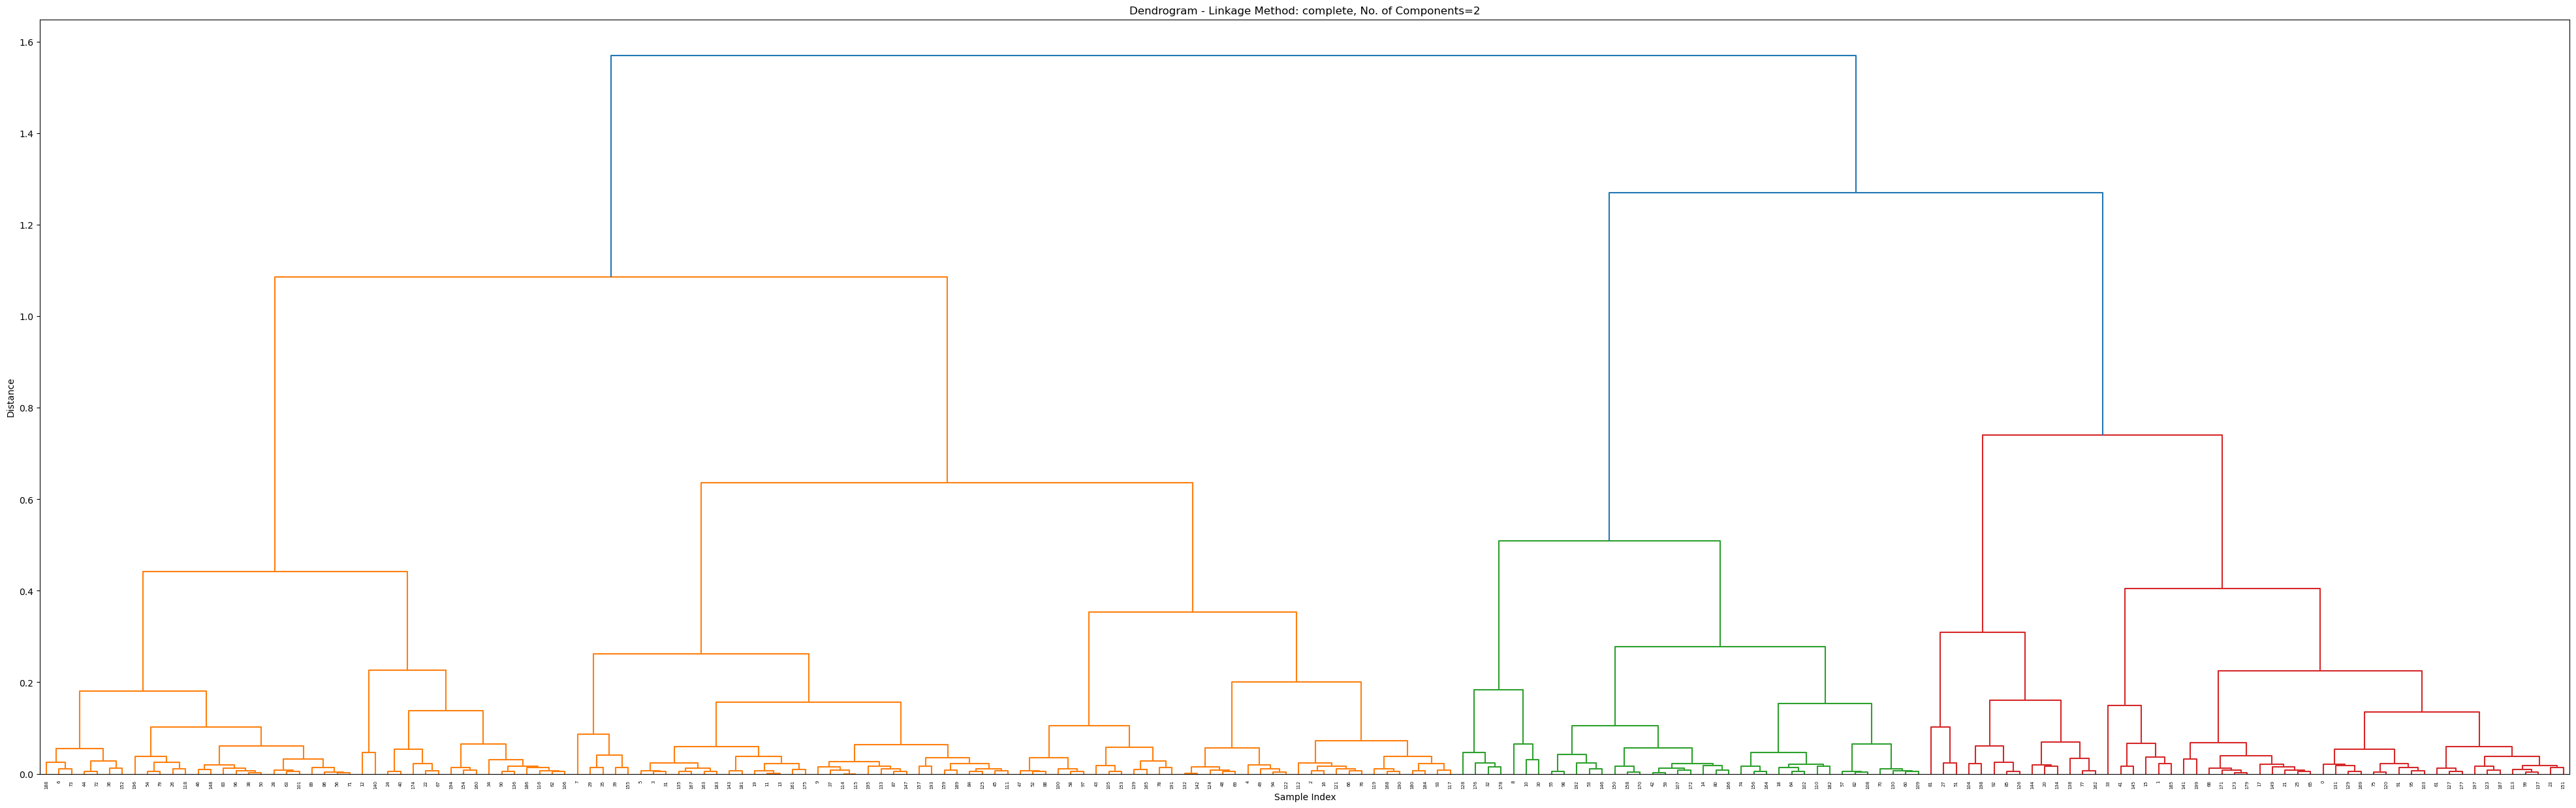

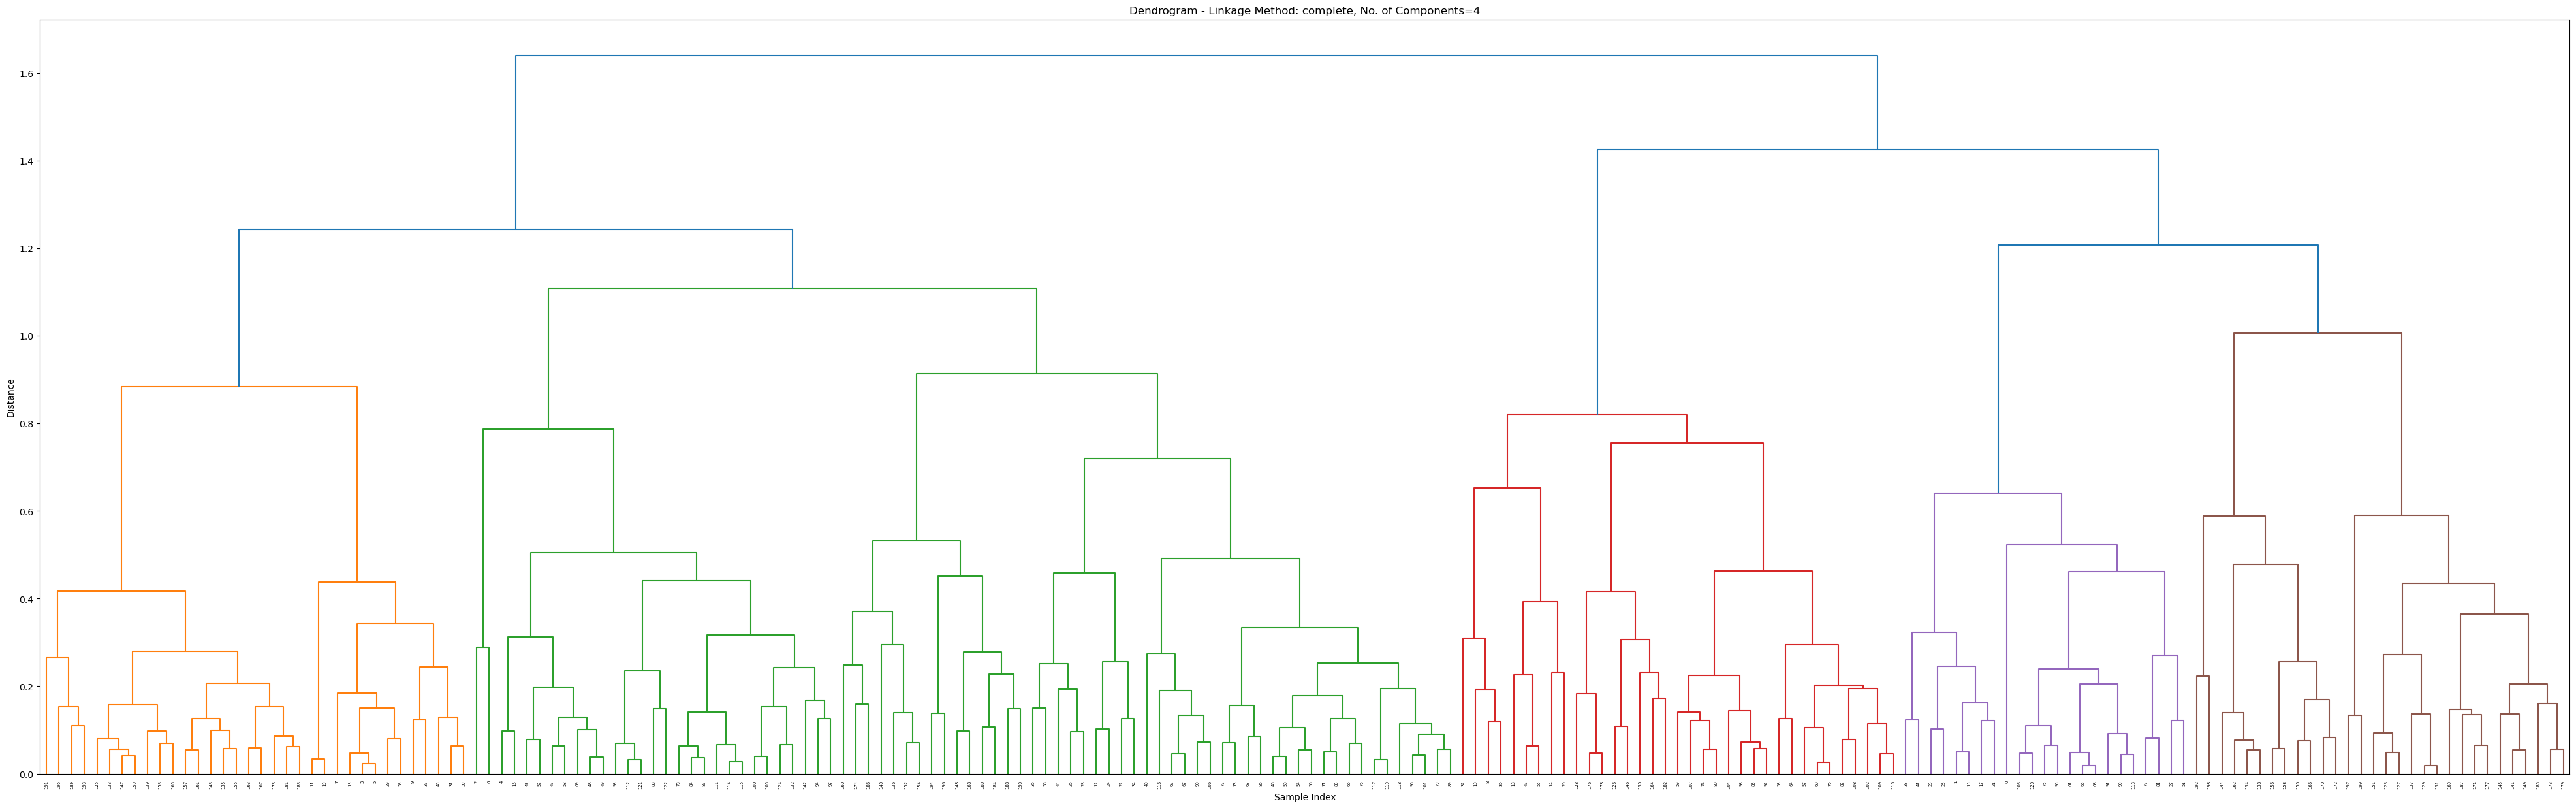

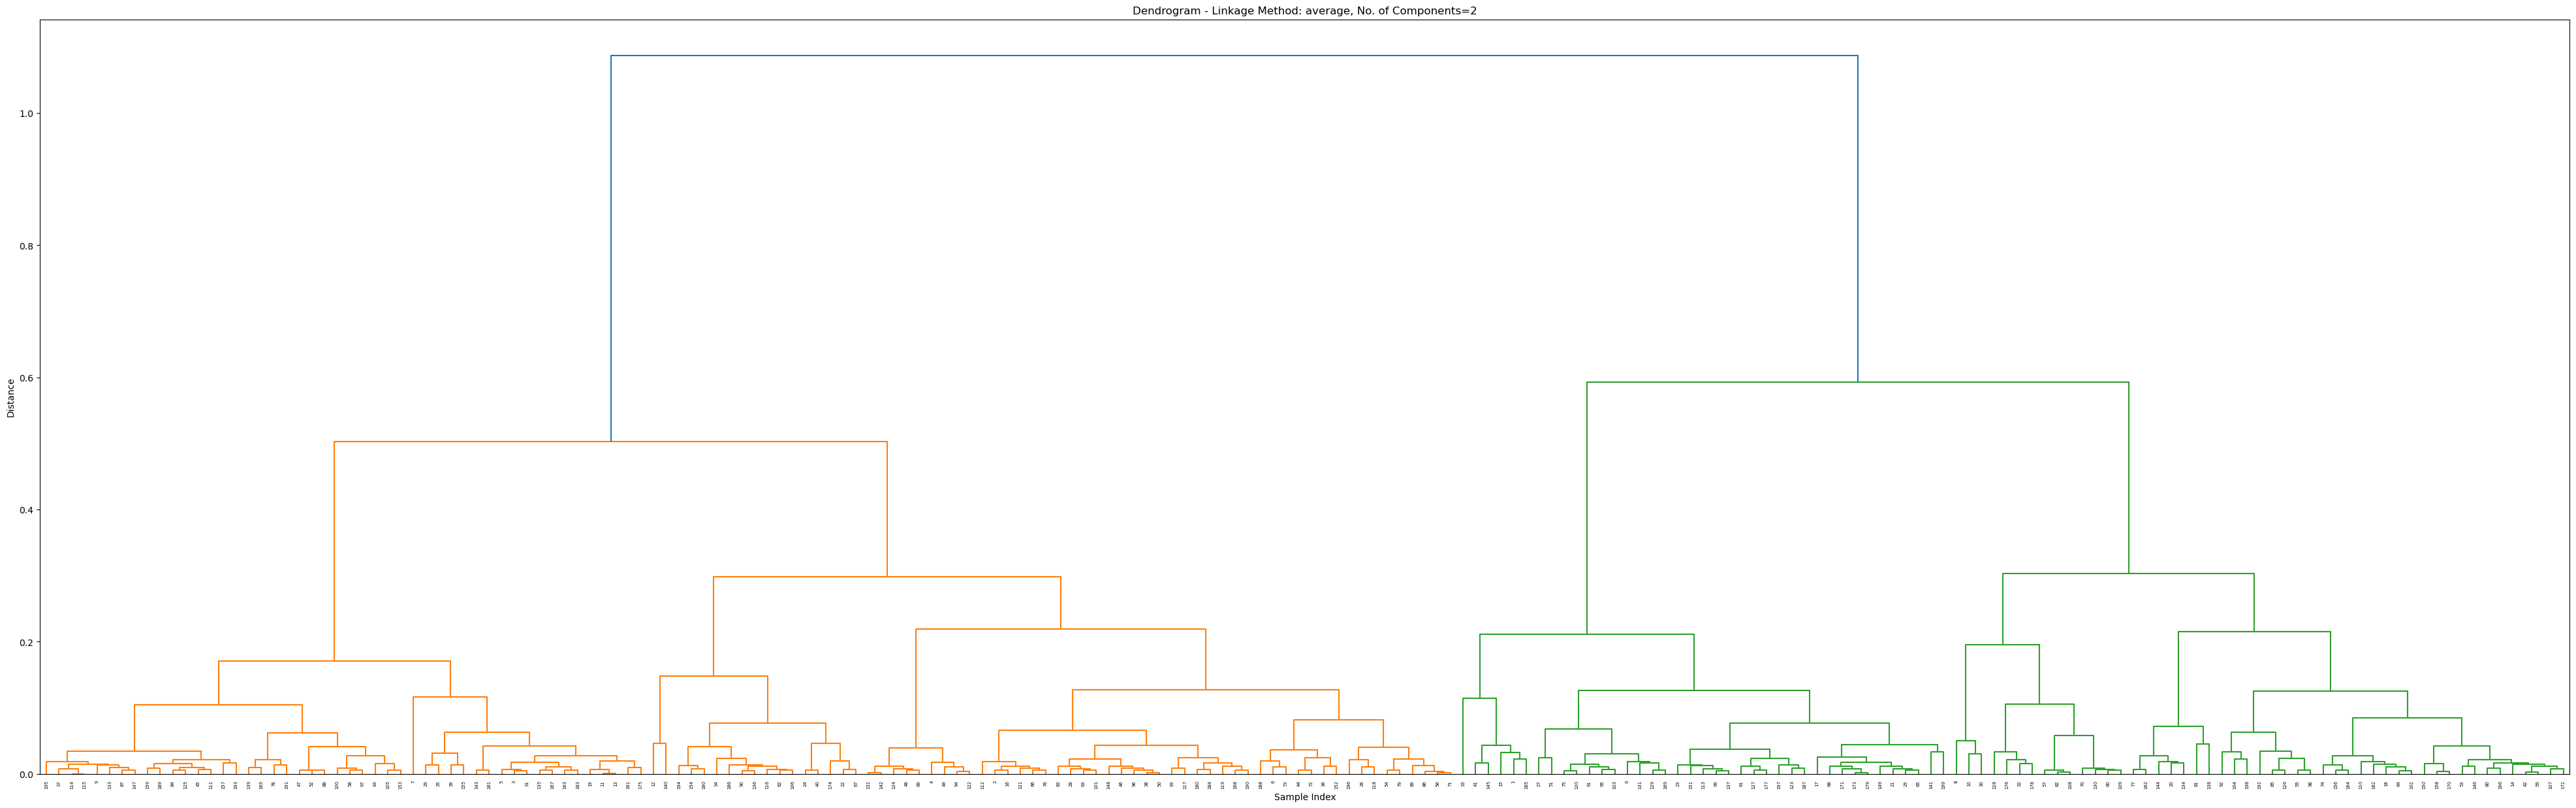

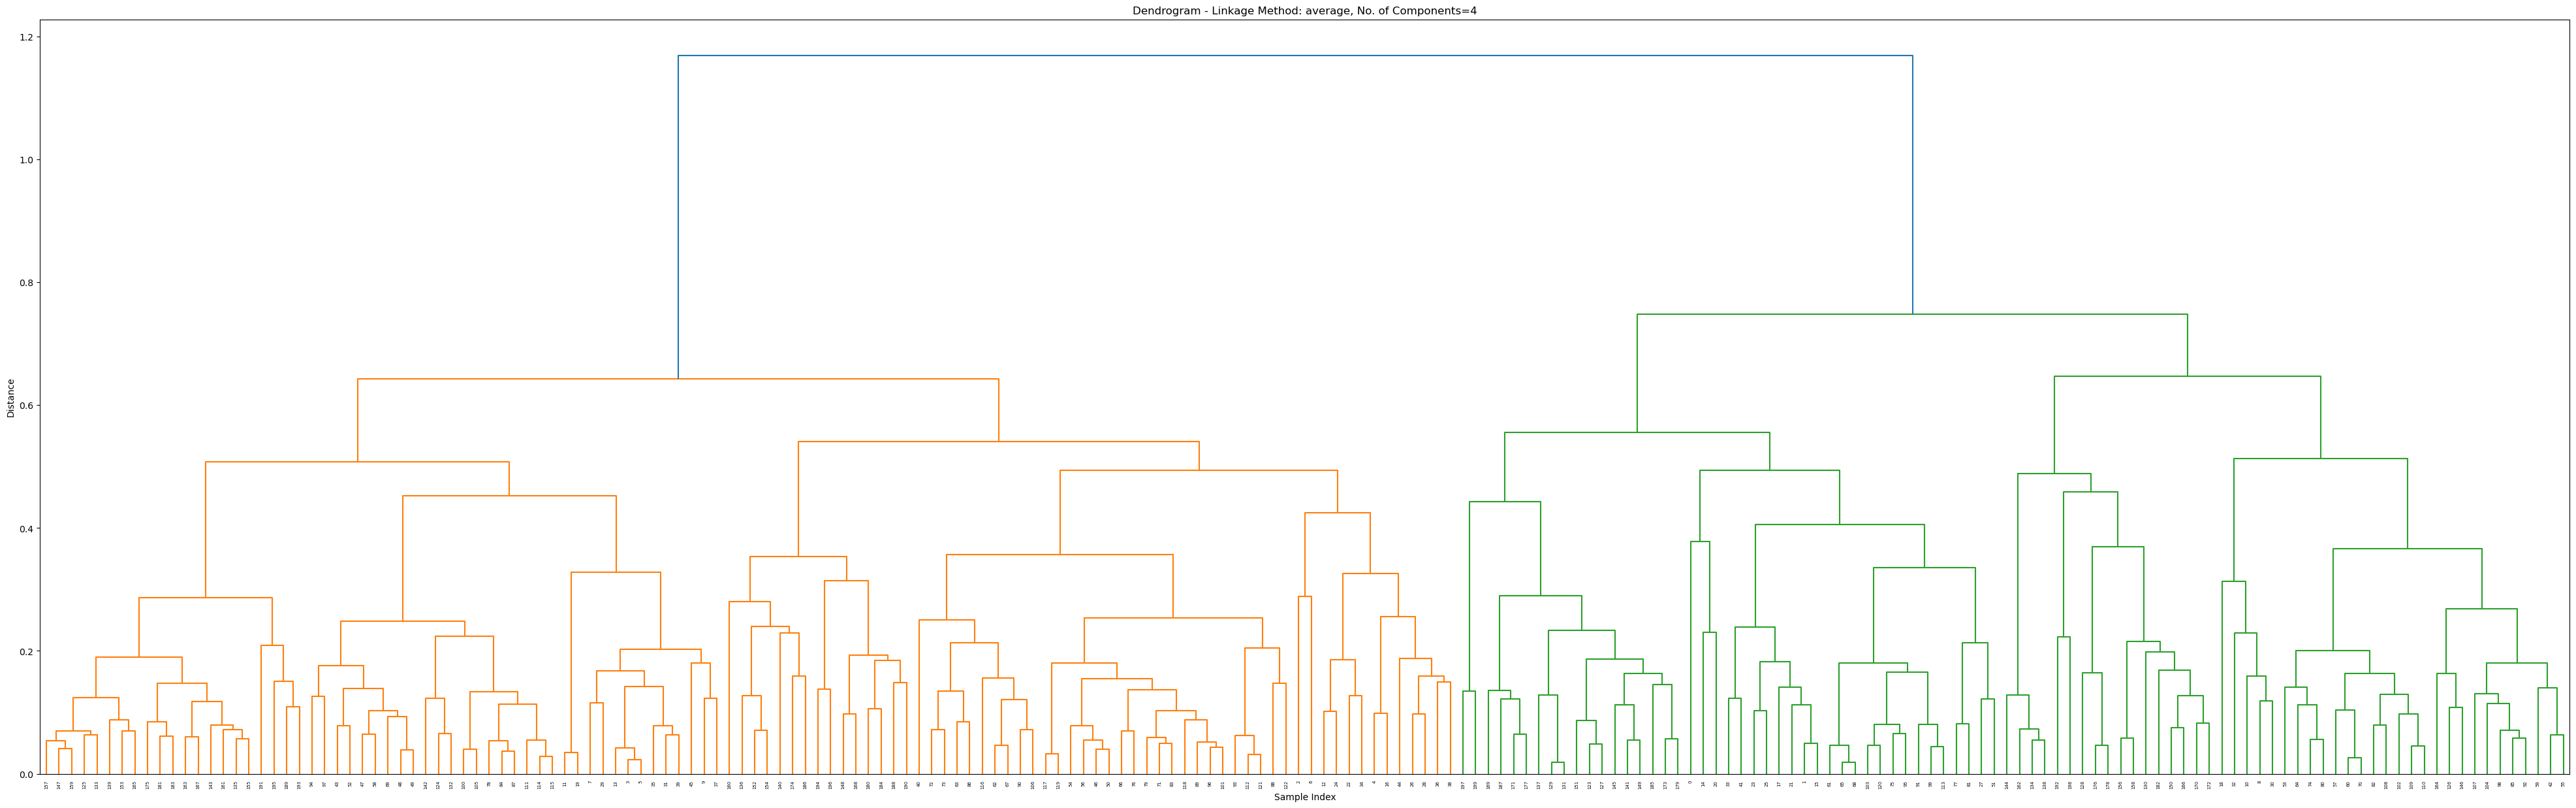

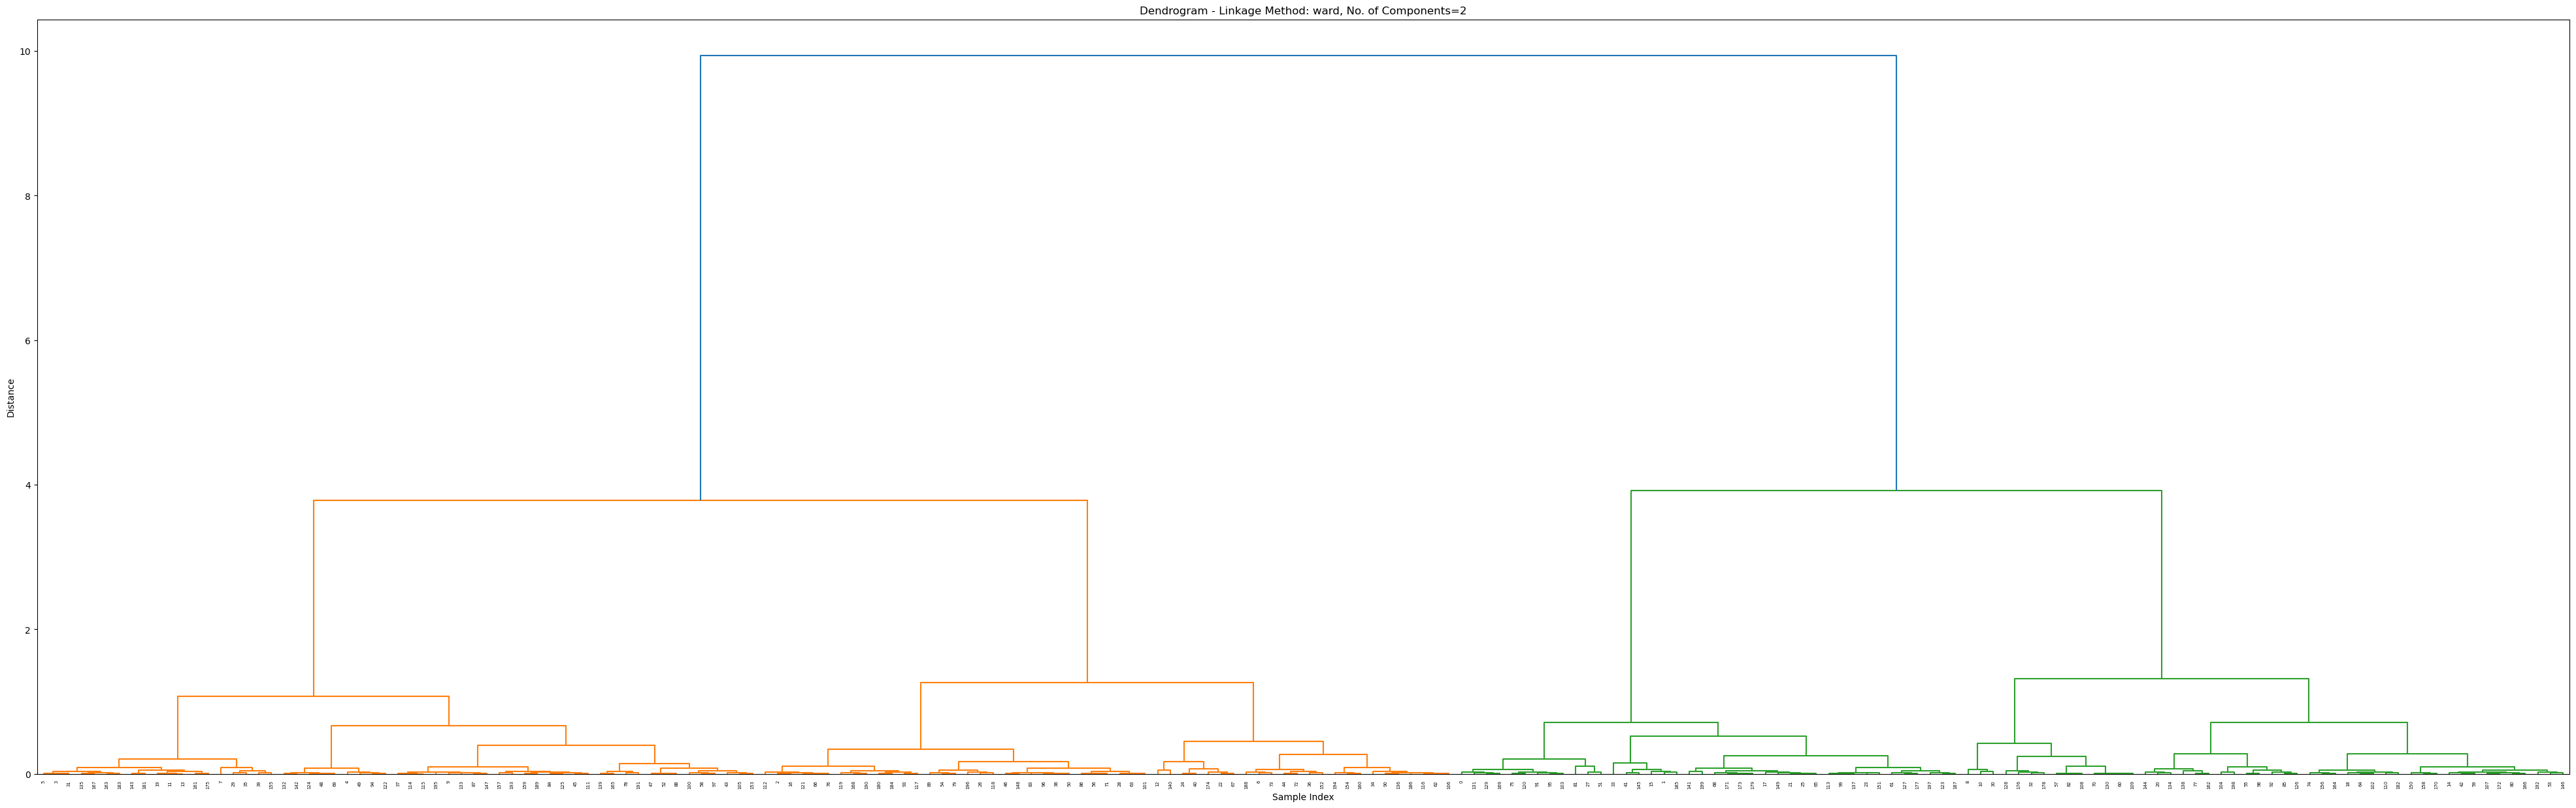

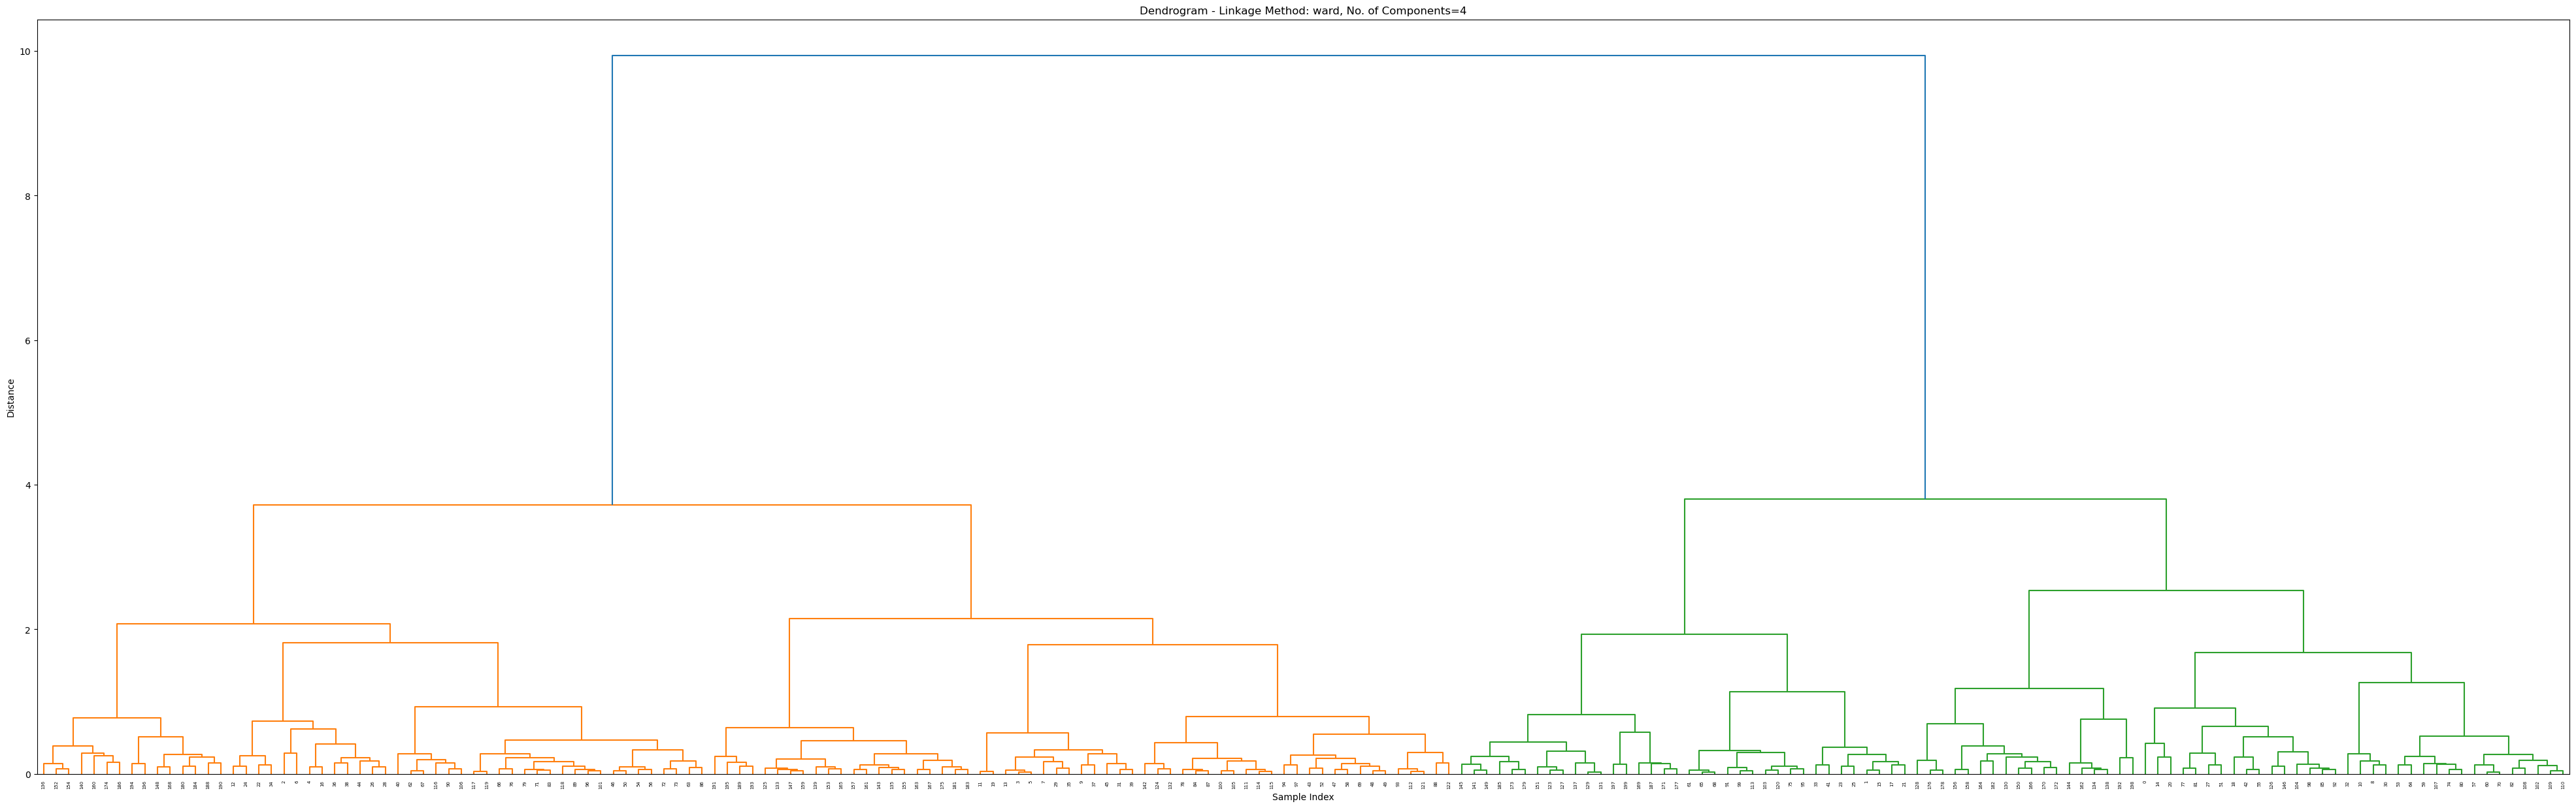

In [33]:
links=['single','complete','average','ward']
n_comps=[2,4]
hc=HC()
for l in links:
    for n in n_comps:
        pca=PCA(n_components=n)
        data_pca=pca.fit_transform(data)
        plt.figure(figsize=(50, 15))
        Z=hc.linkages(data_pca,l)
        plt.title(f"Dendrogram - Linkage Method: {l}, No. of Components={n}")
        hc.Dendogram(Z)
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

### Observations from the dendograms
> Single linkage creates chaining effects, where small clusters are gradually linked together through their nearest neighbors. This leads to long and thin clusters. We see a large number of clusters being formed at a smaller height in the dendogram.

> Other linkages does not lead to such thin and chained clusters.
> Complete linkage leads to more compact clusters, unlike the chains formed in single link.

> Average linkage leads to moderately compact clusters, a balance between single and complete linkage.

> Ward linkage minimizes the variance within clusters, resulting in compact and internally homogeneous clusters. It tends to merge clusters at higher heights compared to other methods, emphasizing well defined groupings.

> Using small number of pc's can lead to loss of fine-grained details in the data leading to emphasis to only the most significant patterns in data.

### Implementing Hierarchical clustering on gene dataset

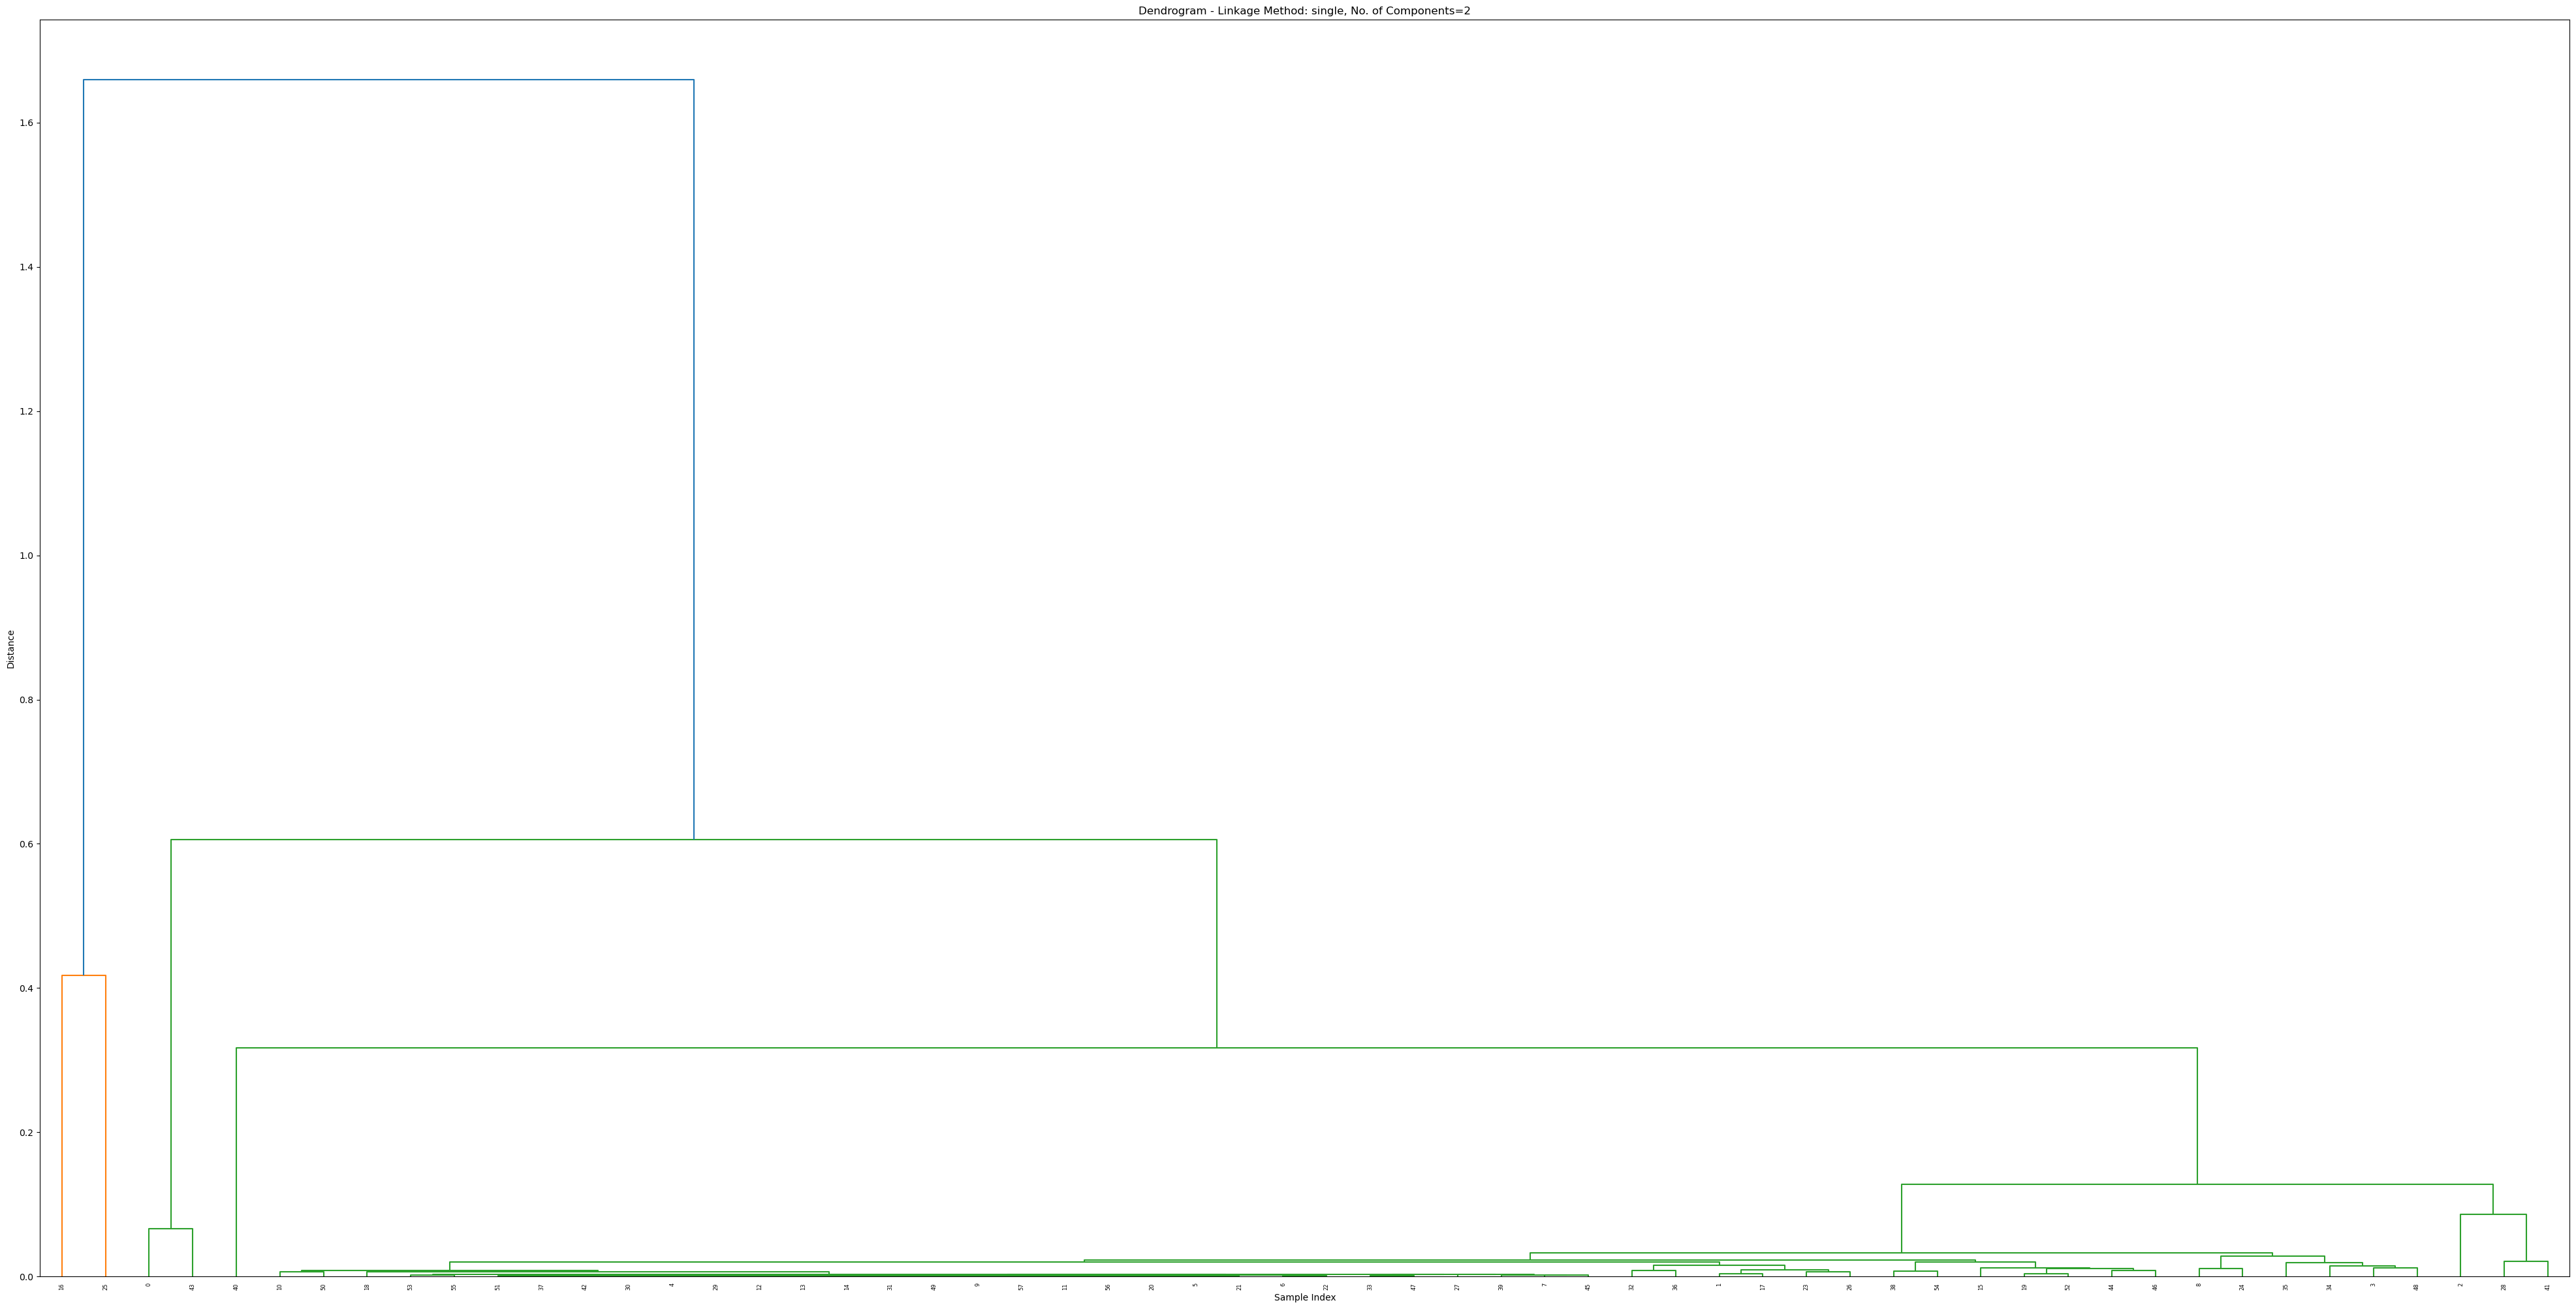

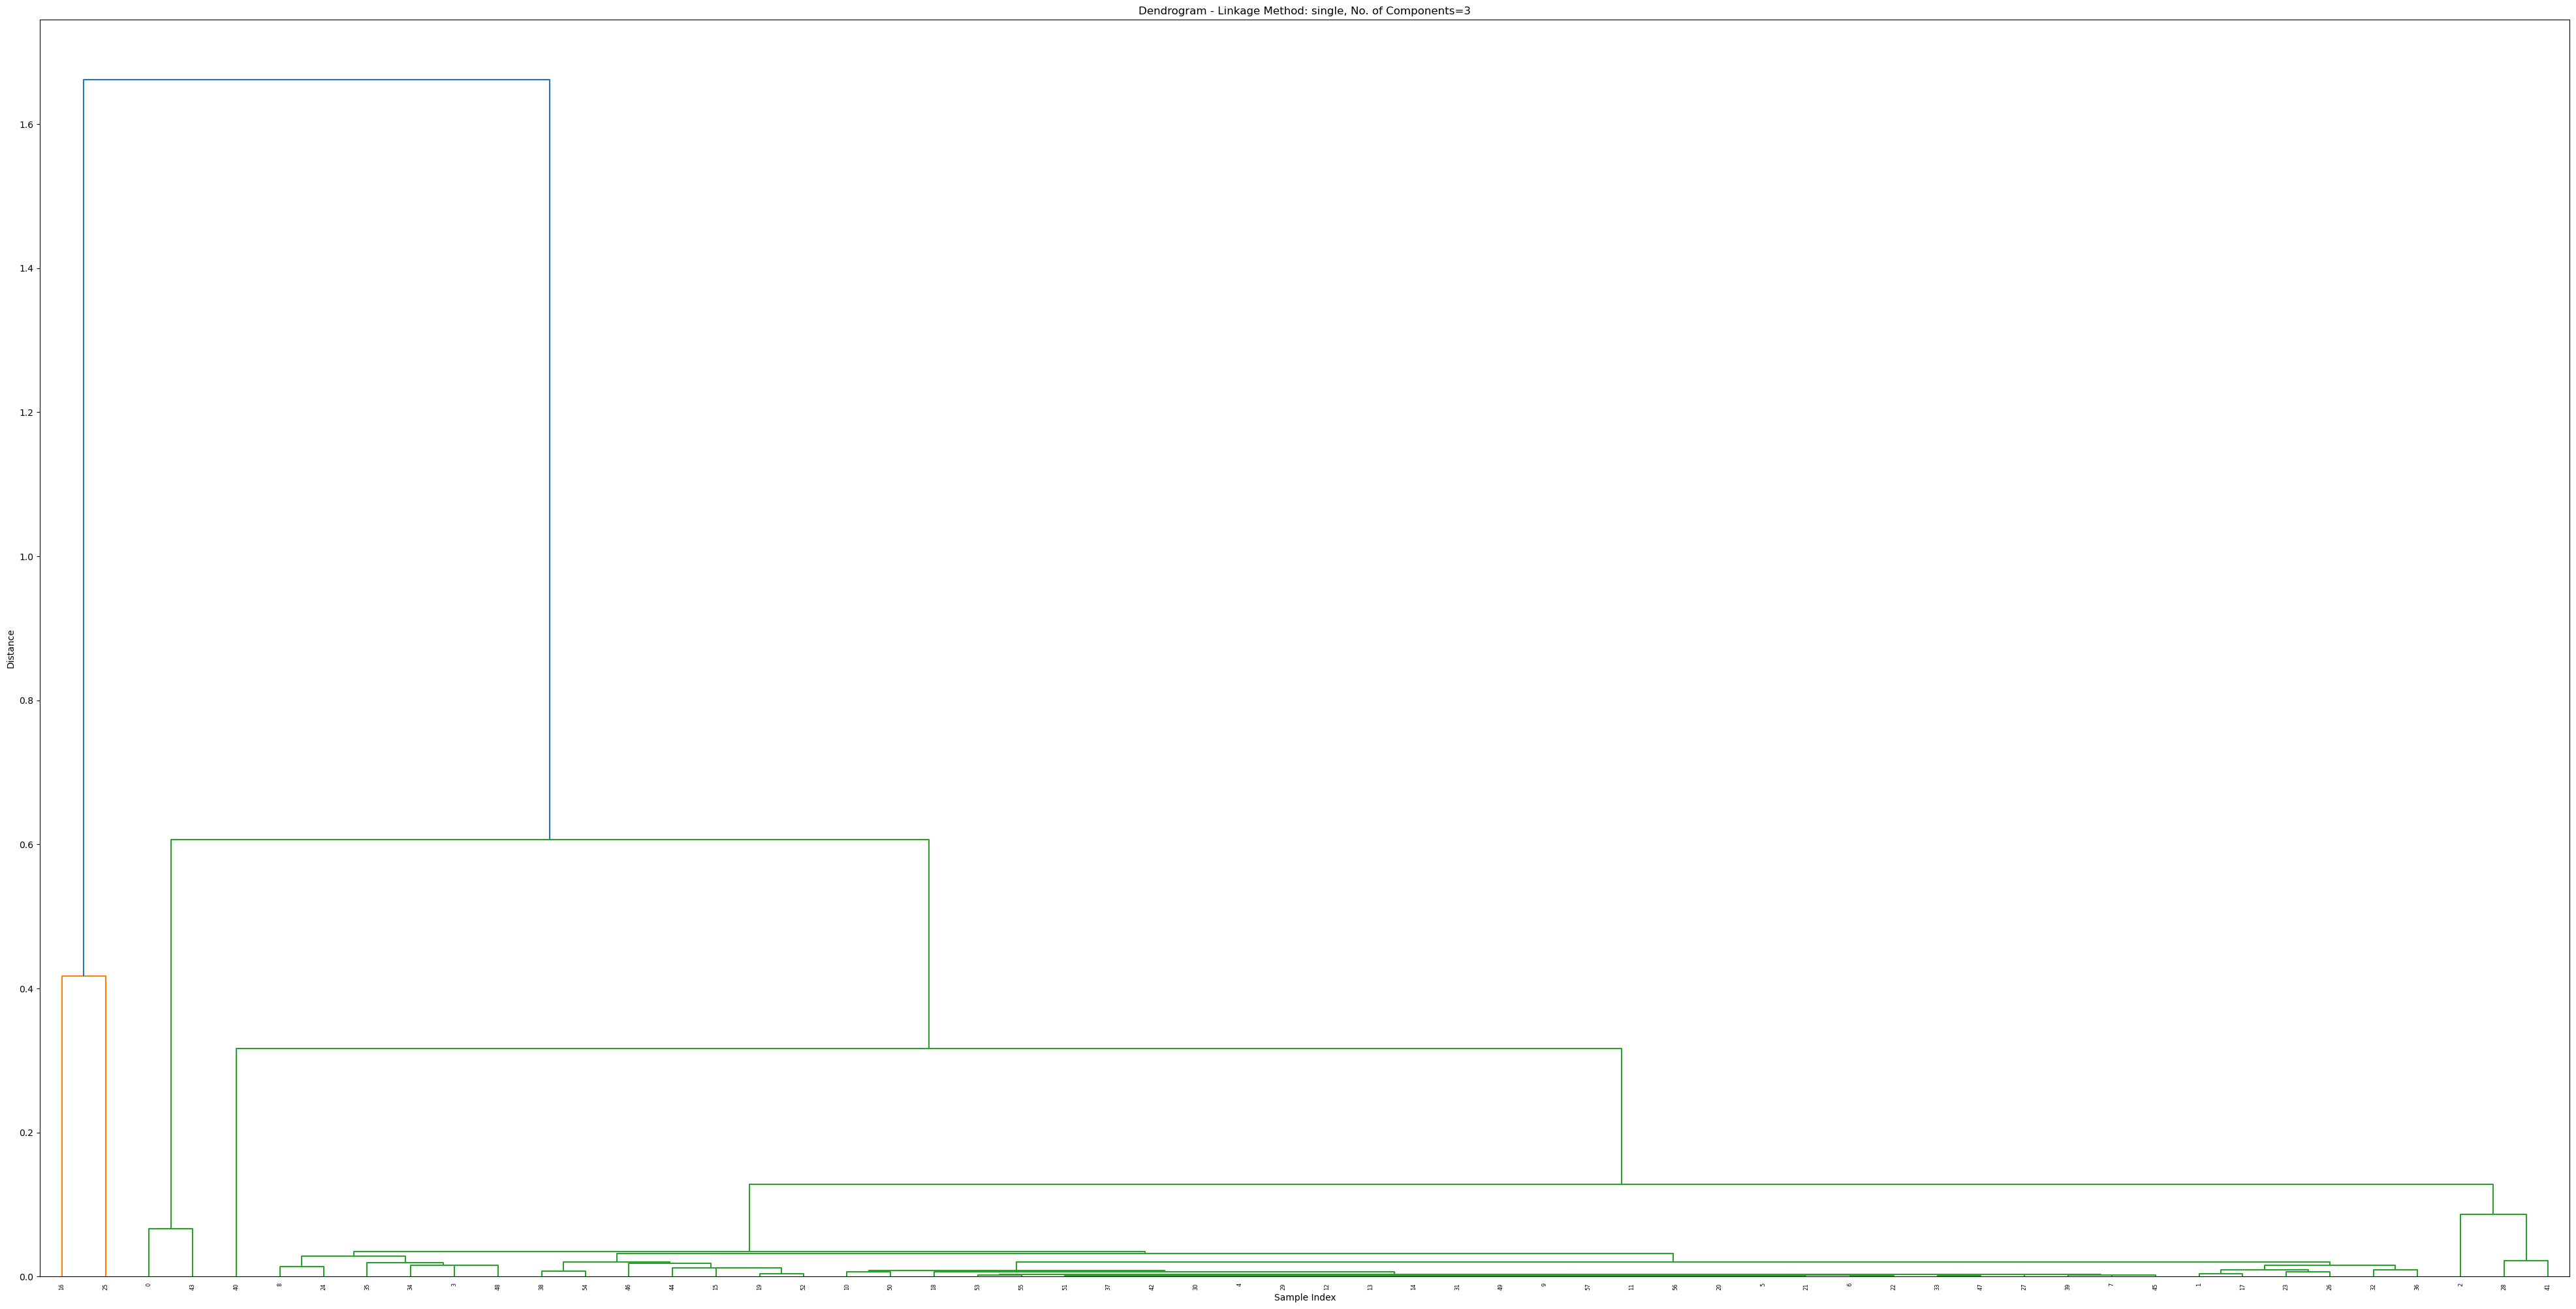

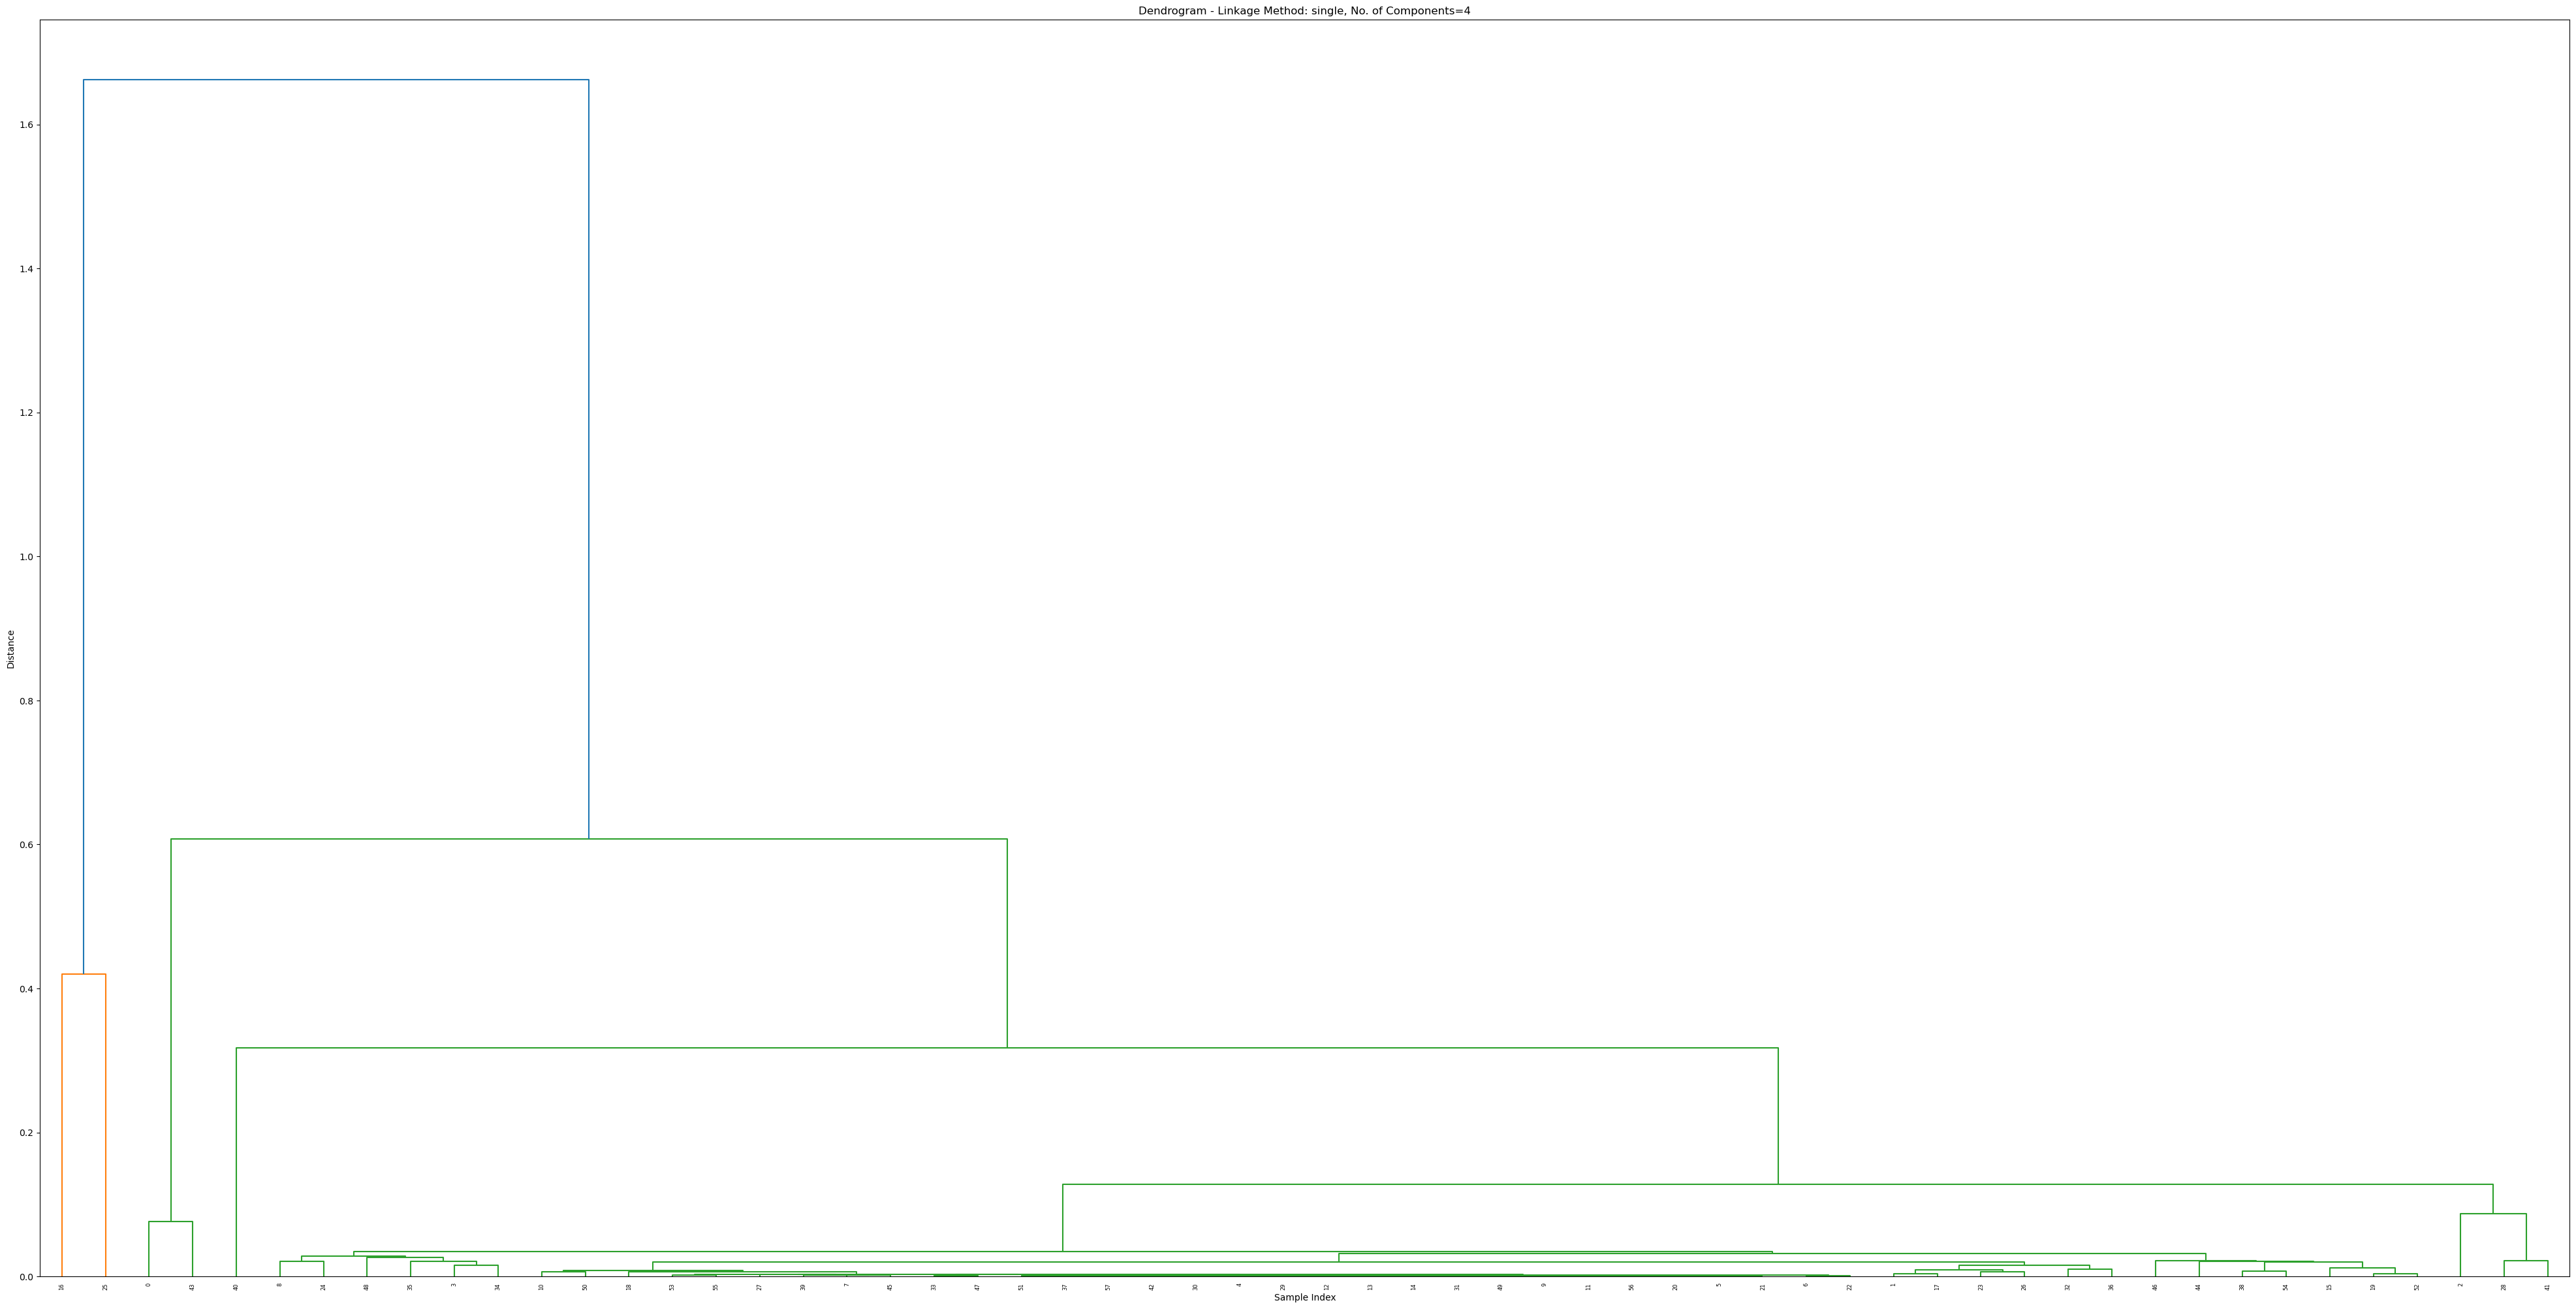

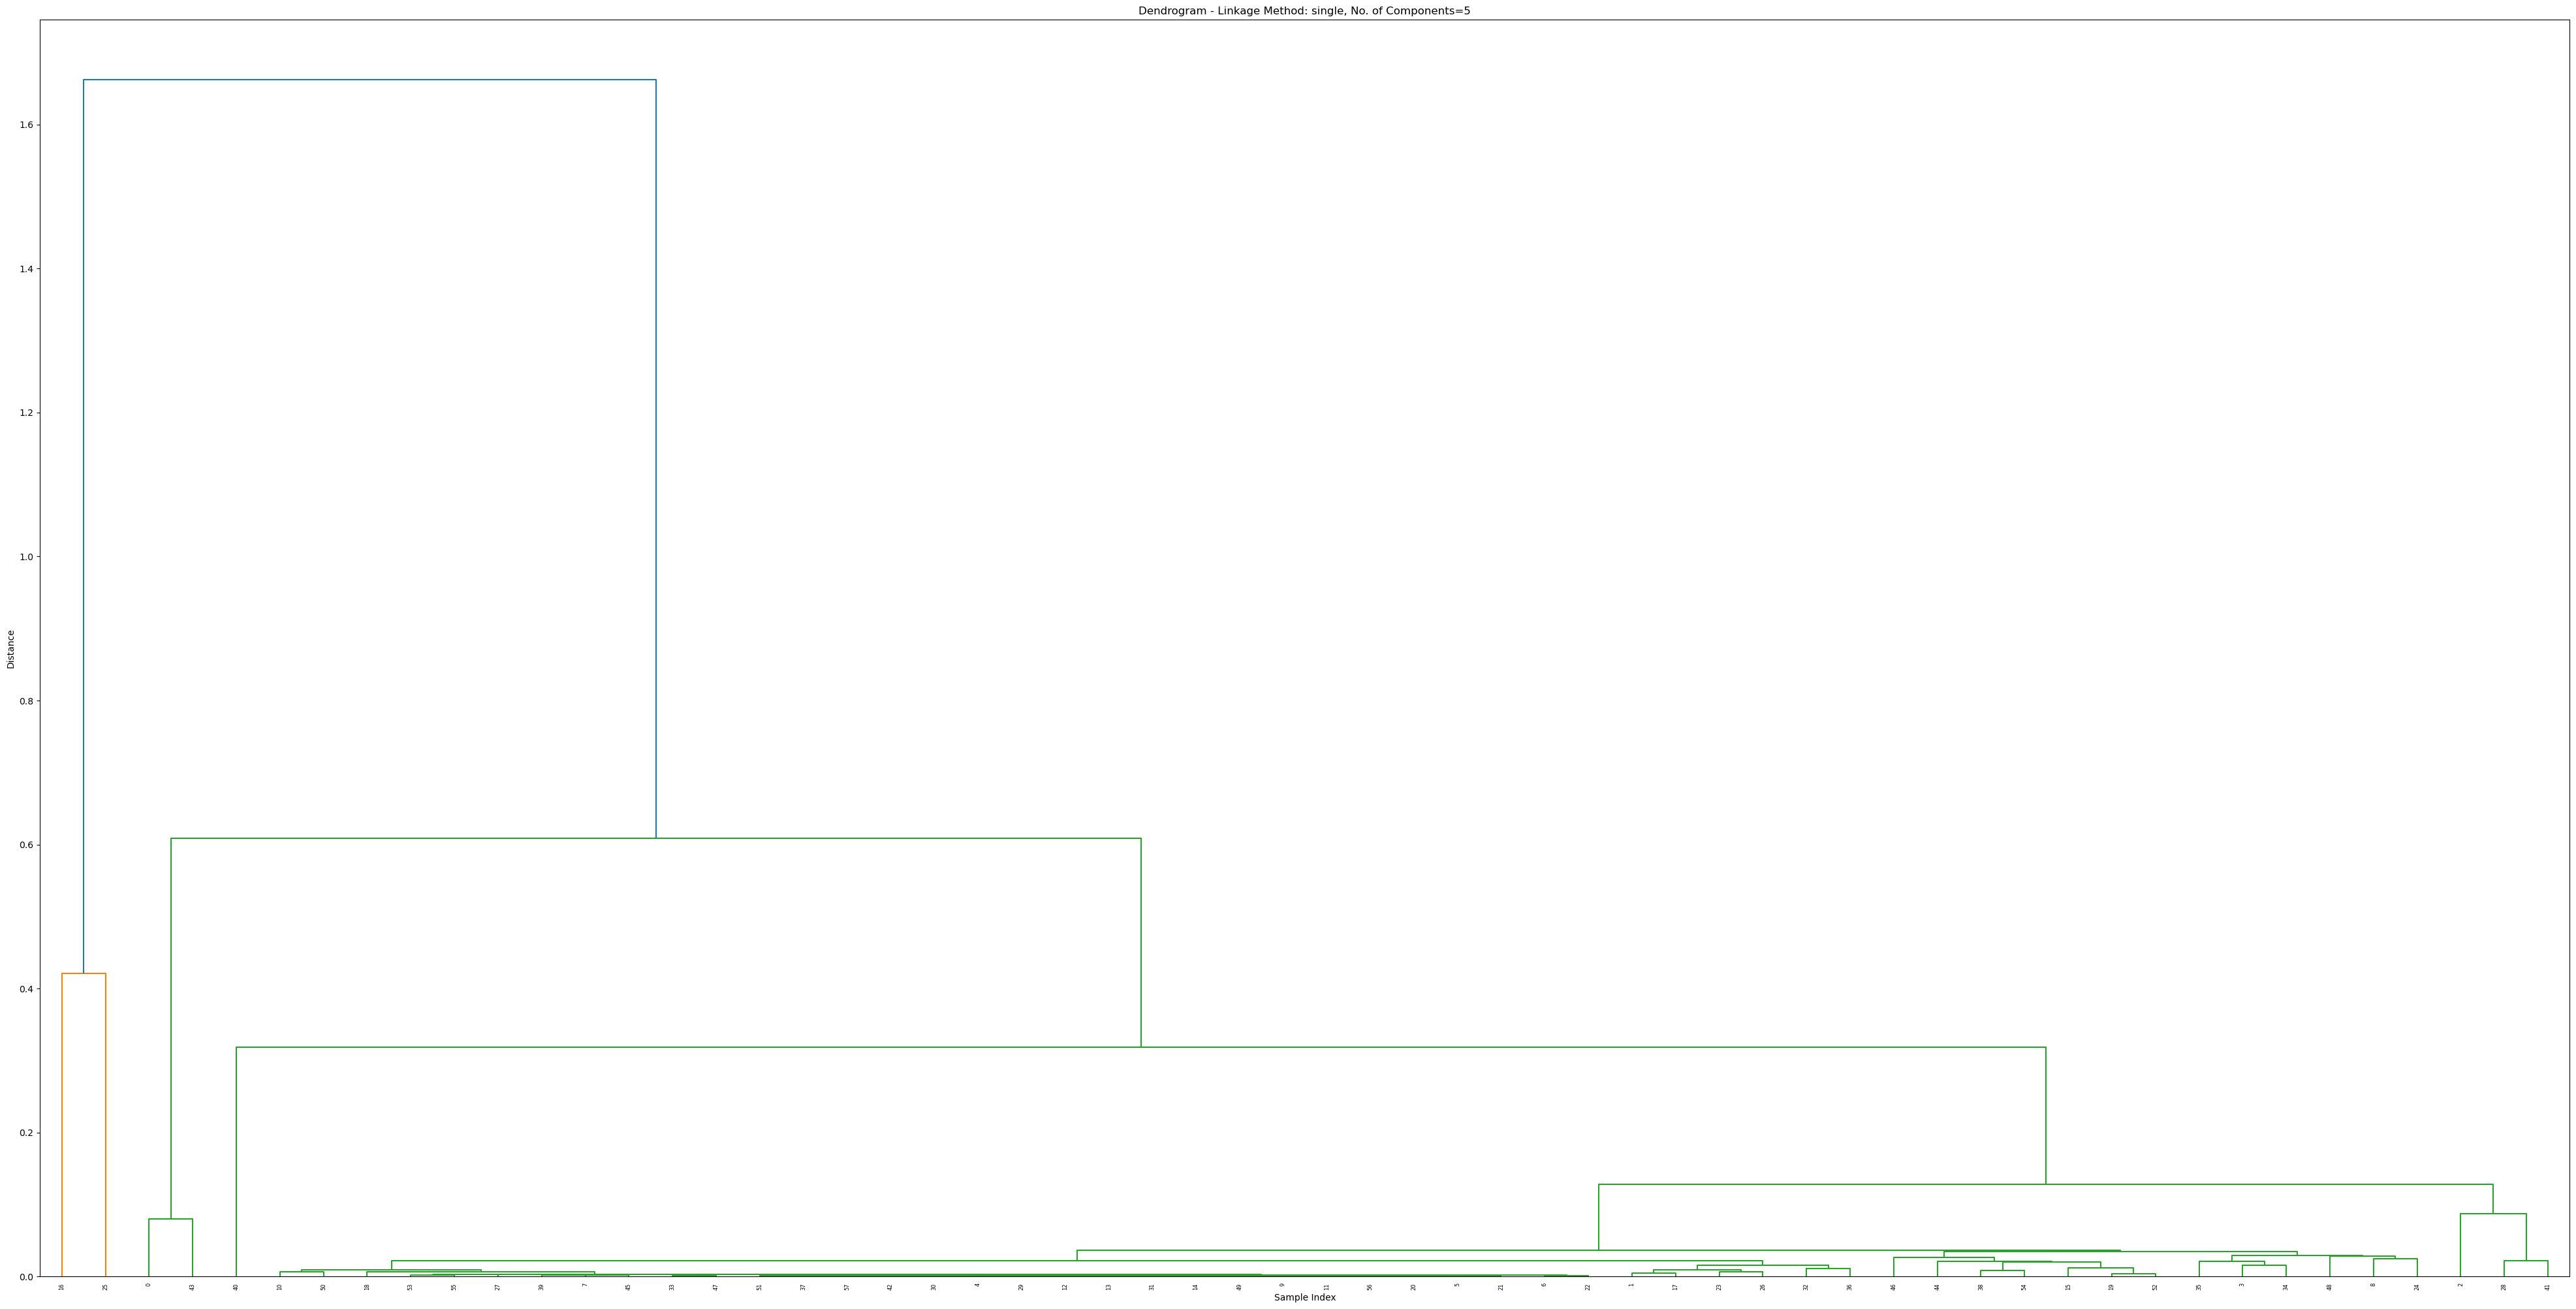

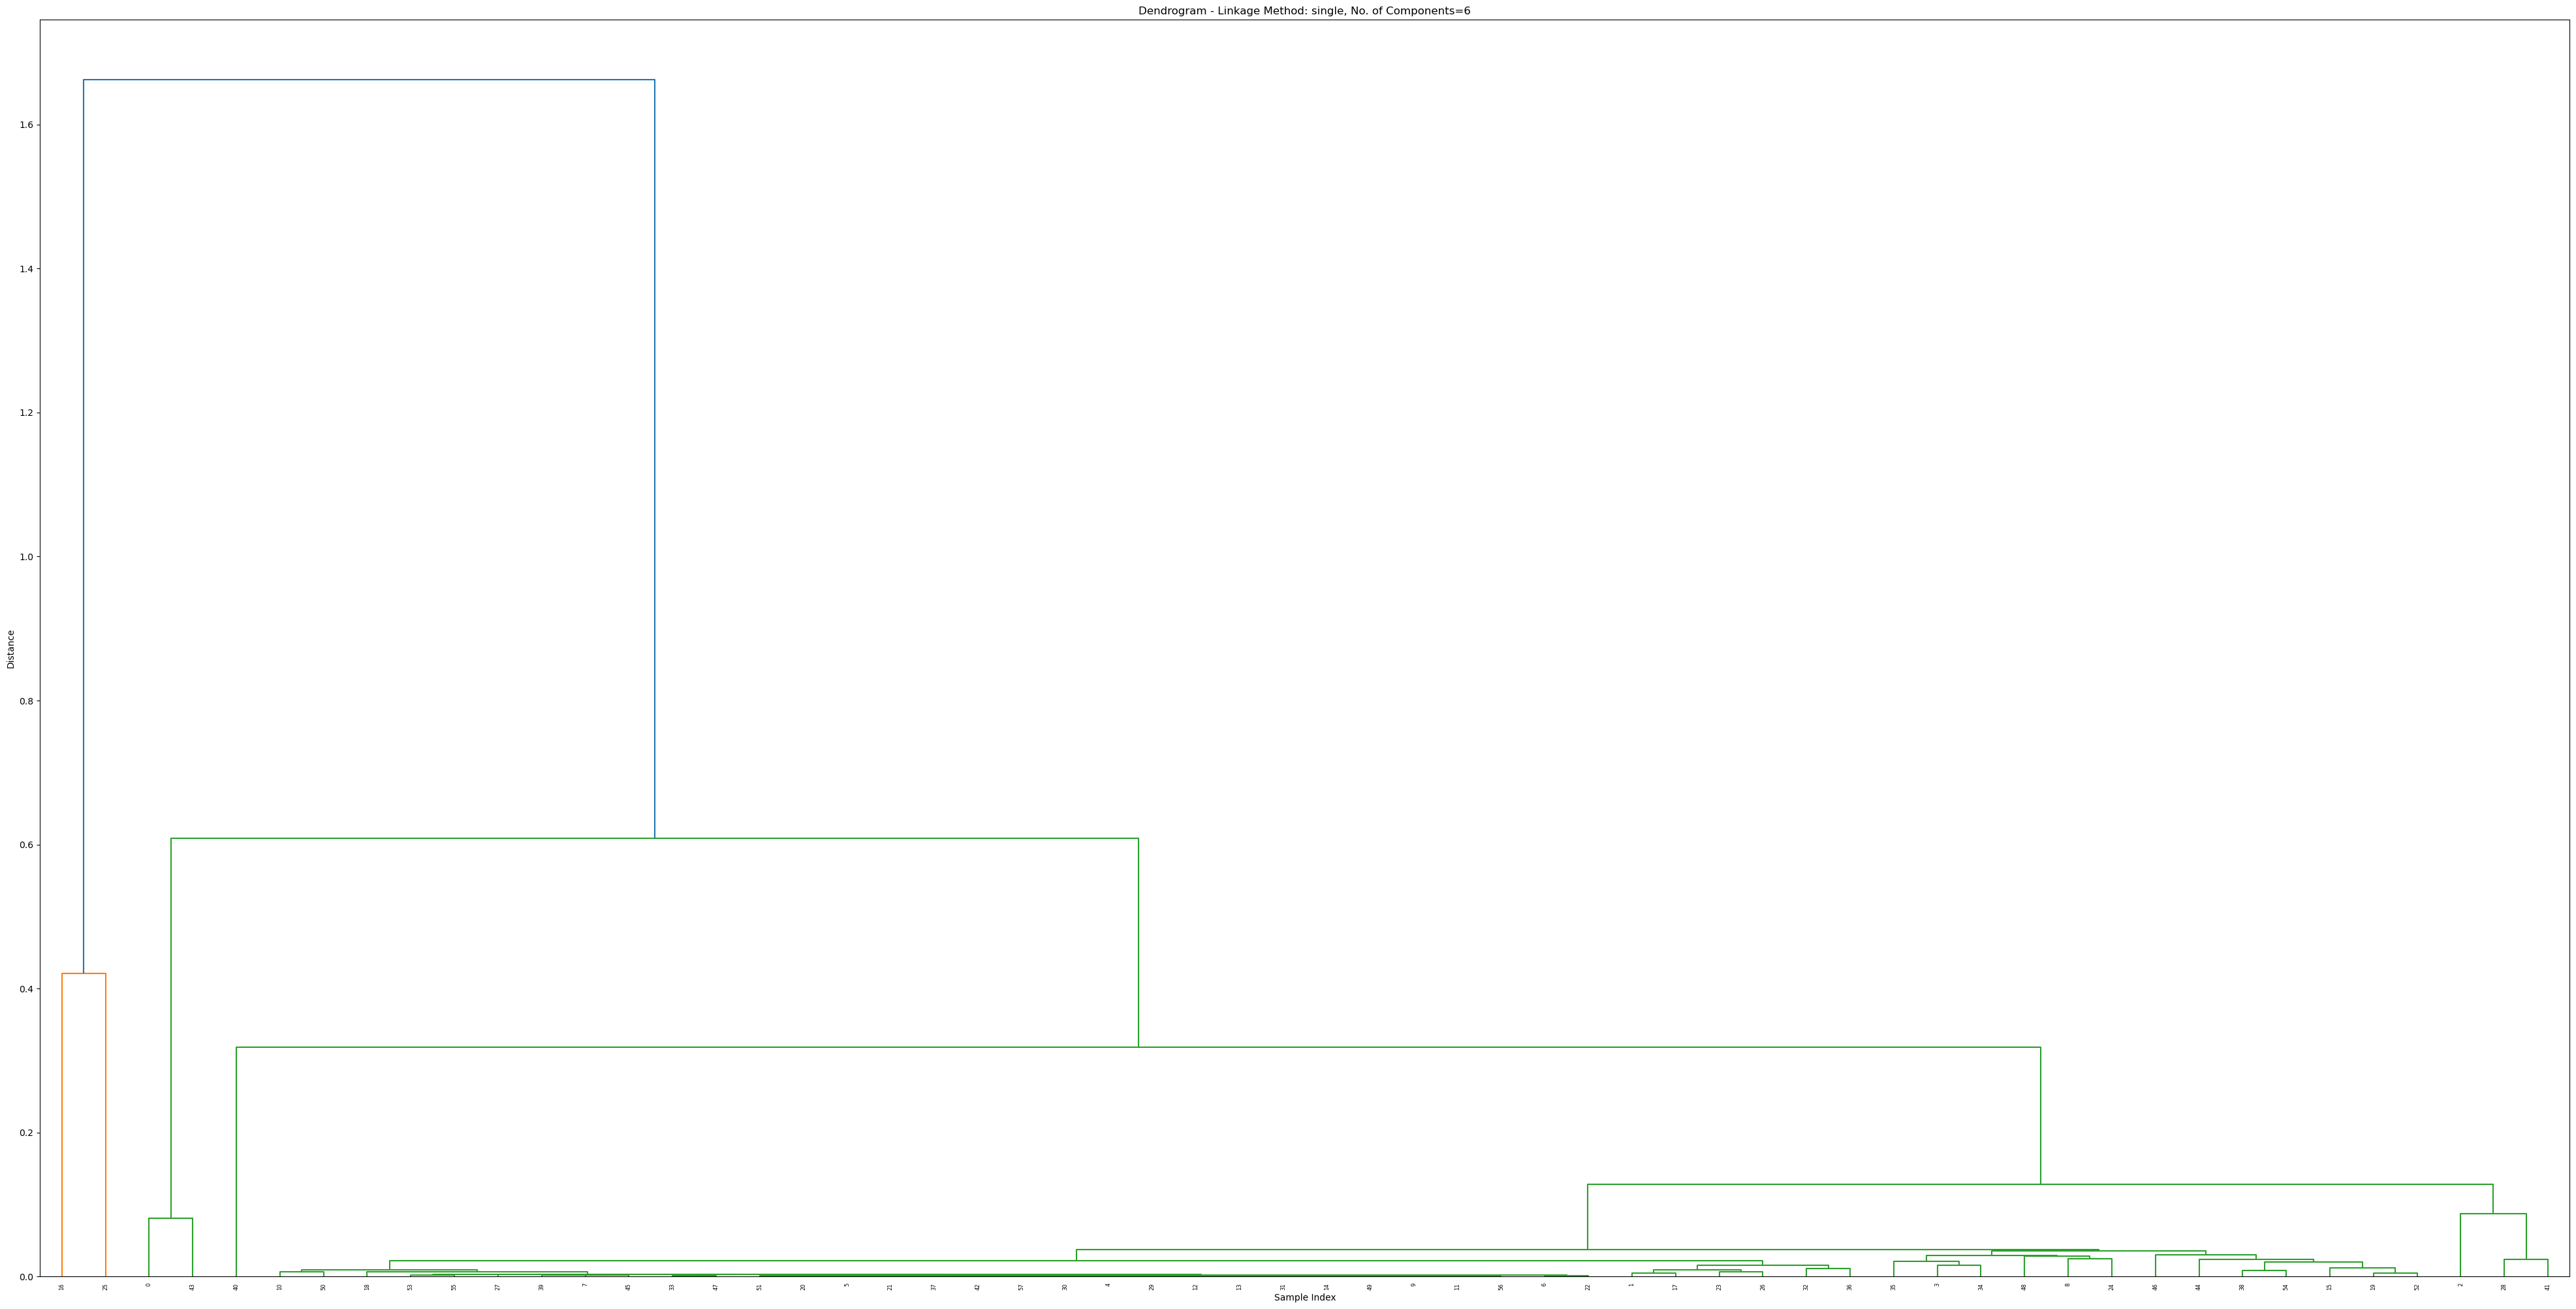

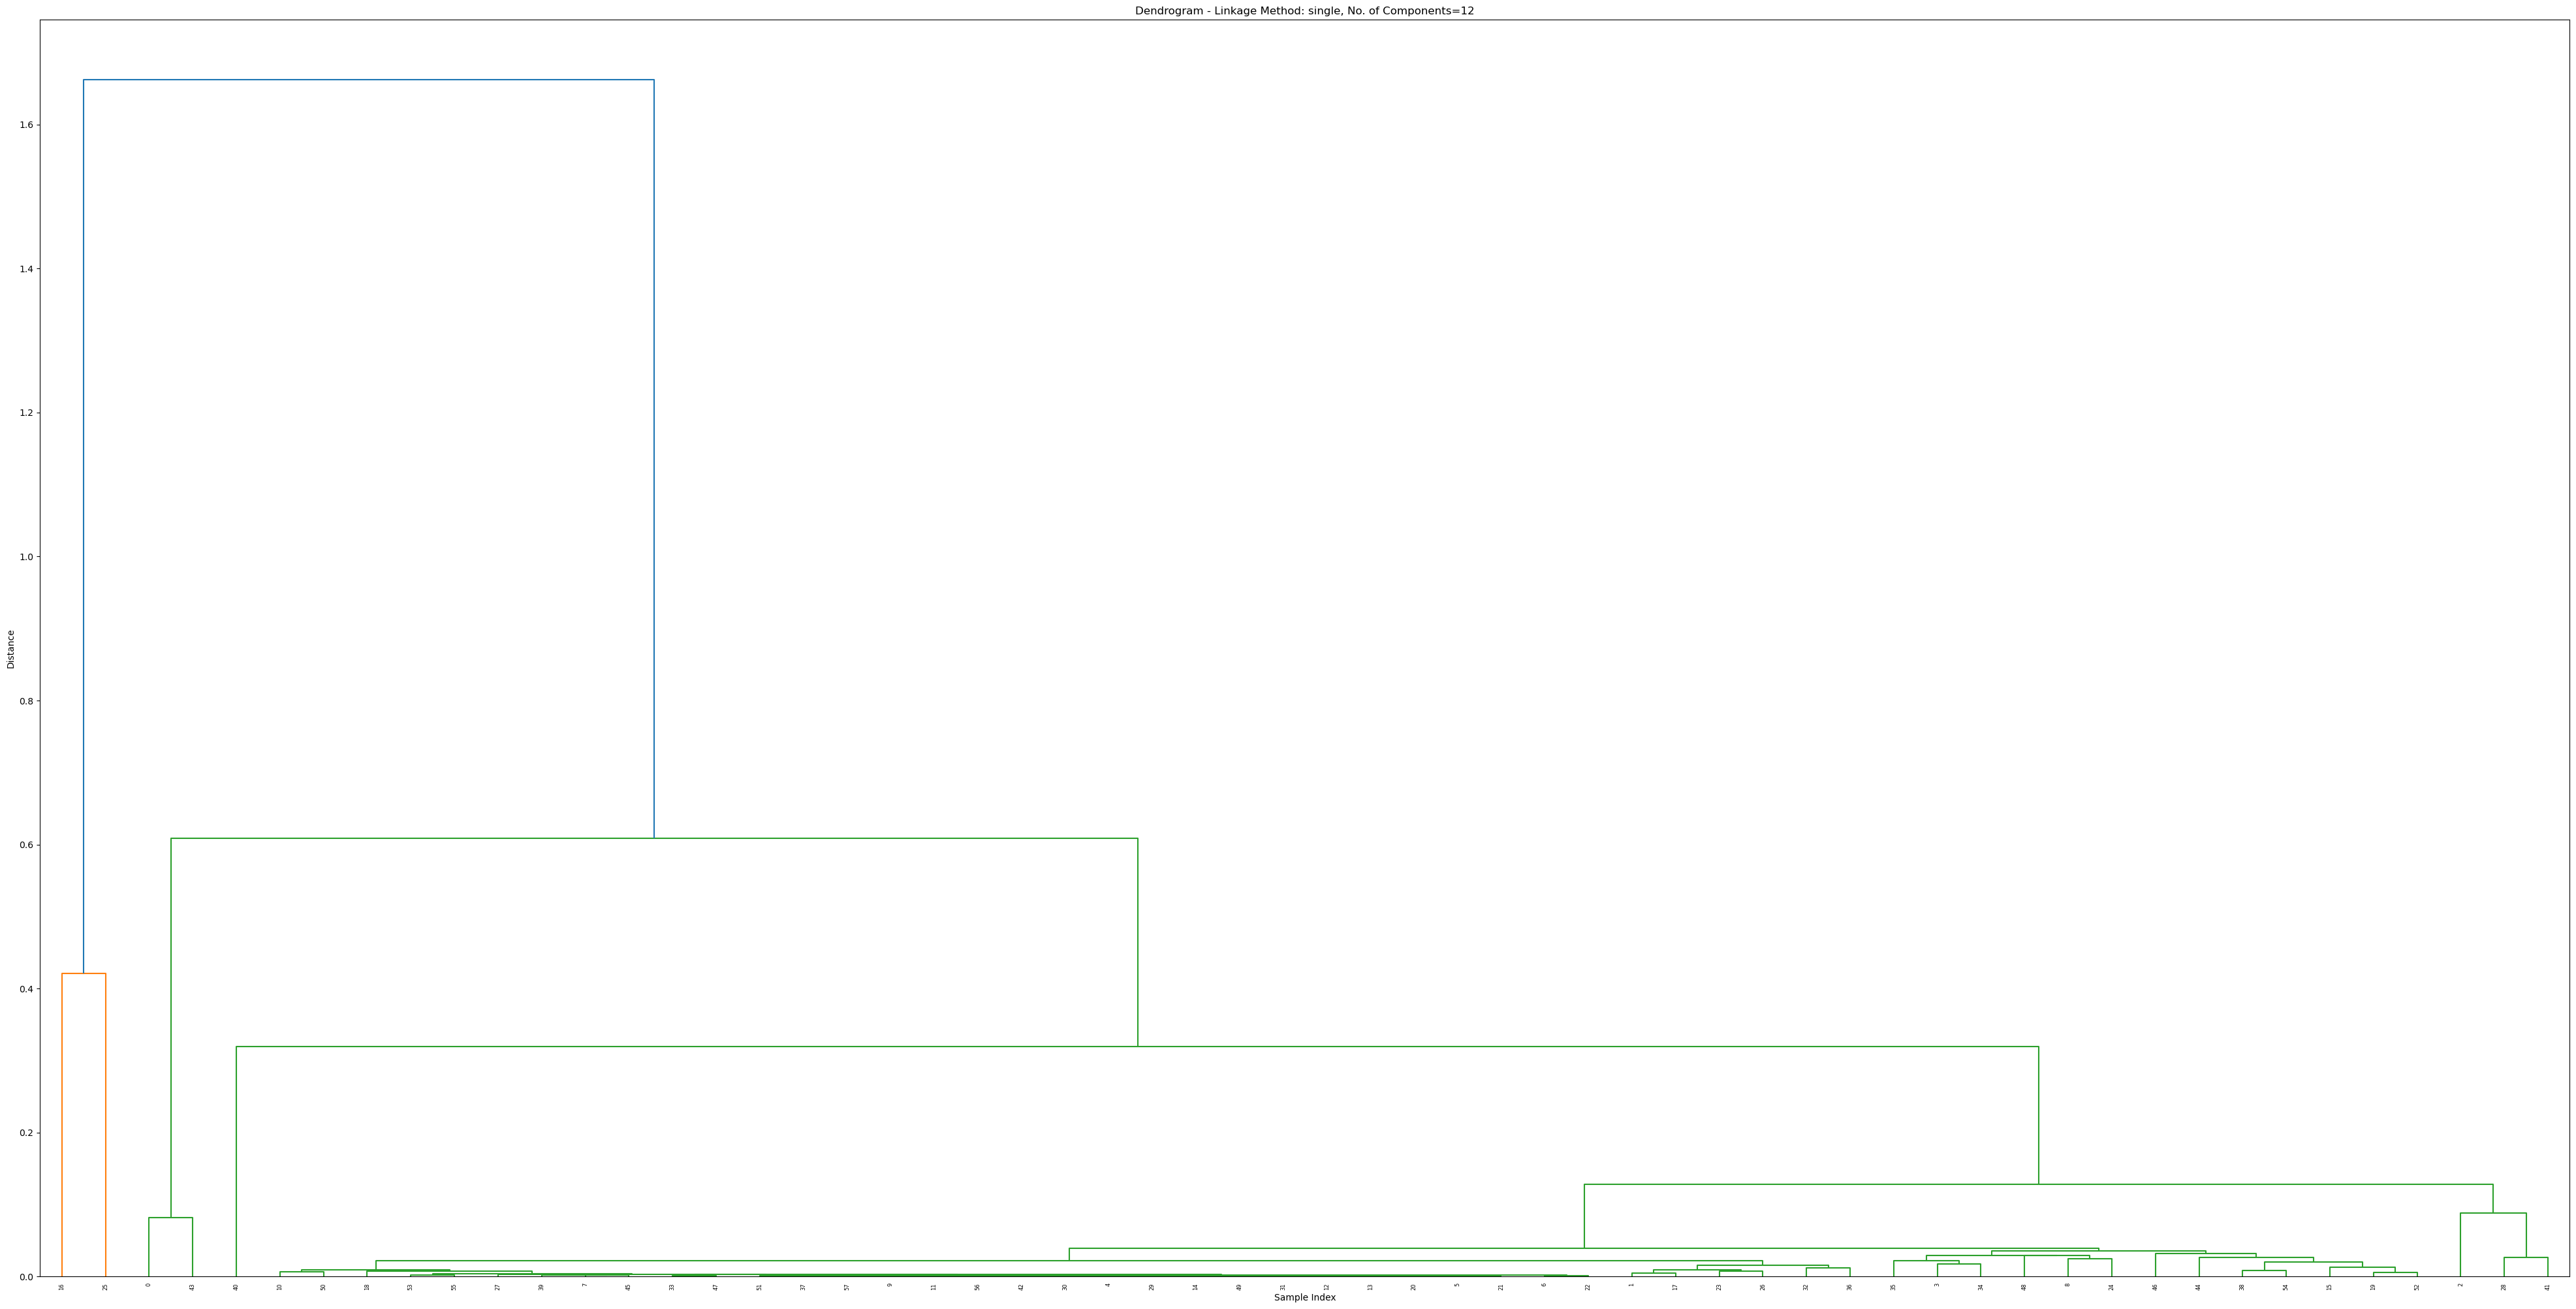

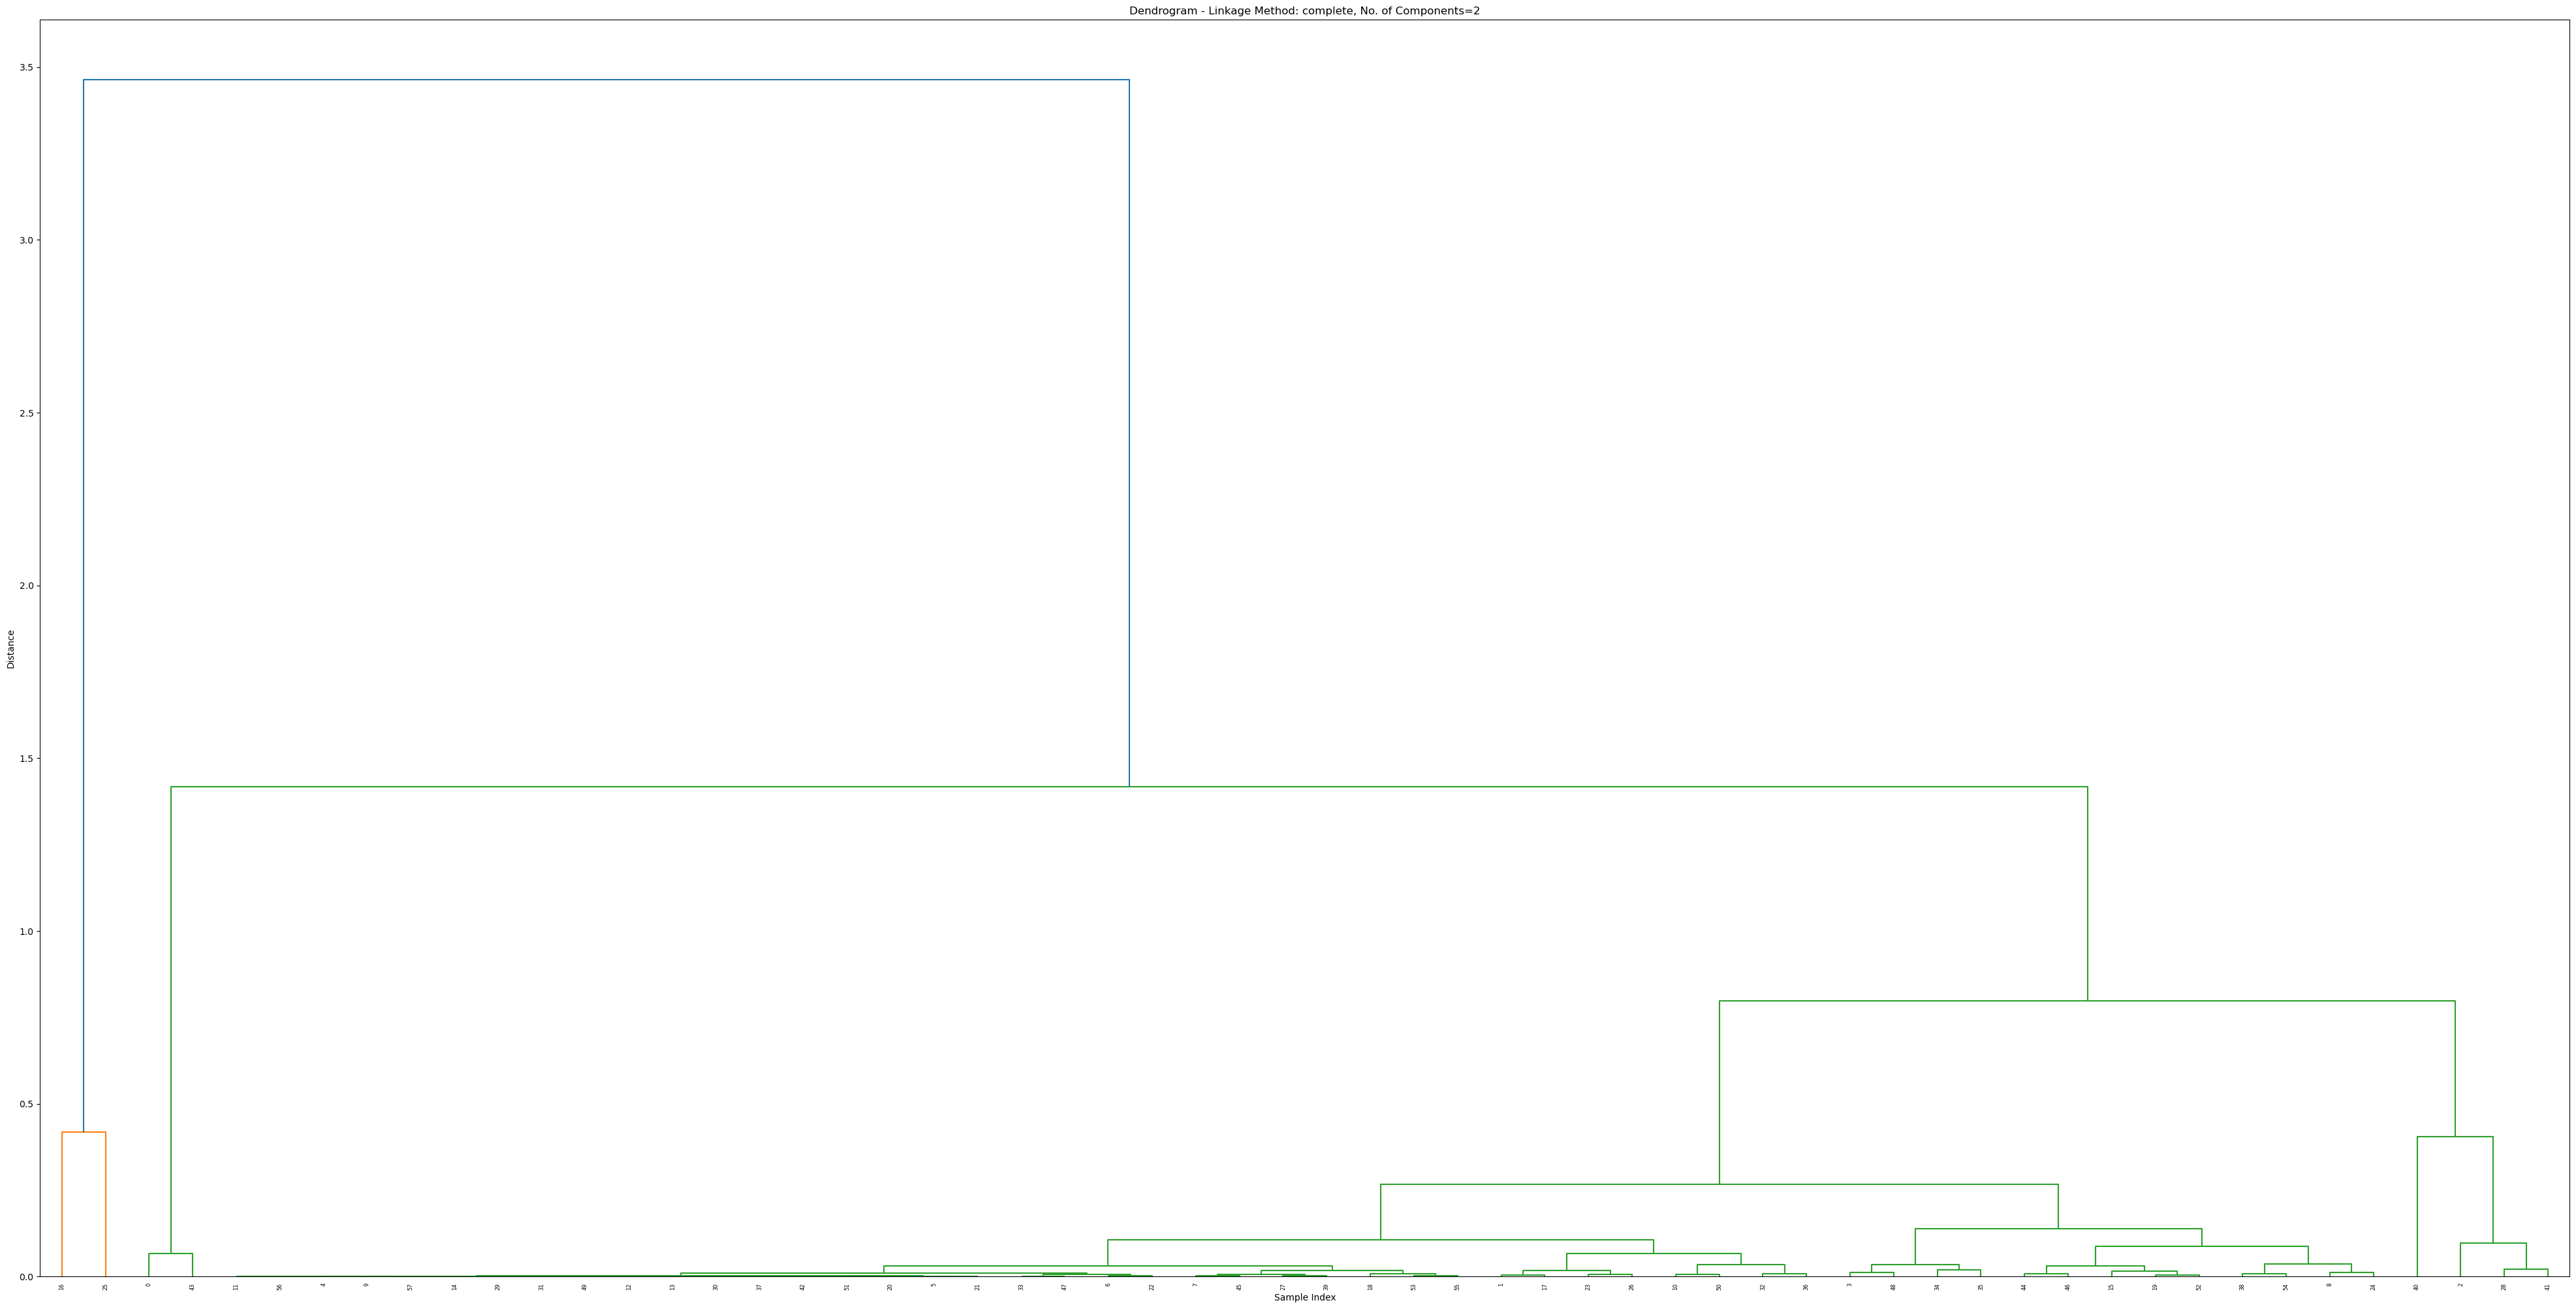

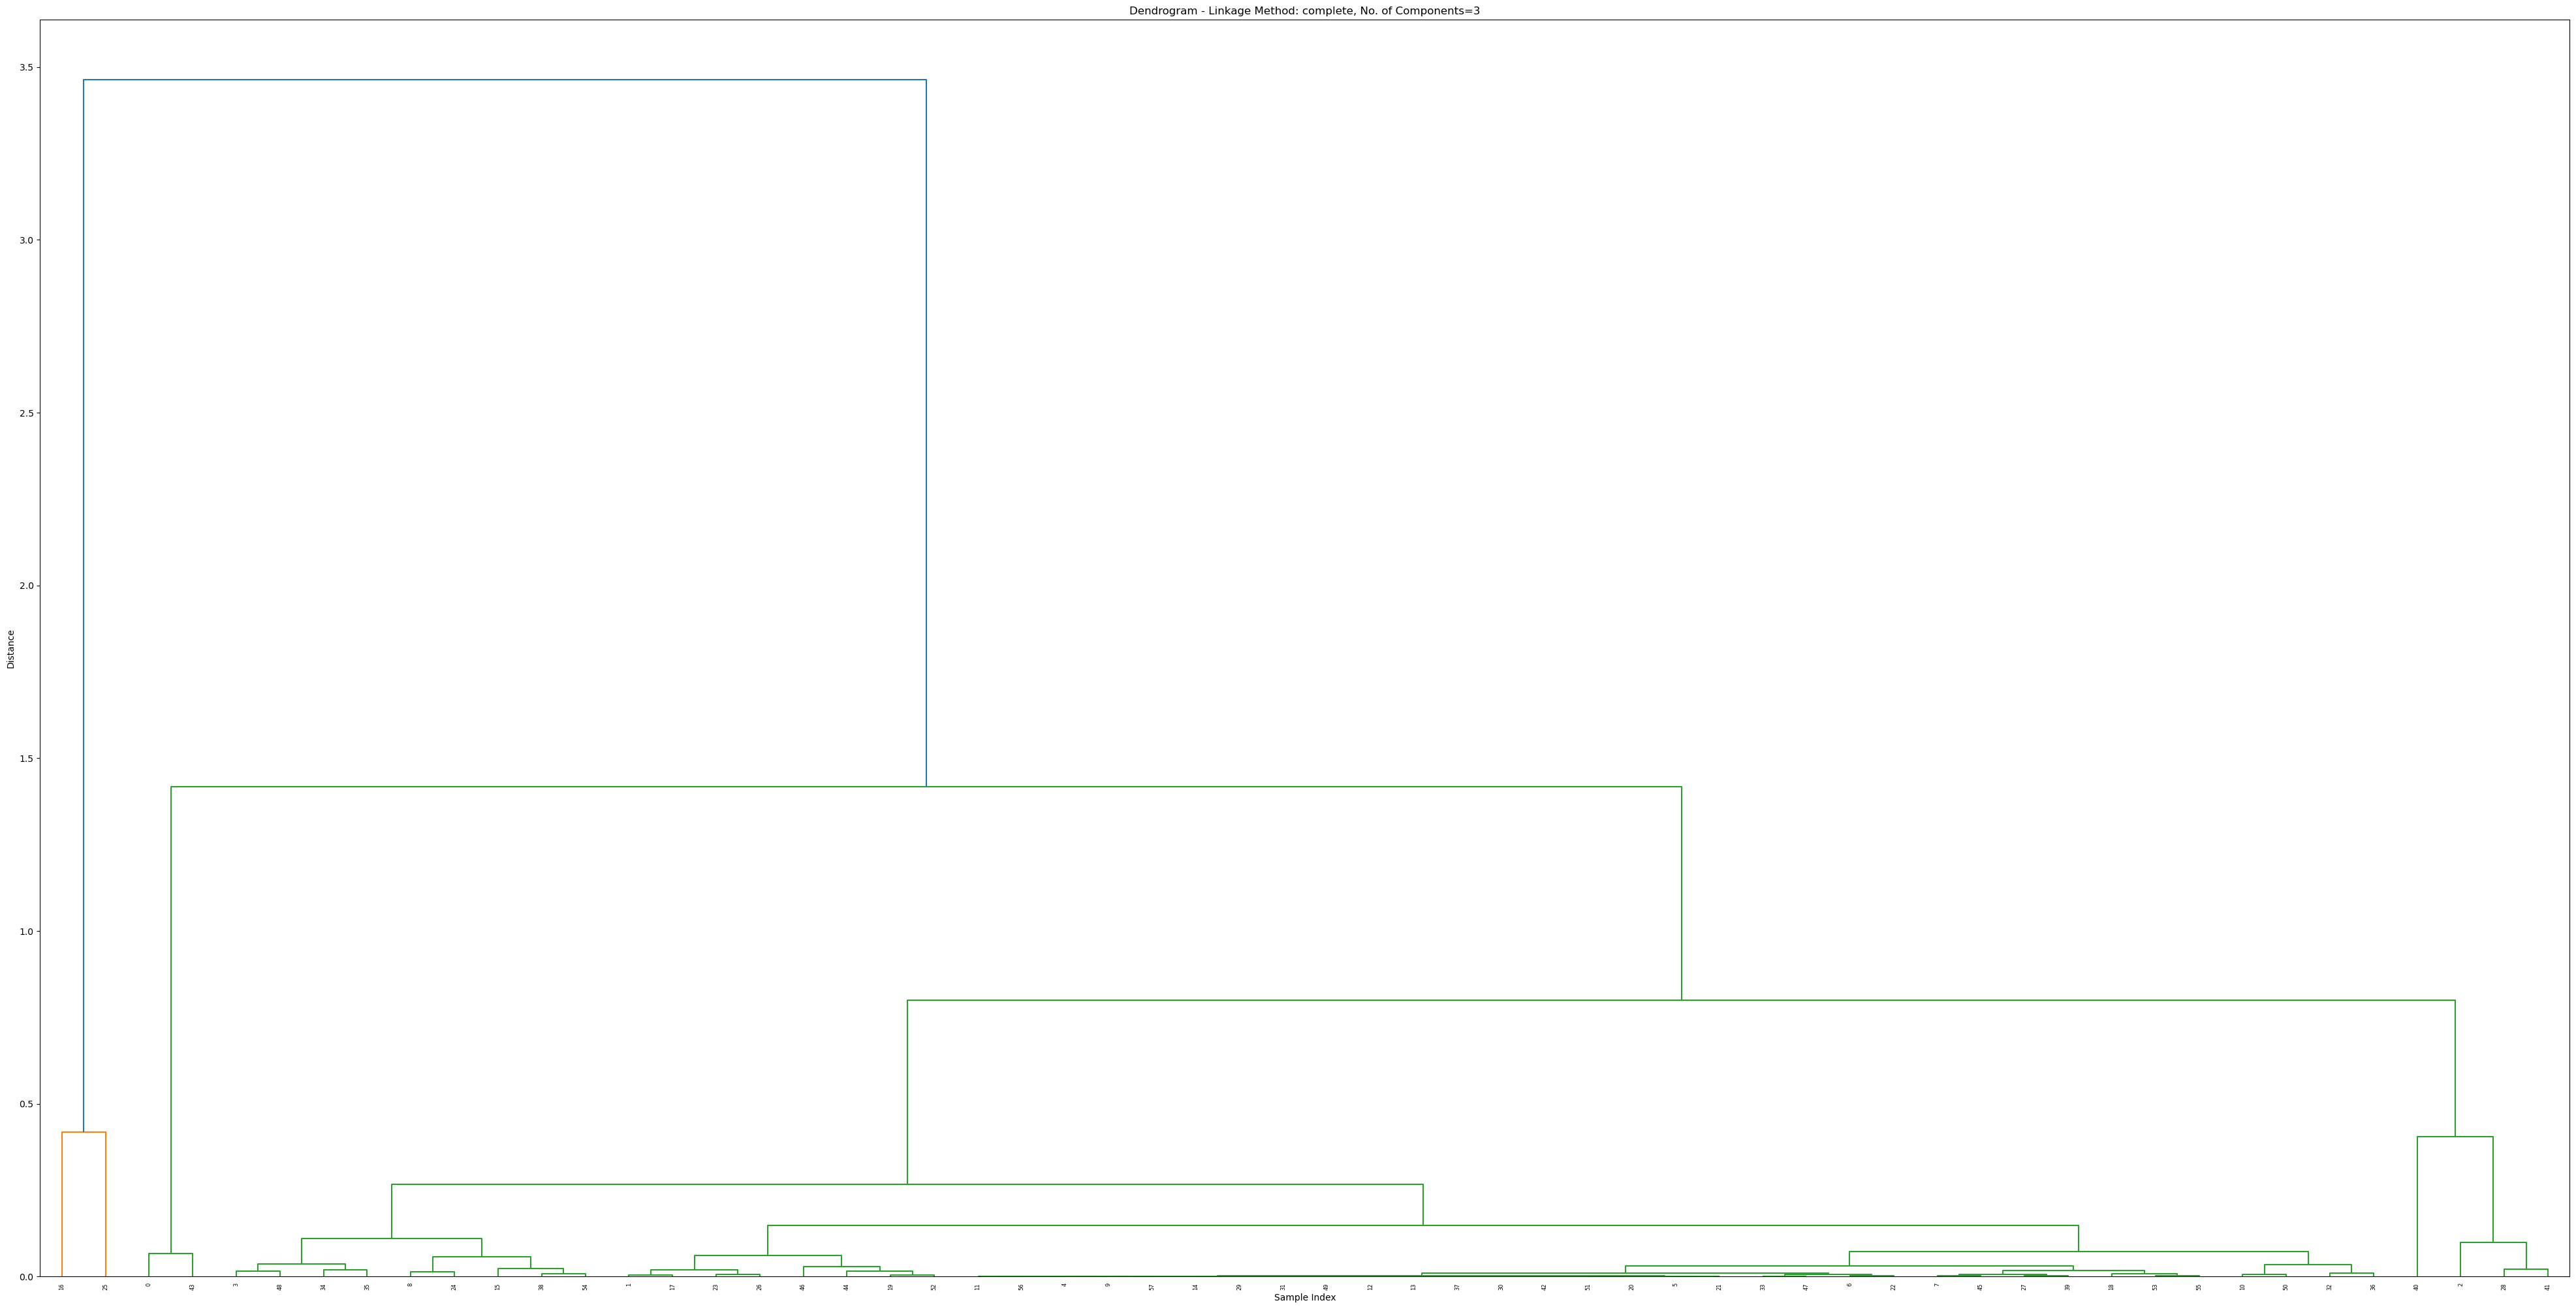

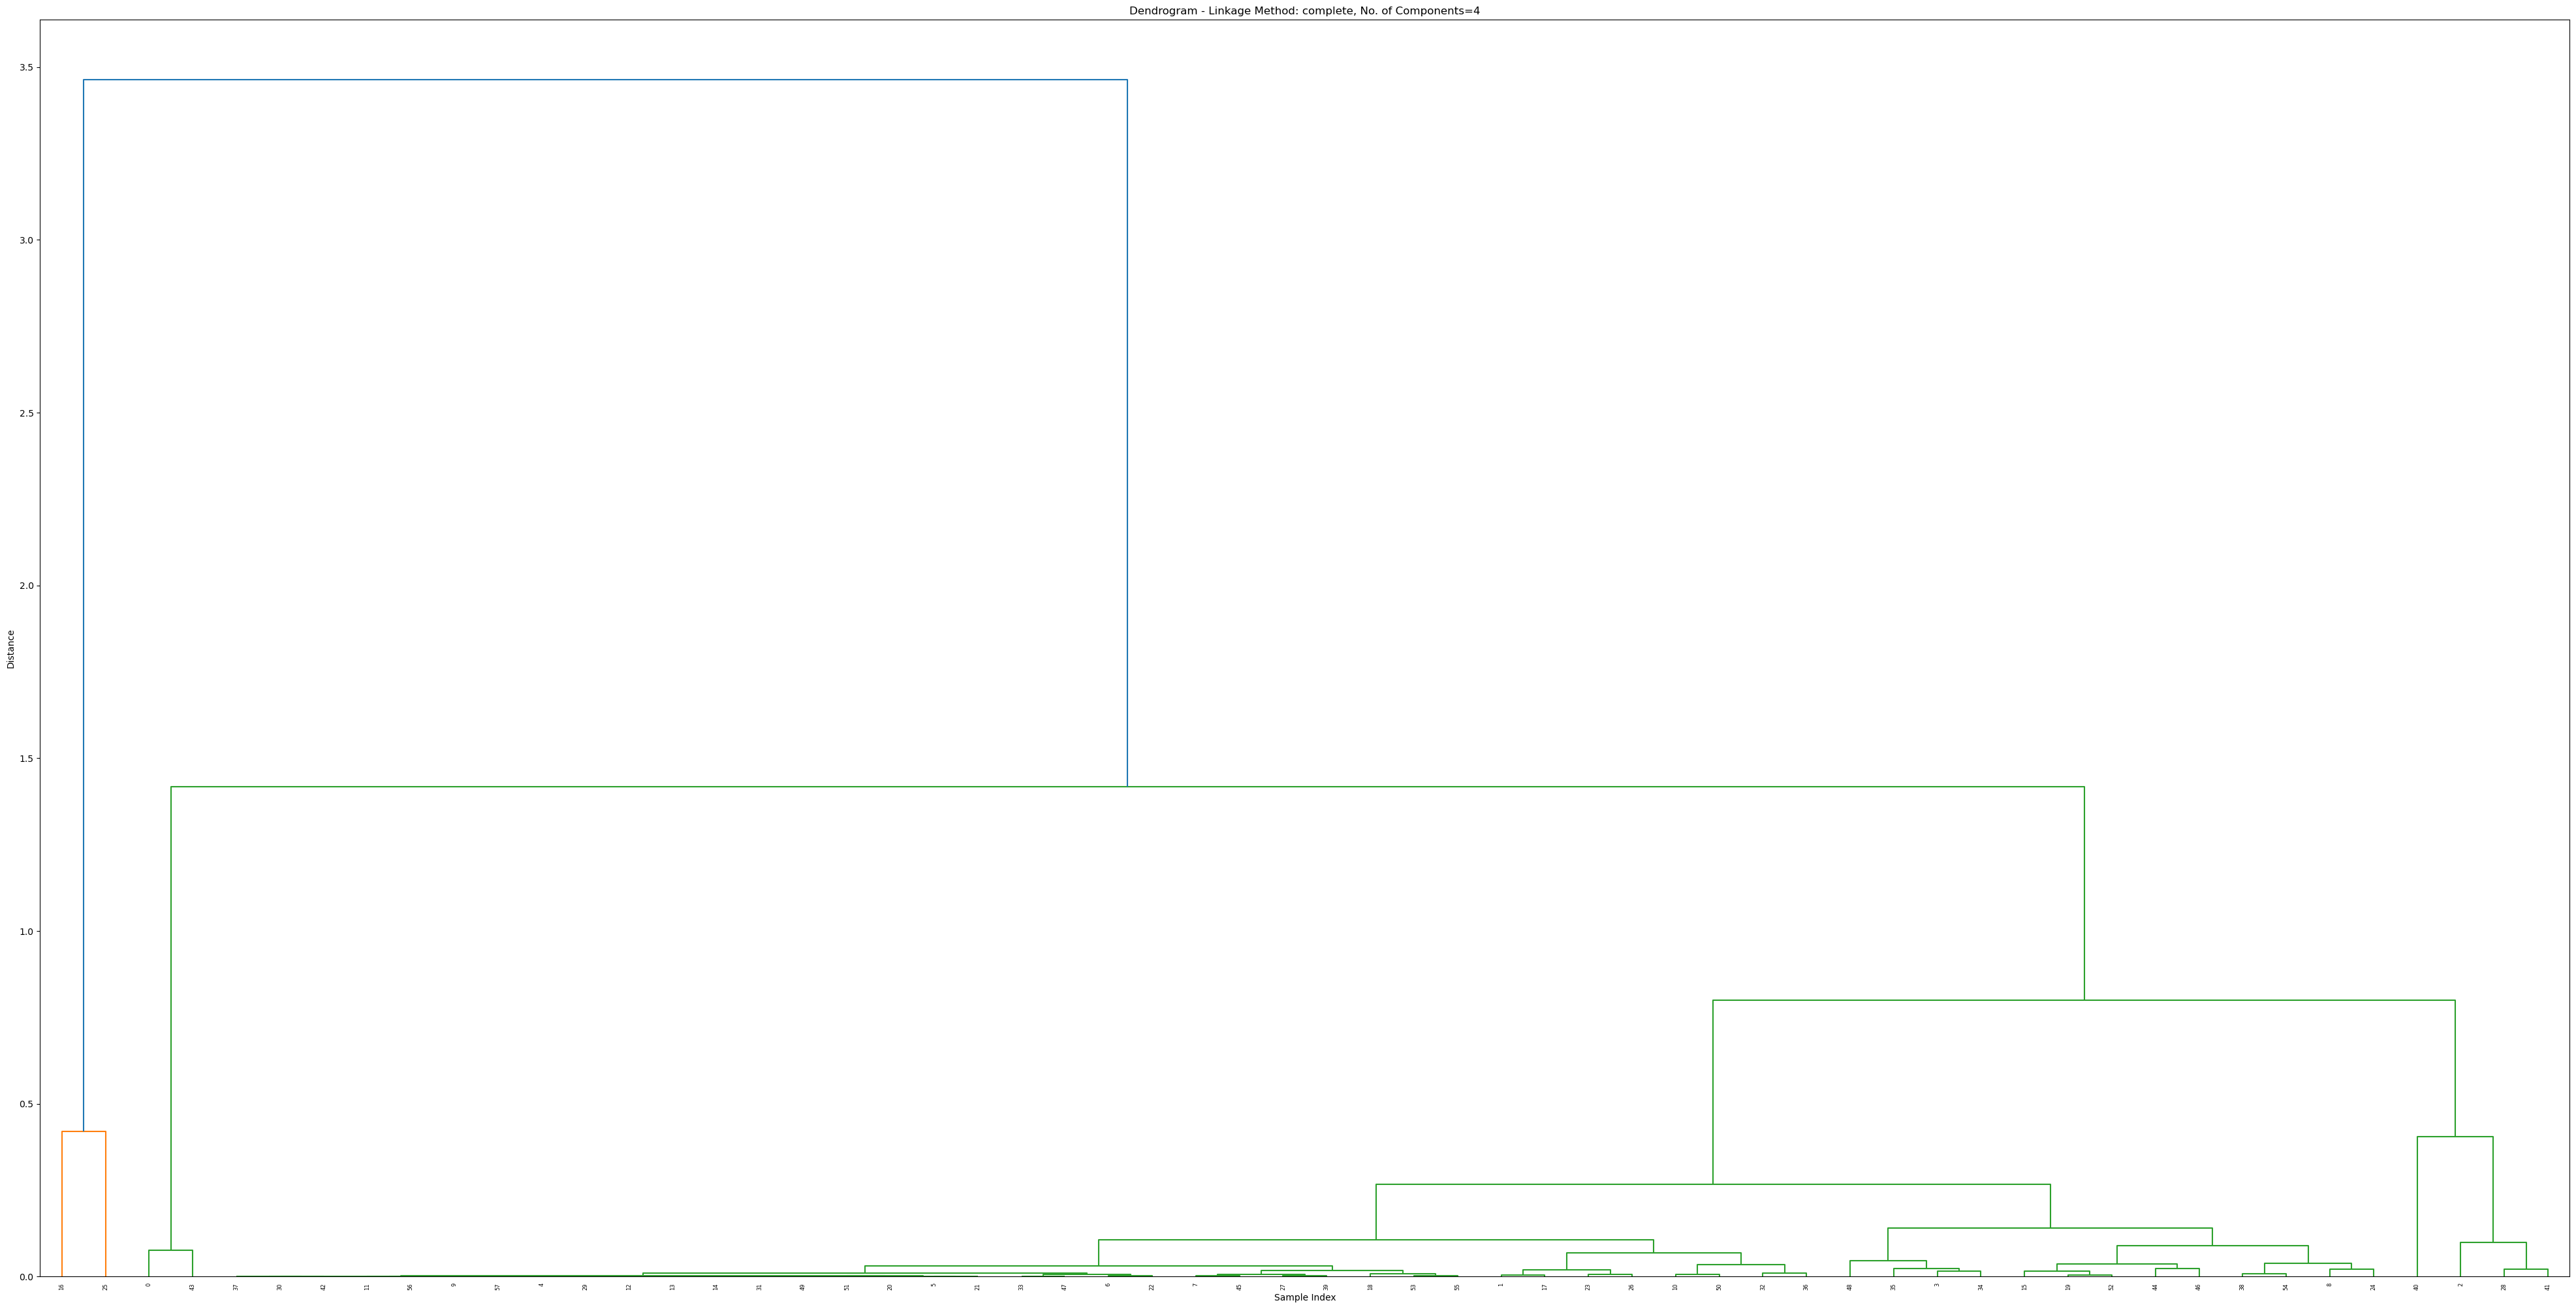

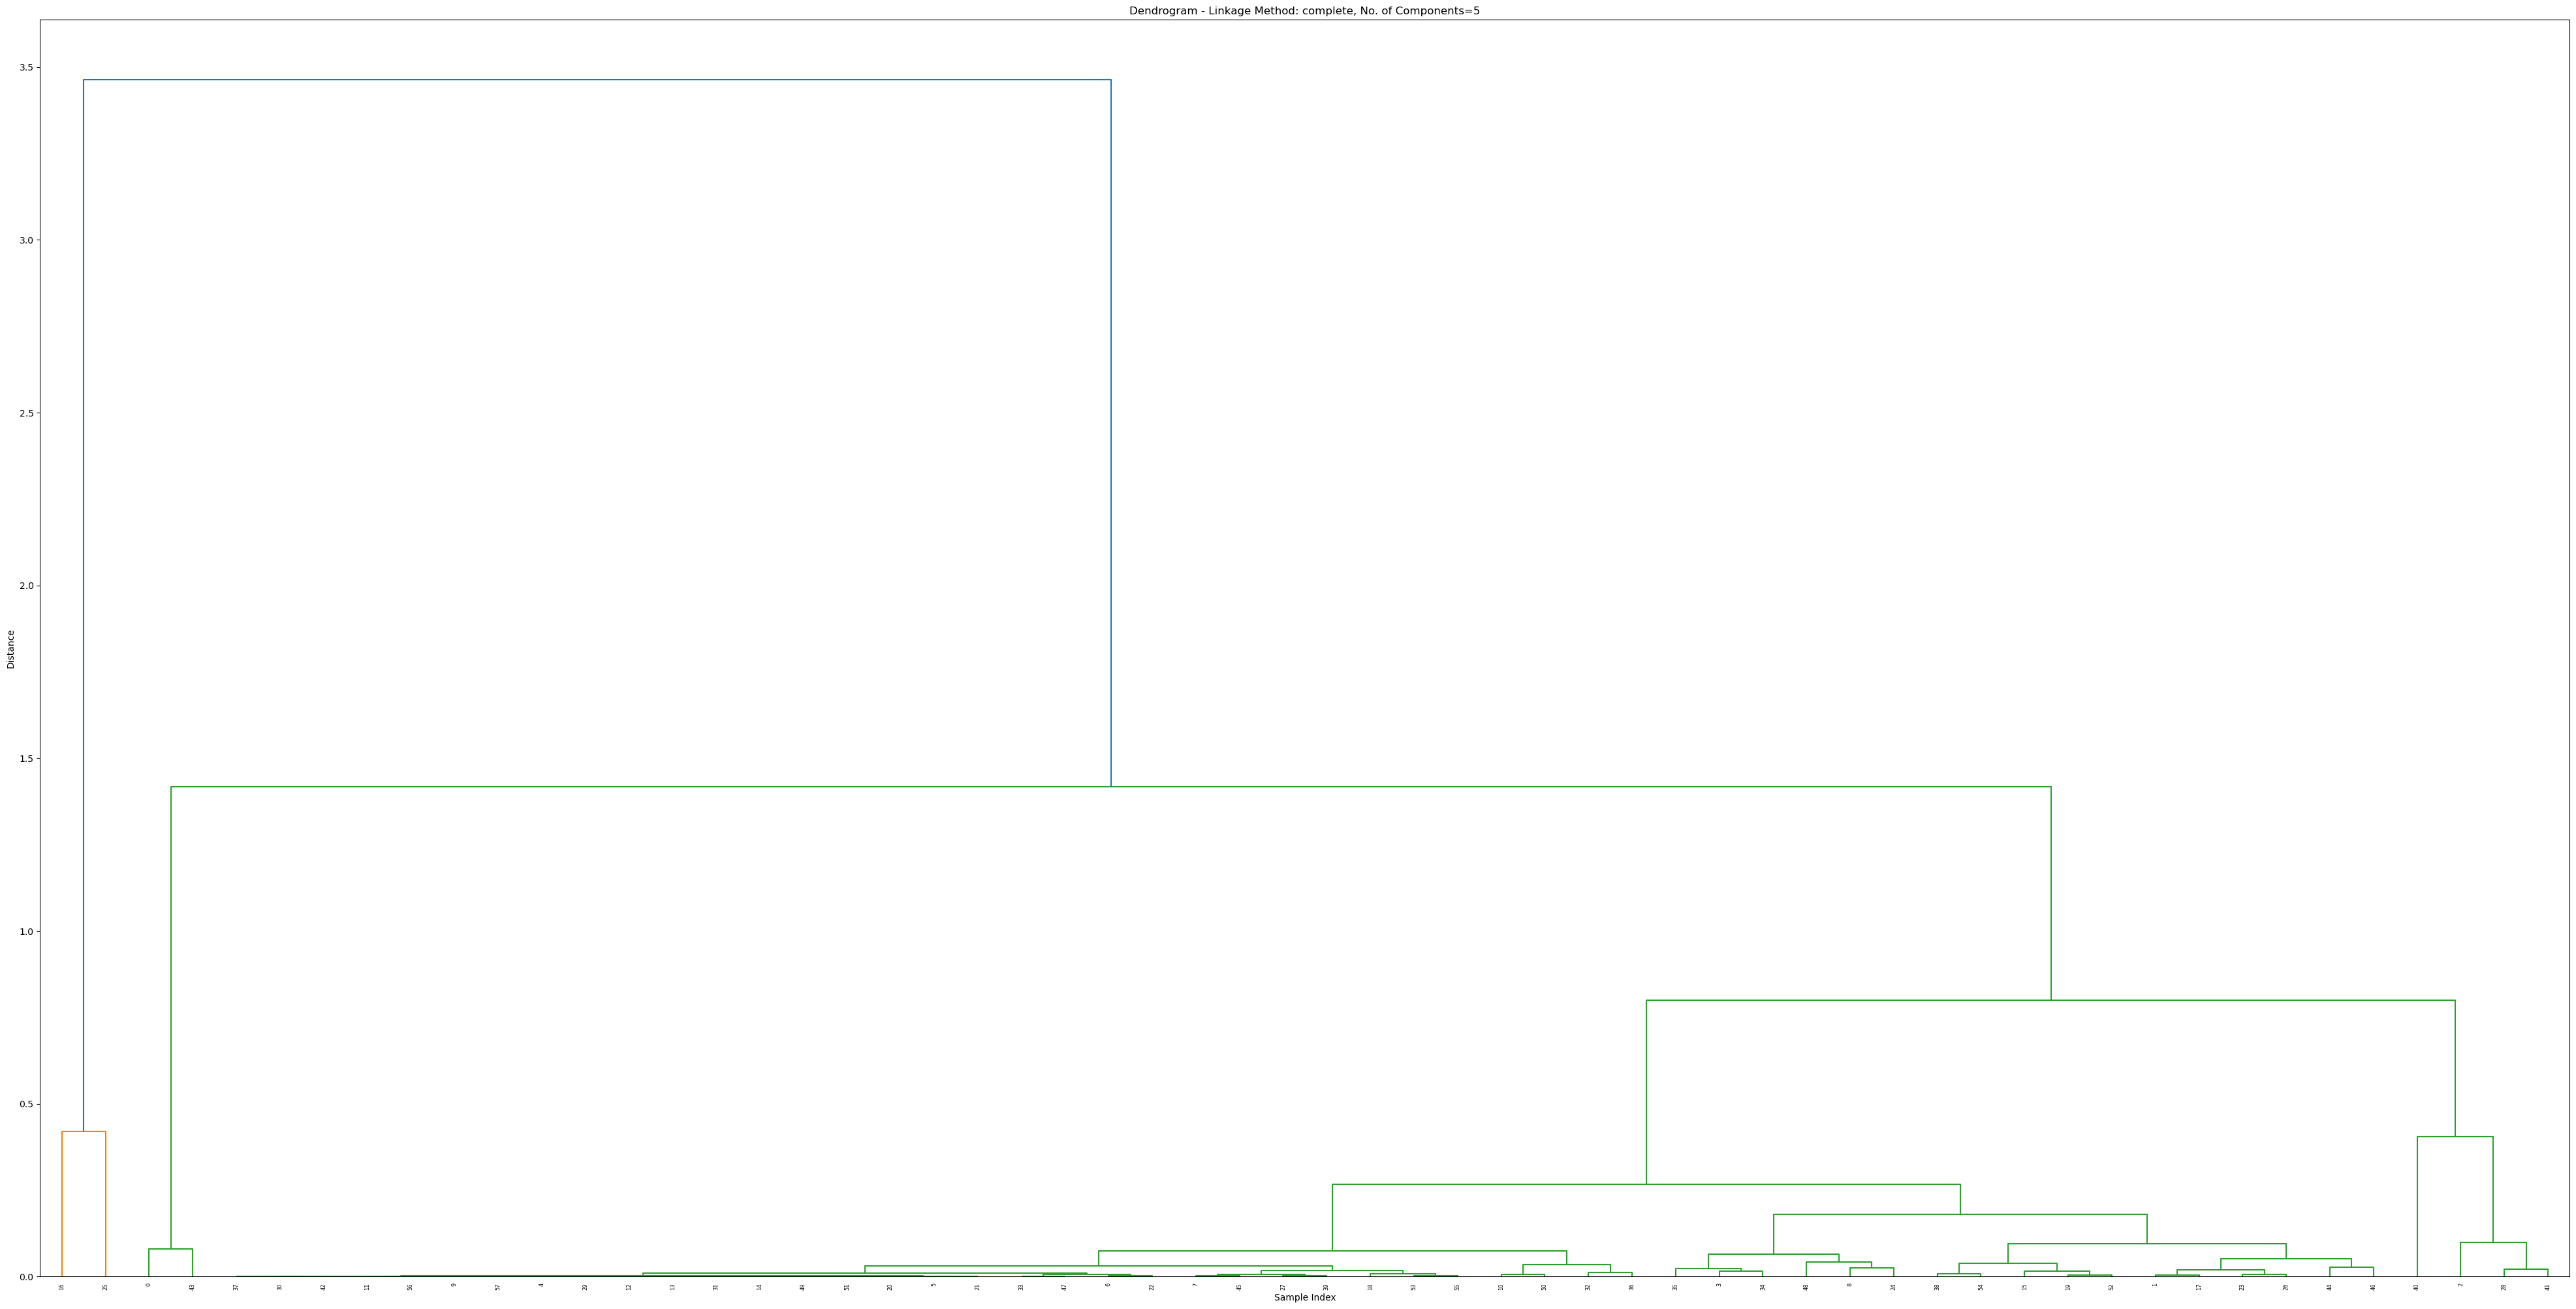

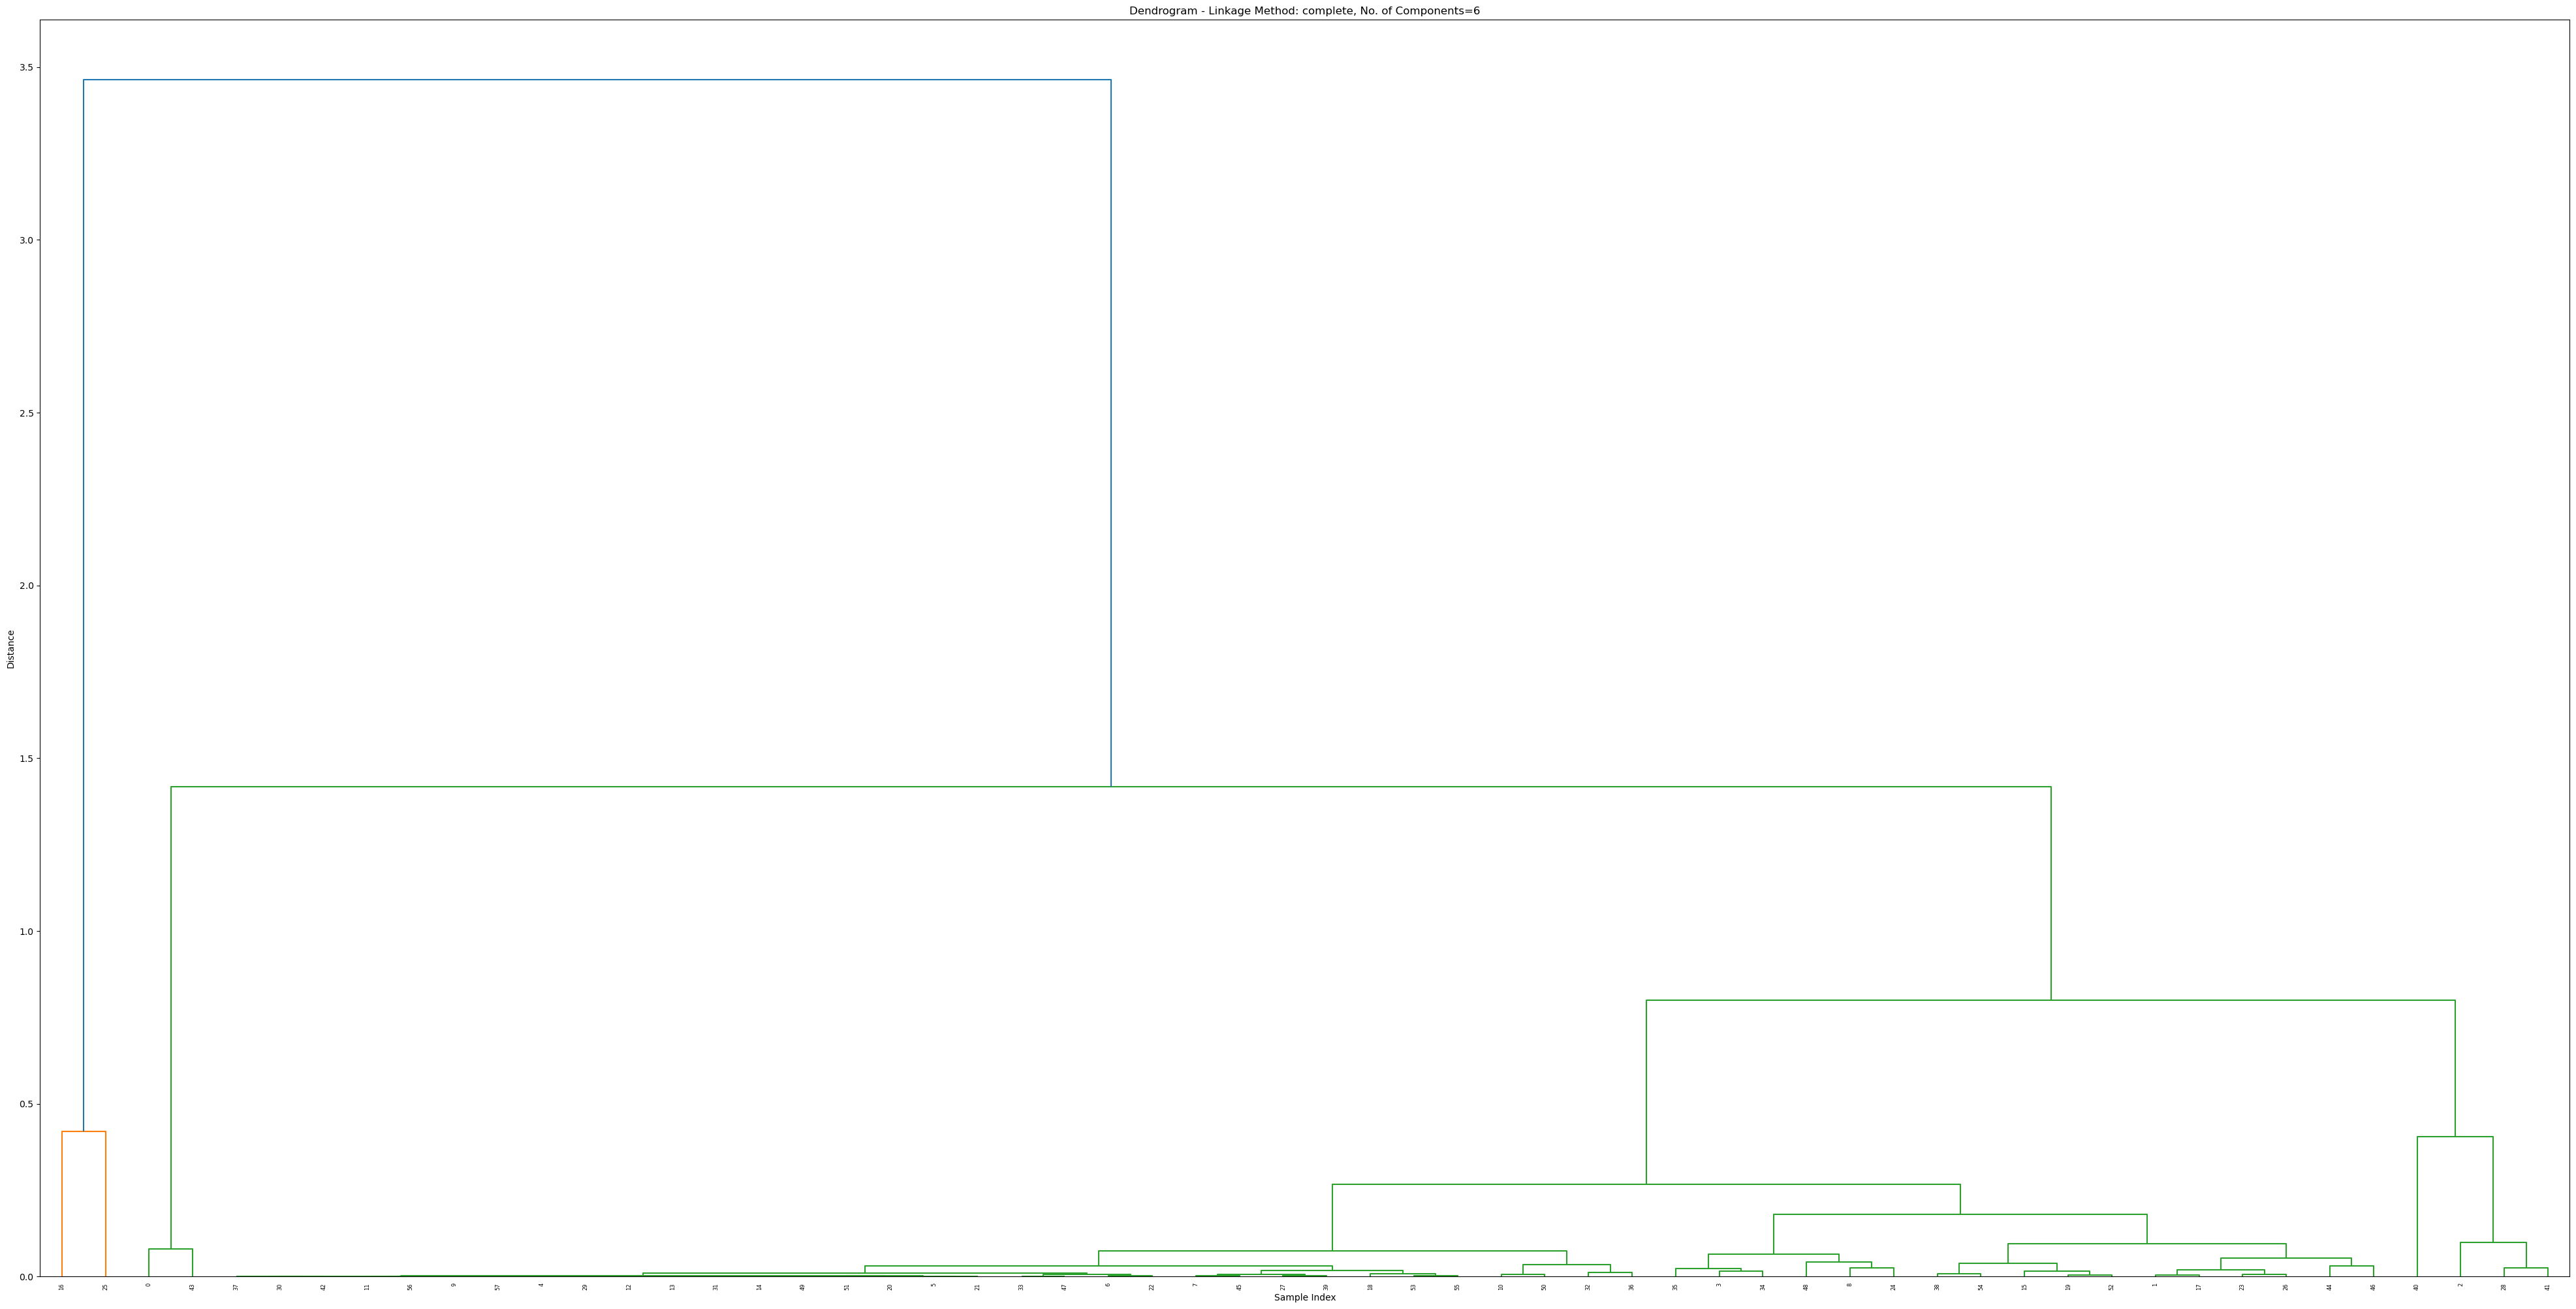

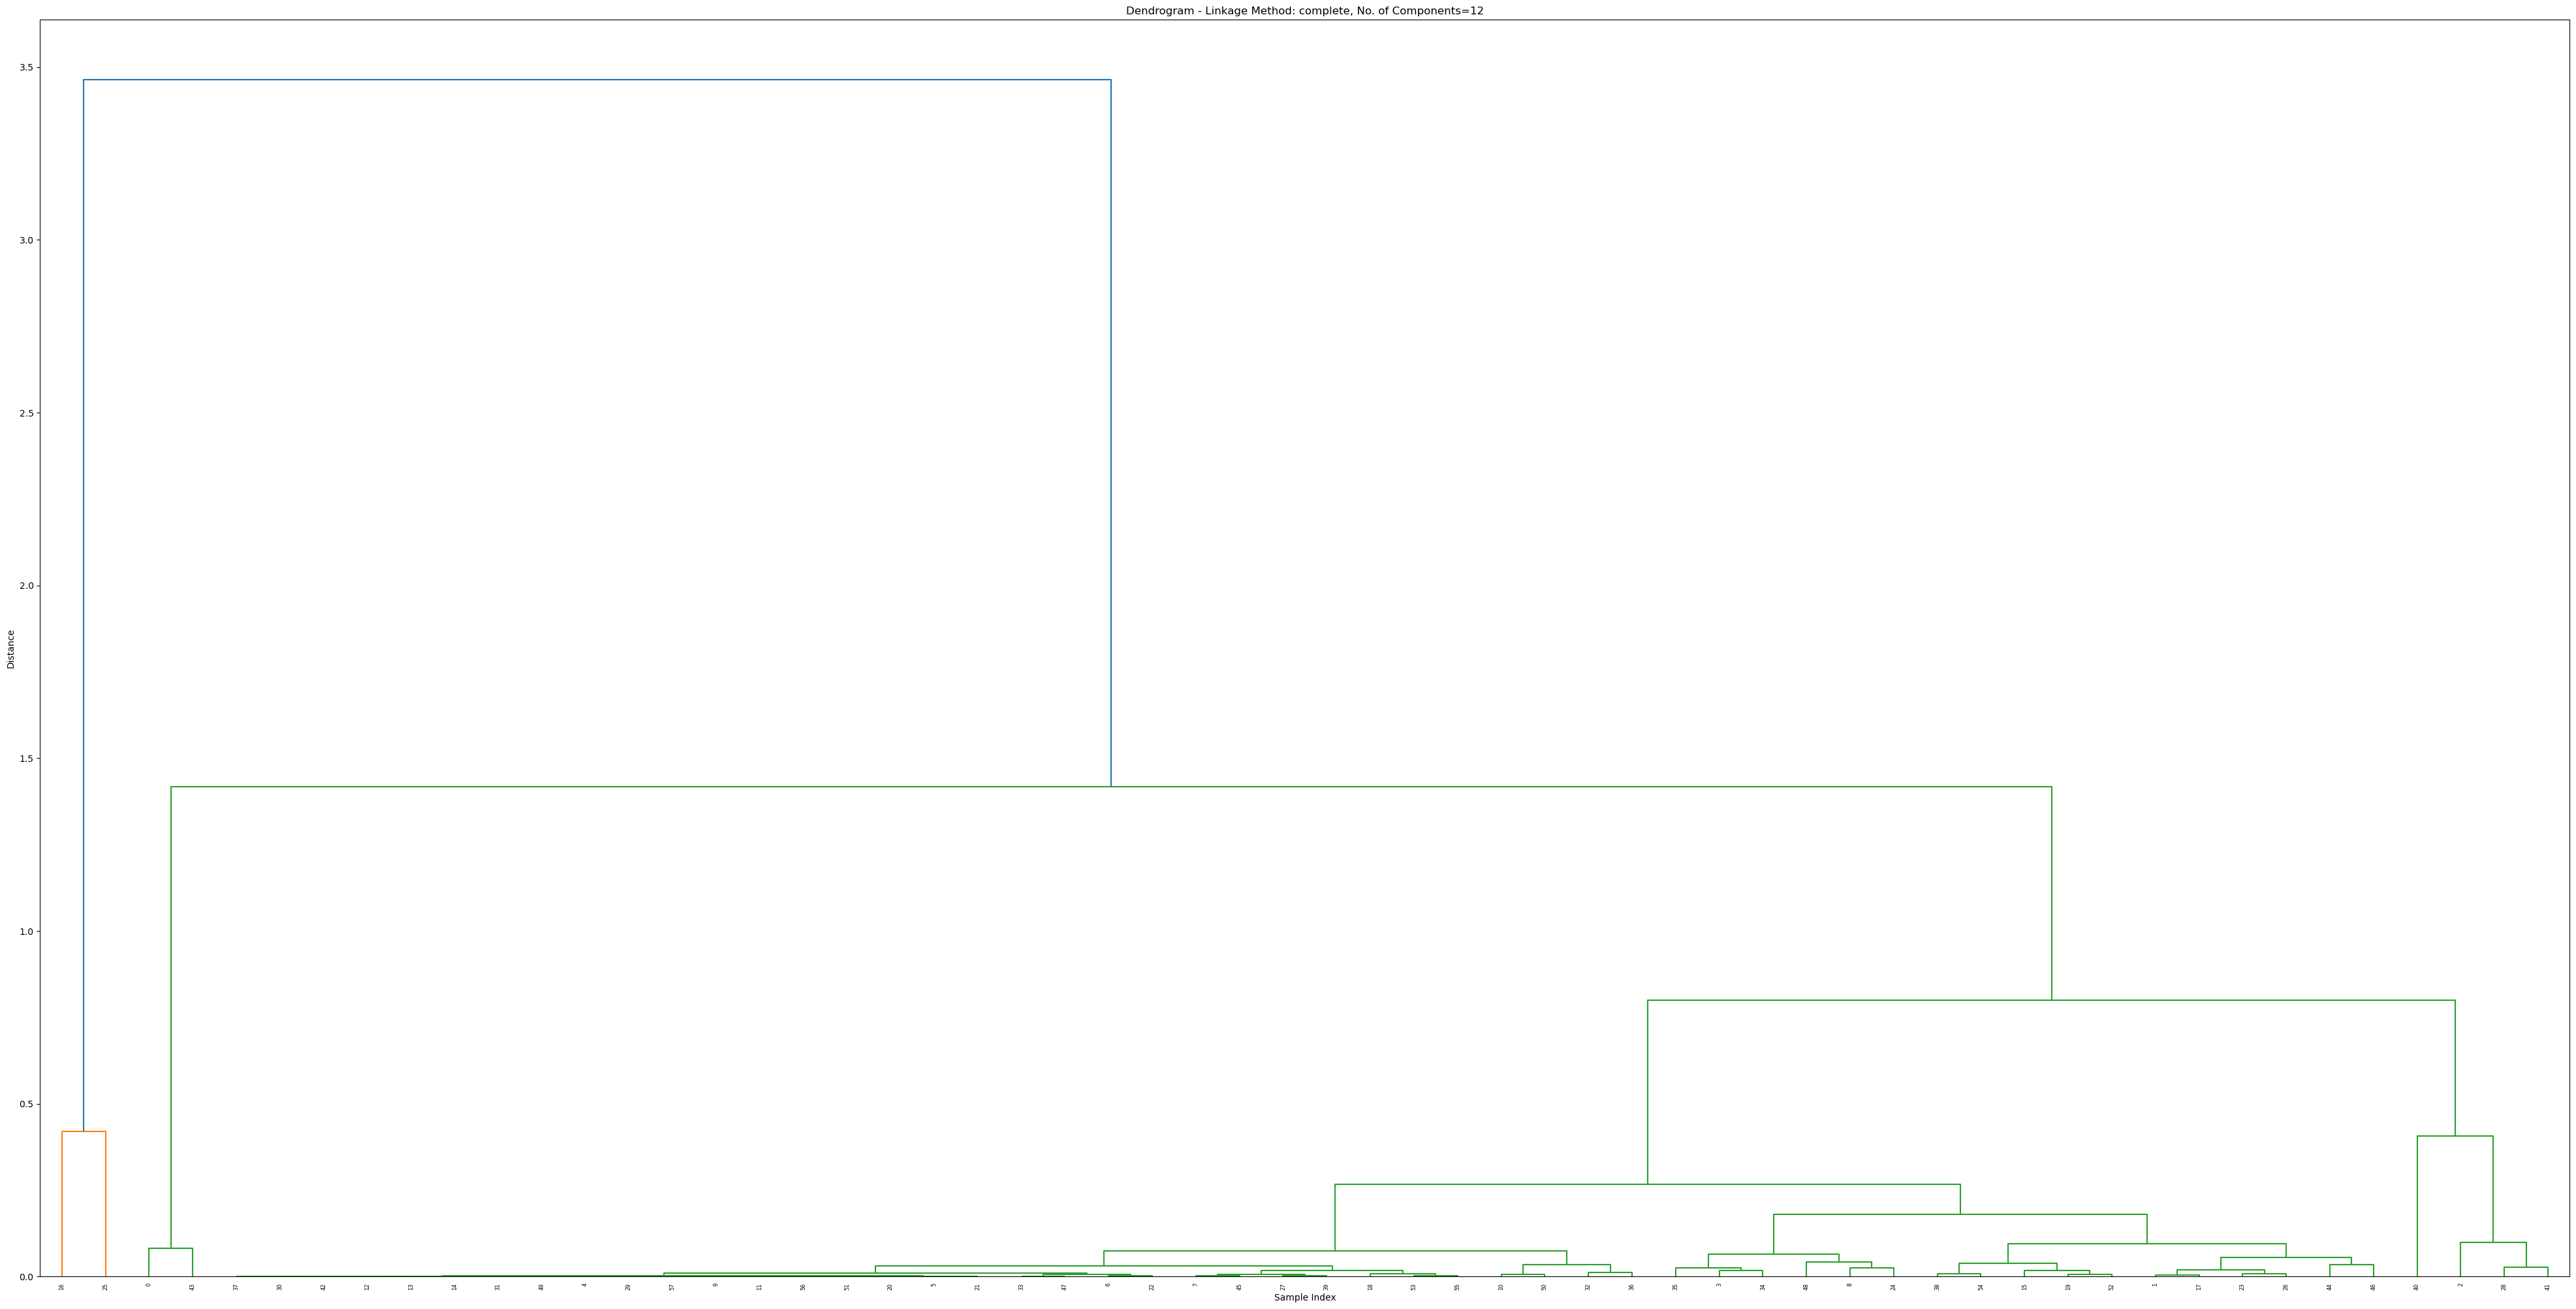

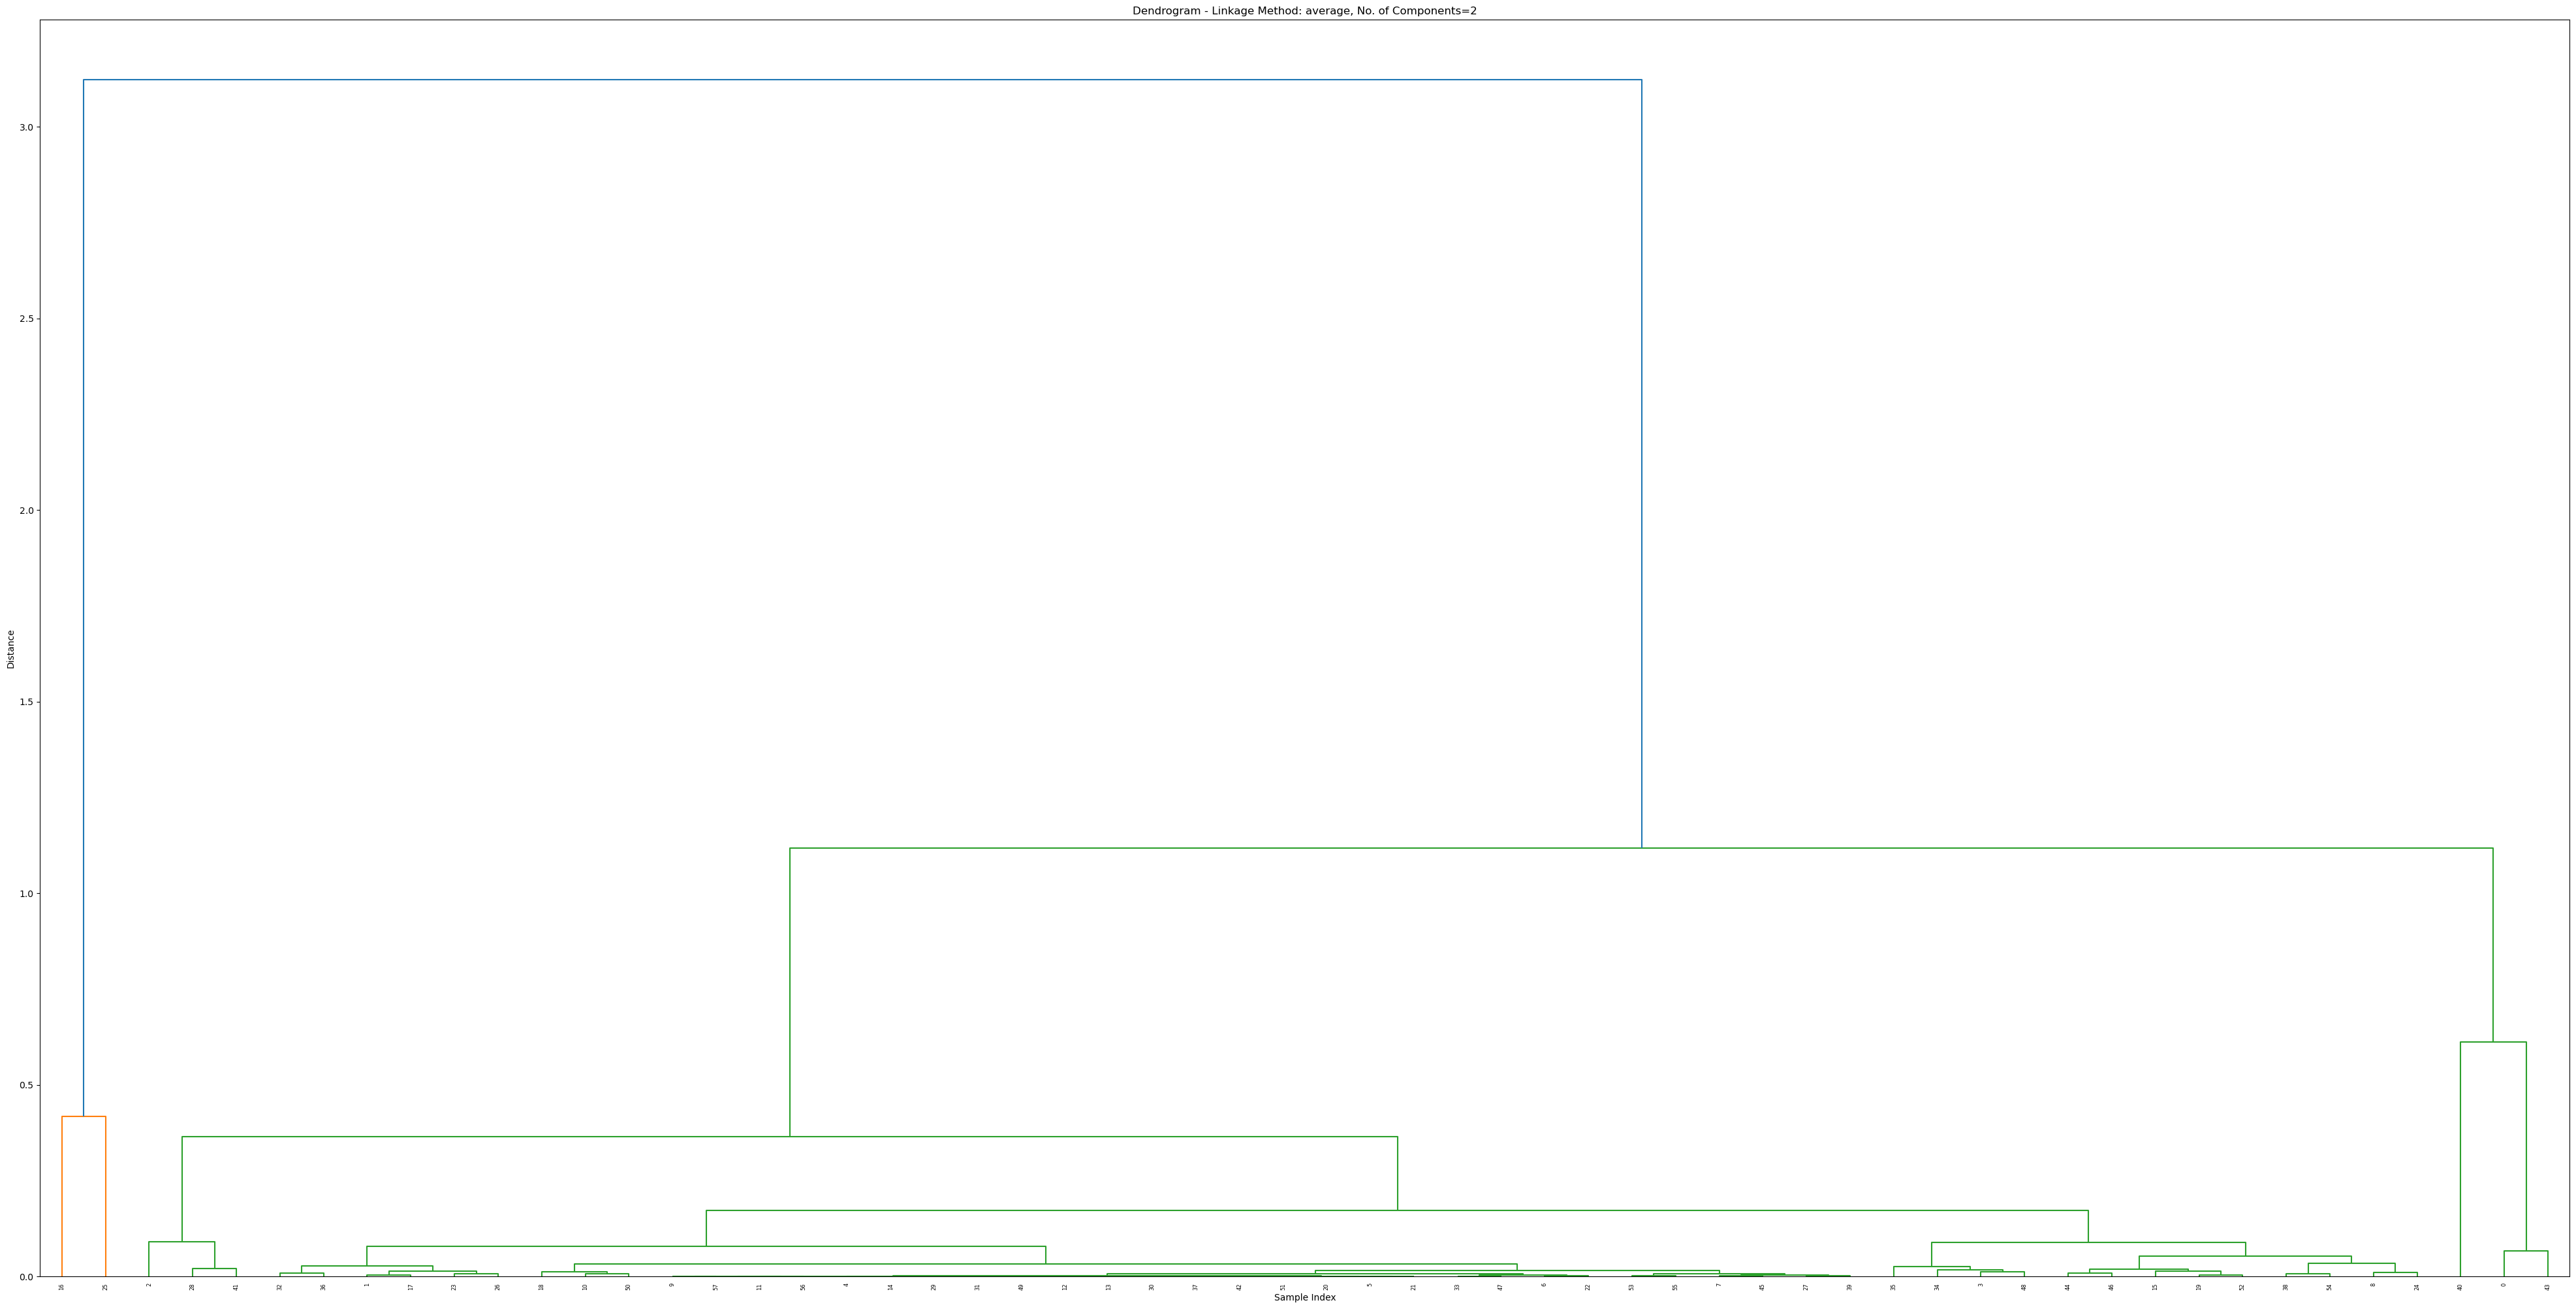

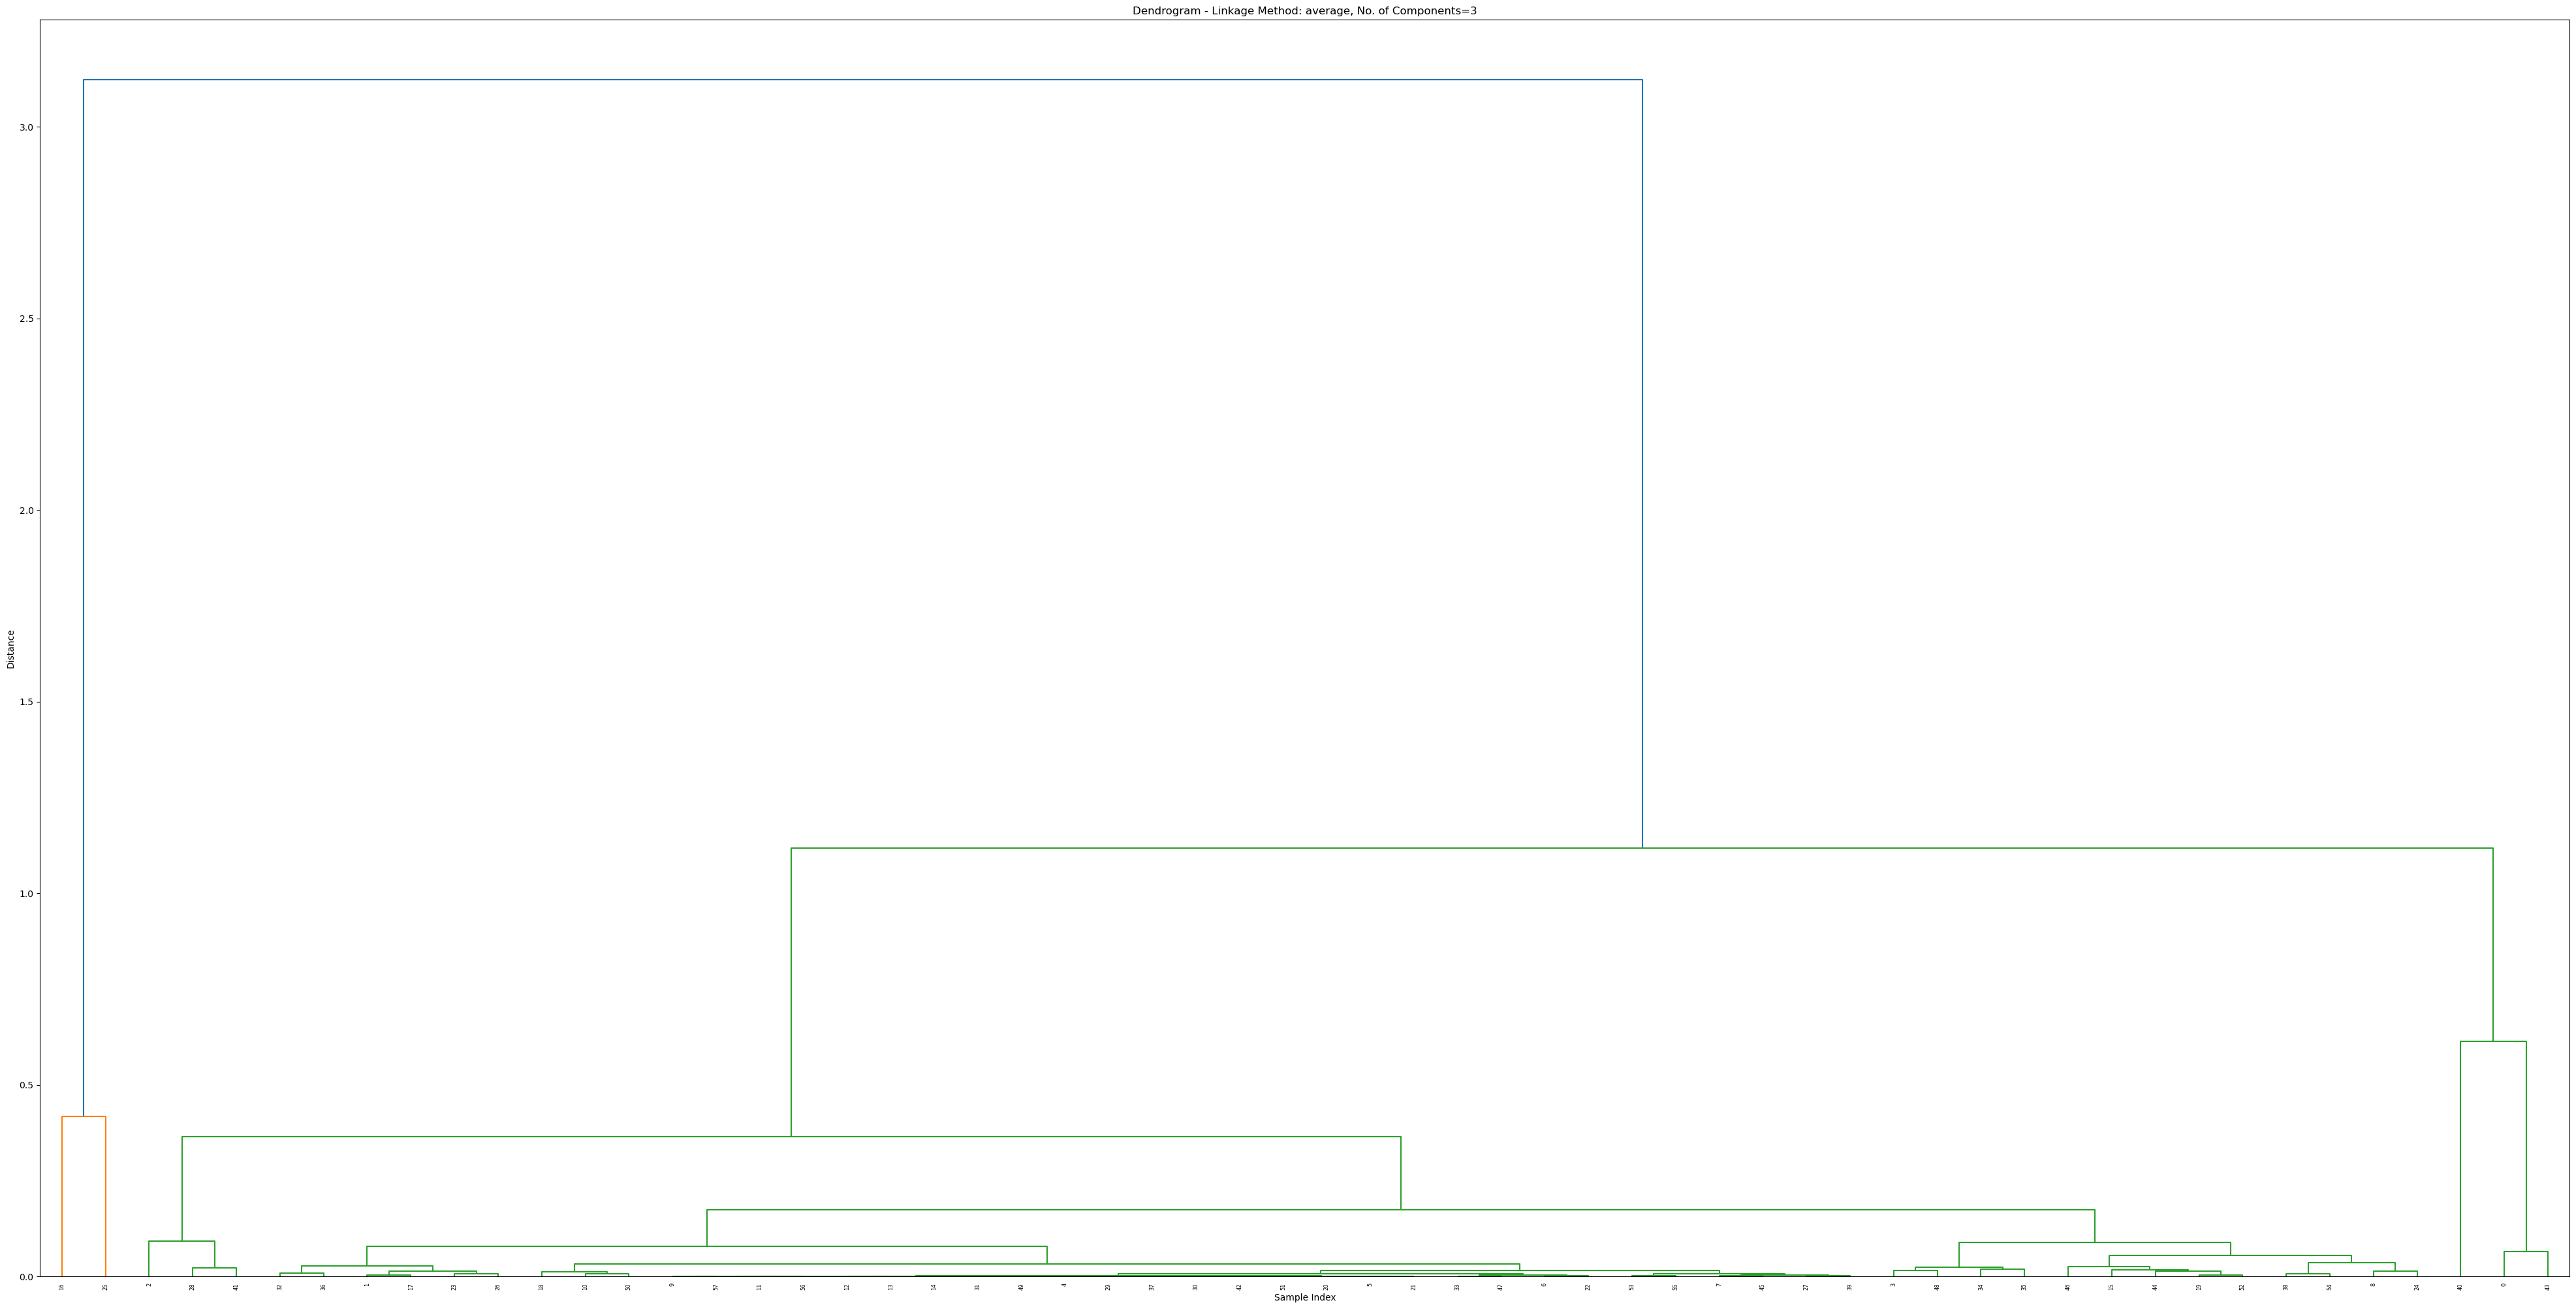

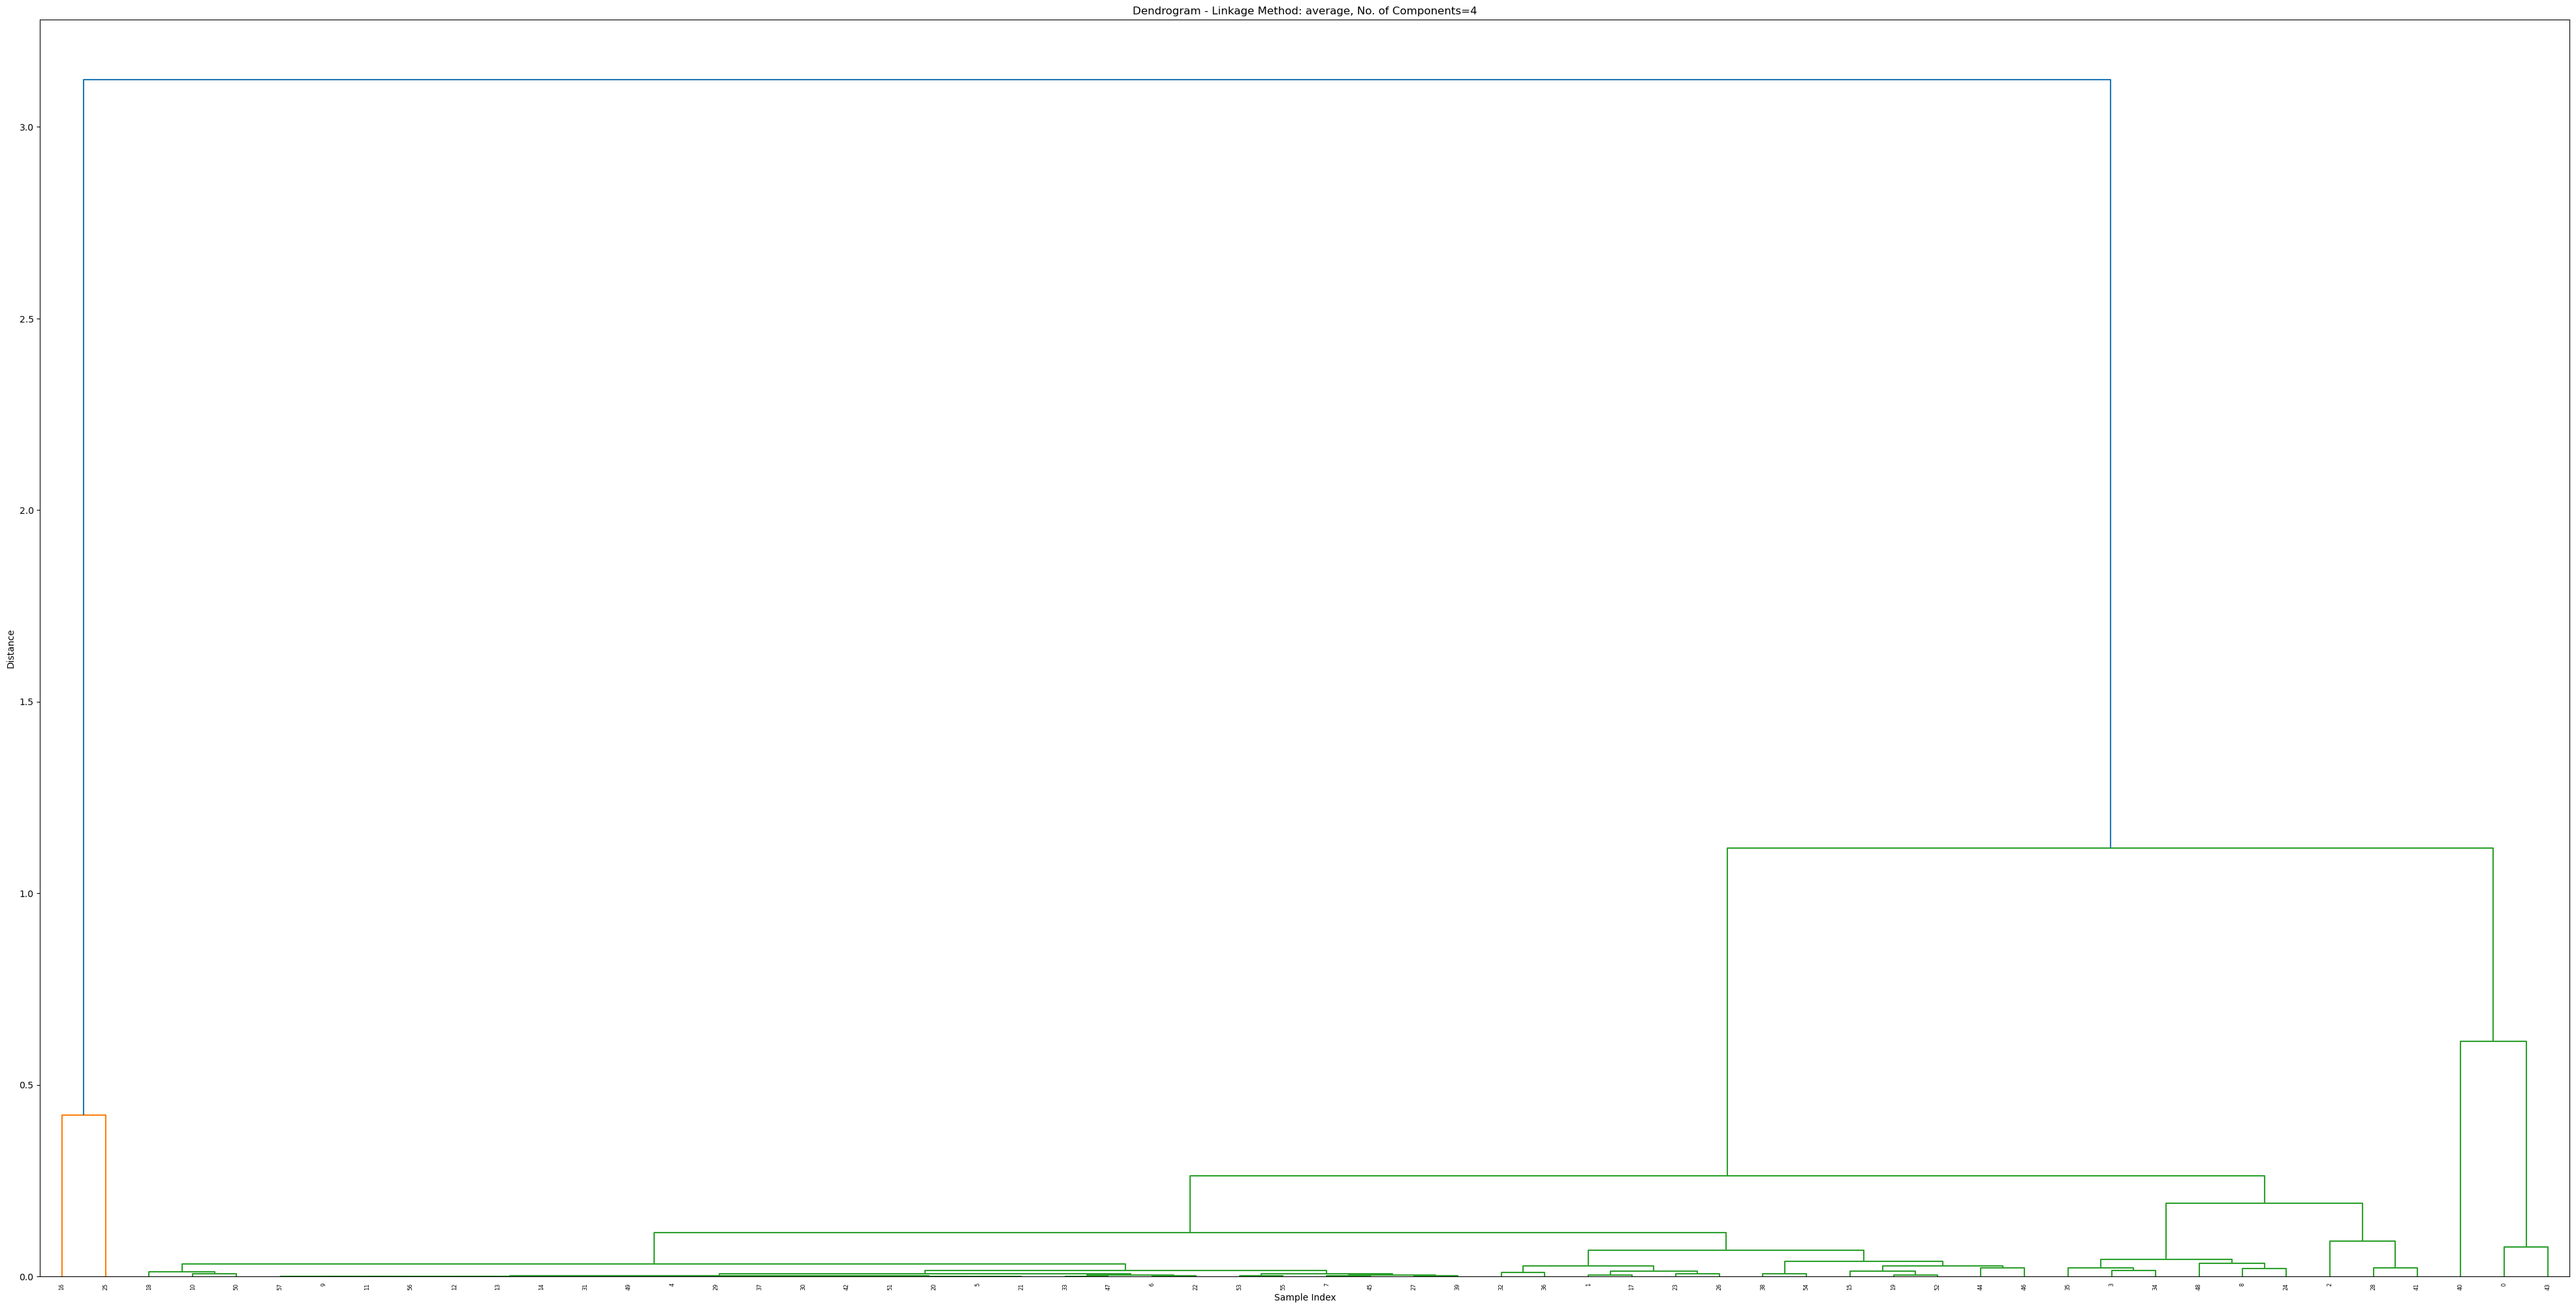

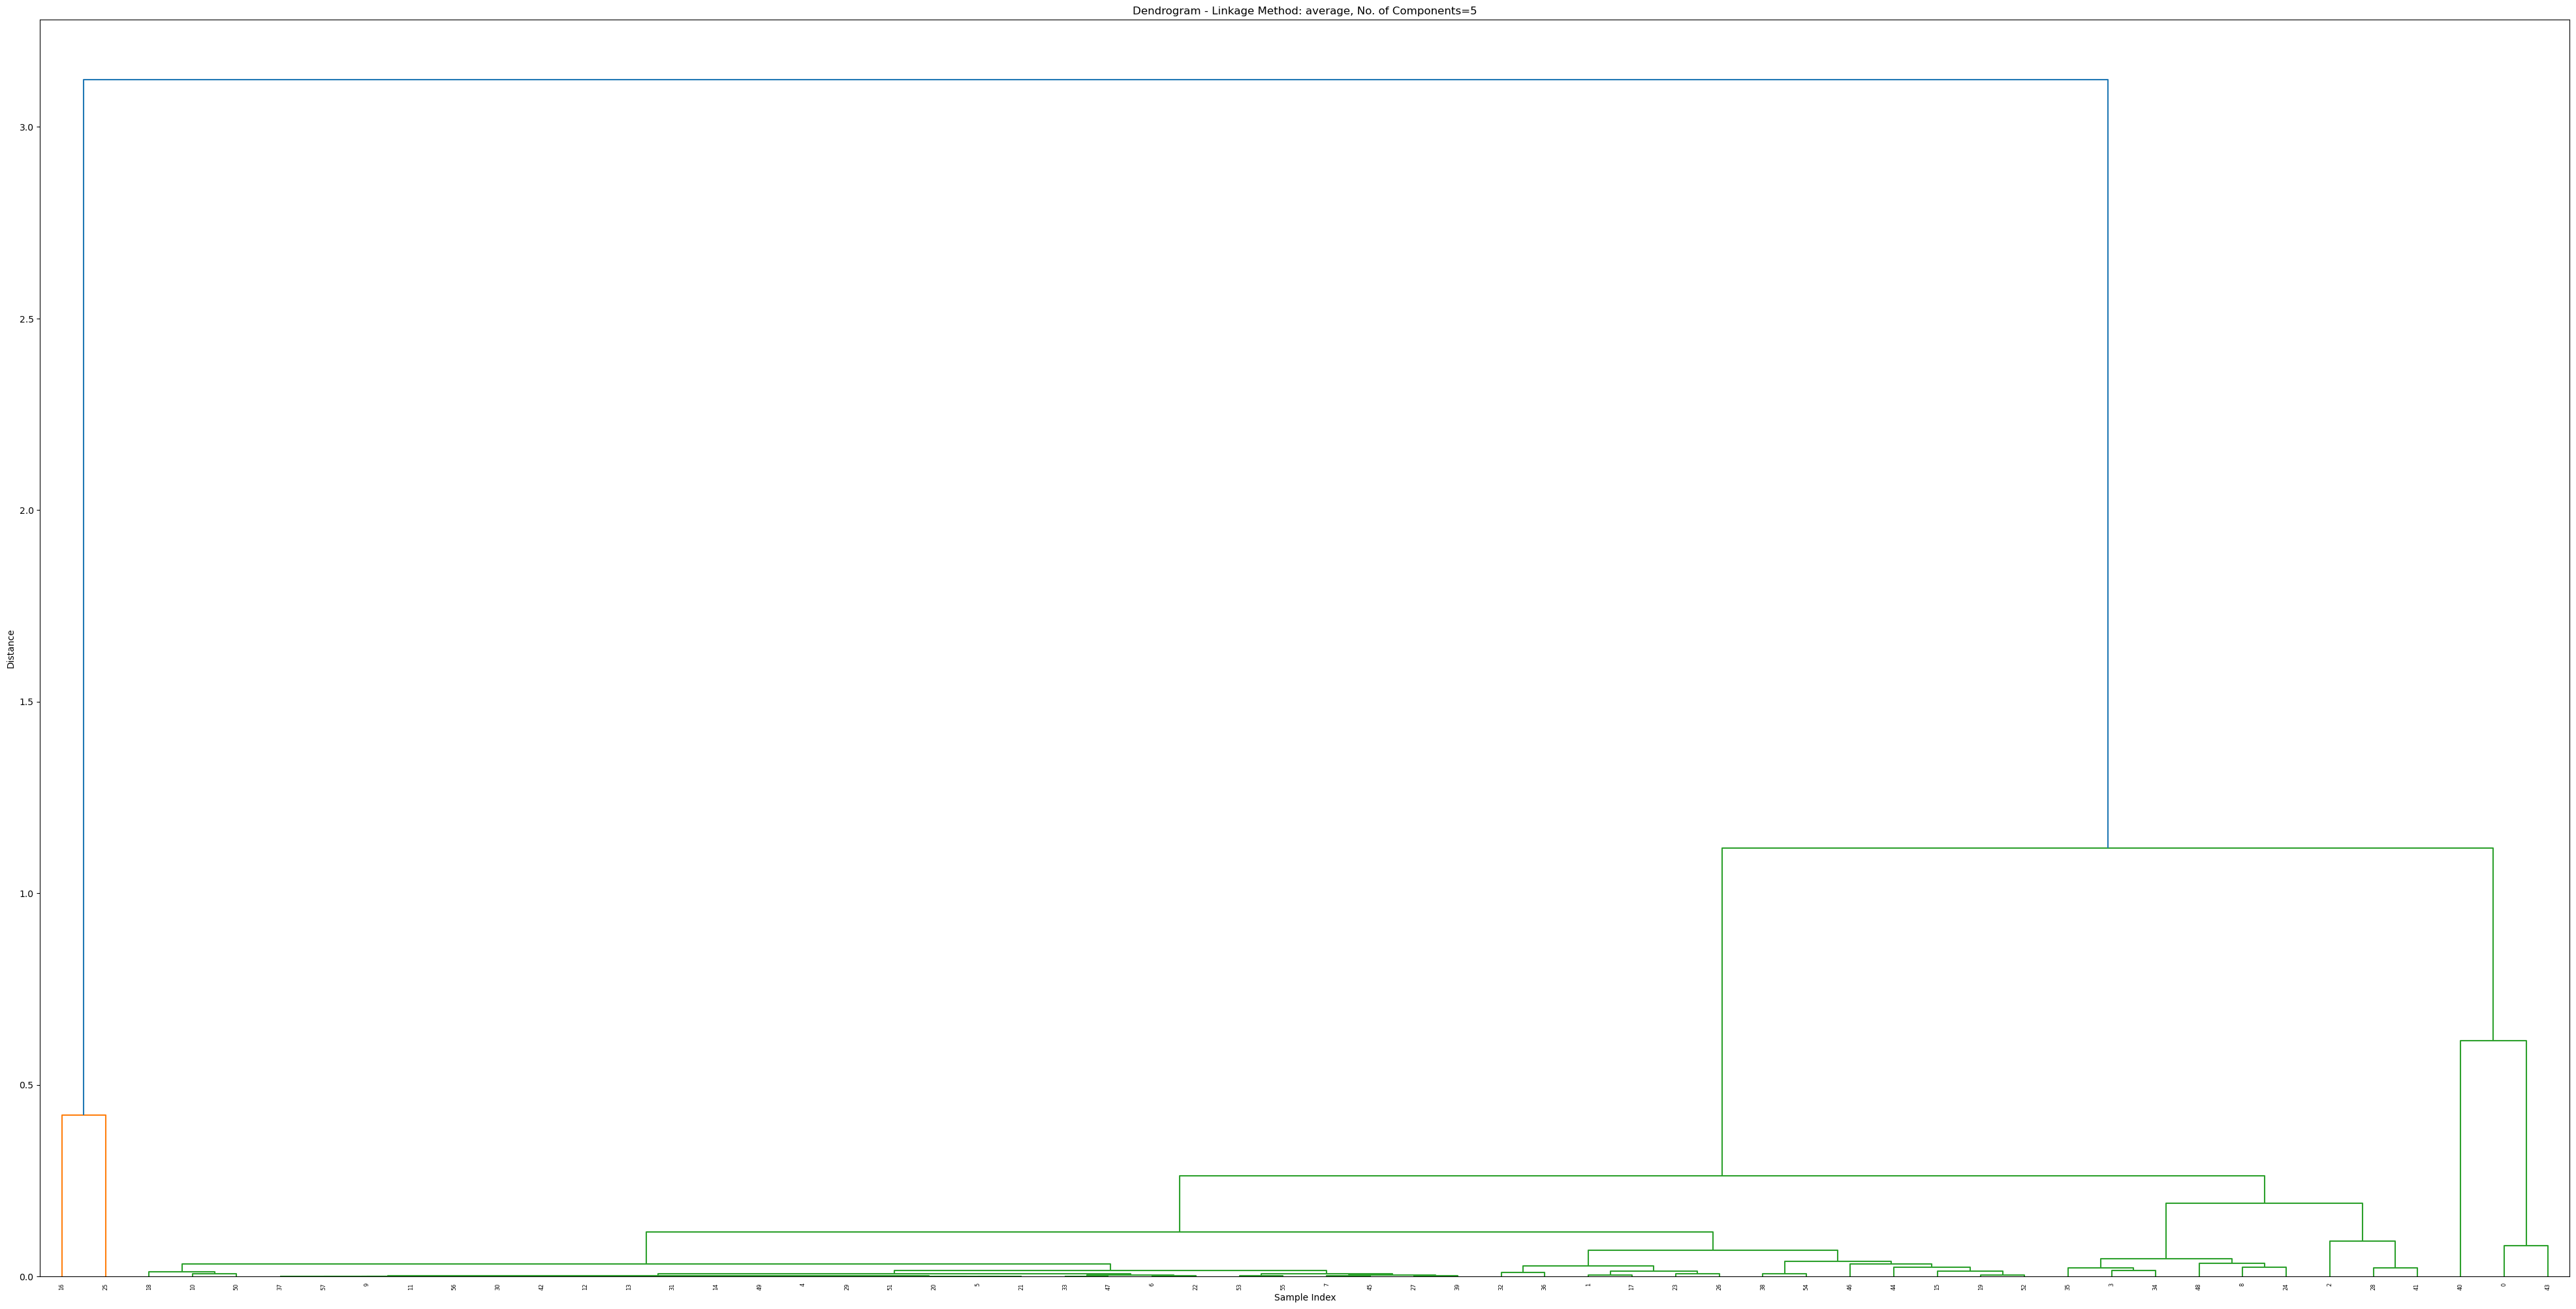

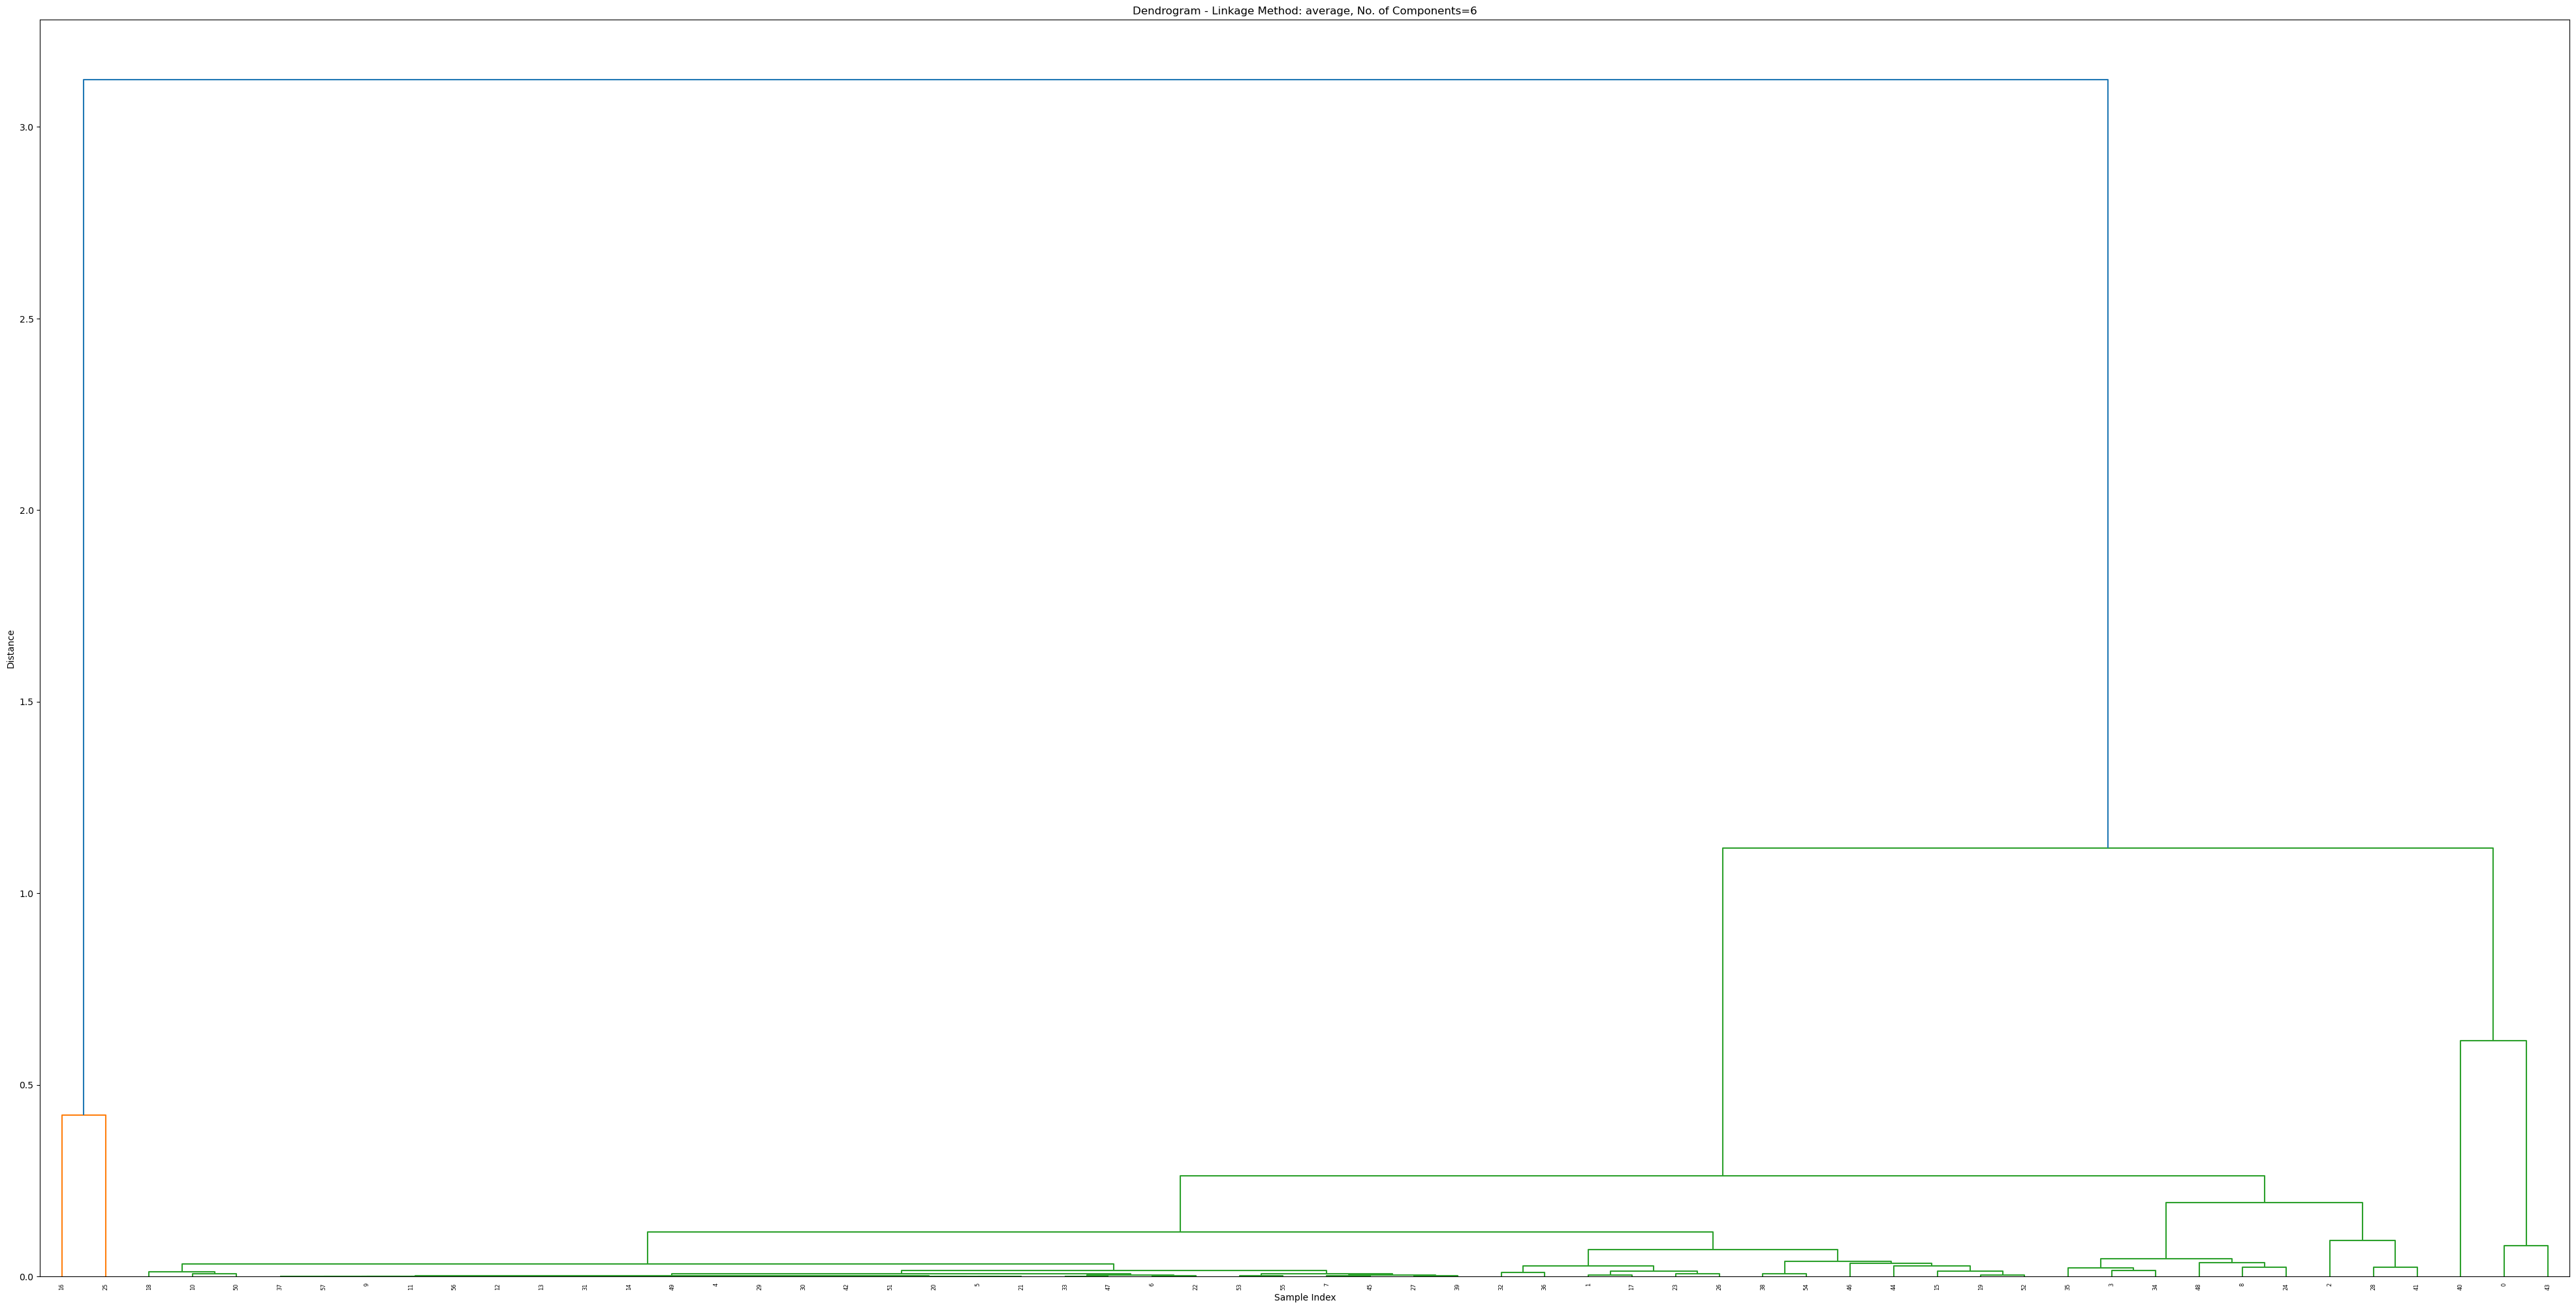

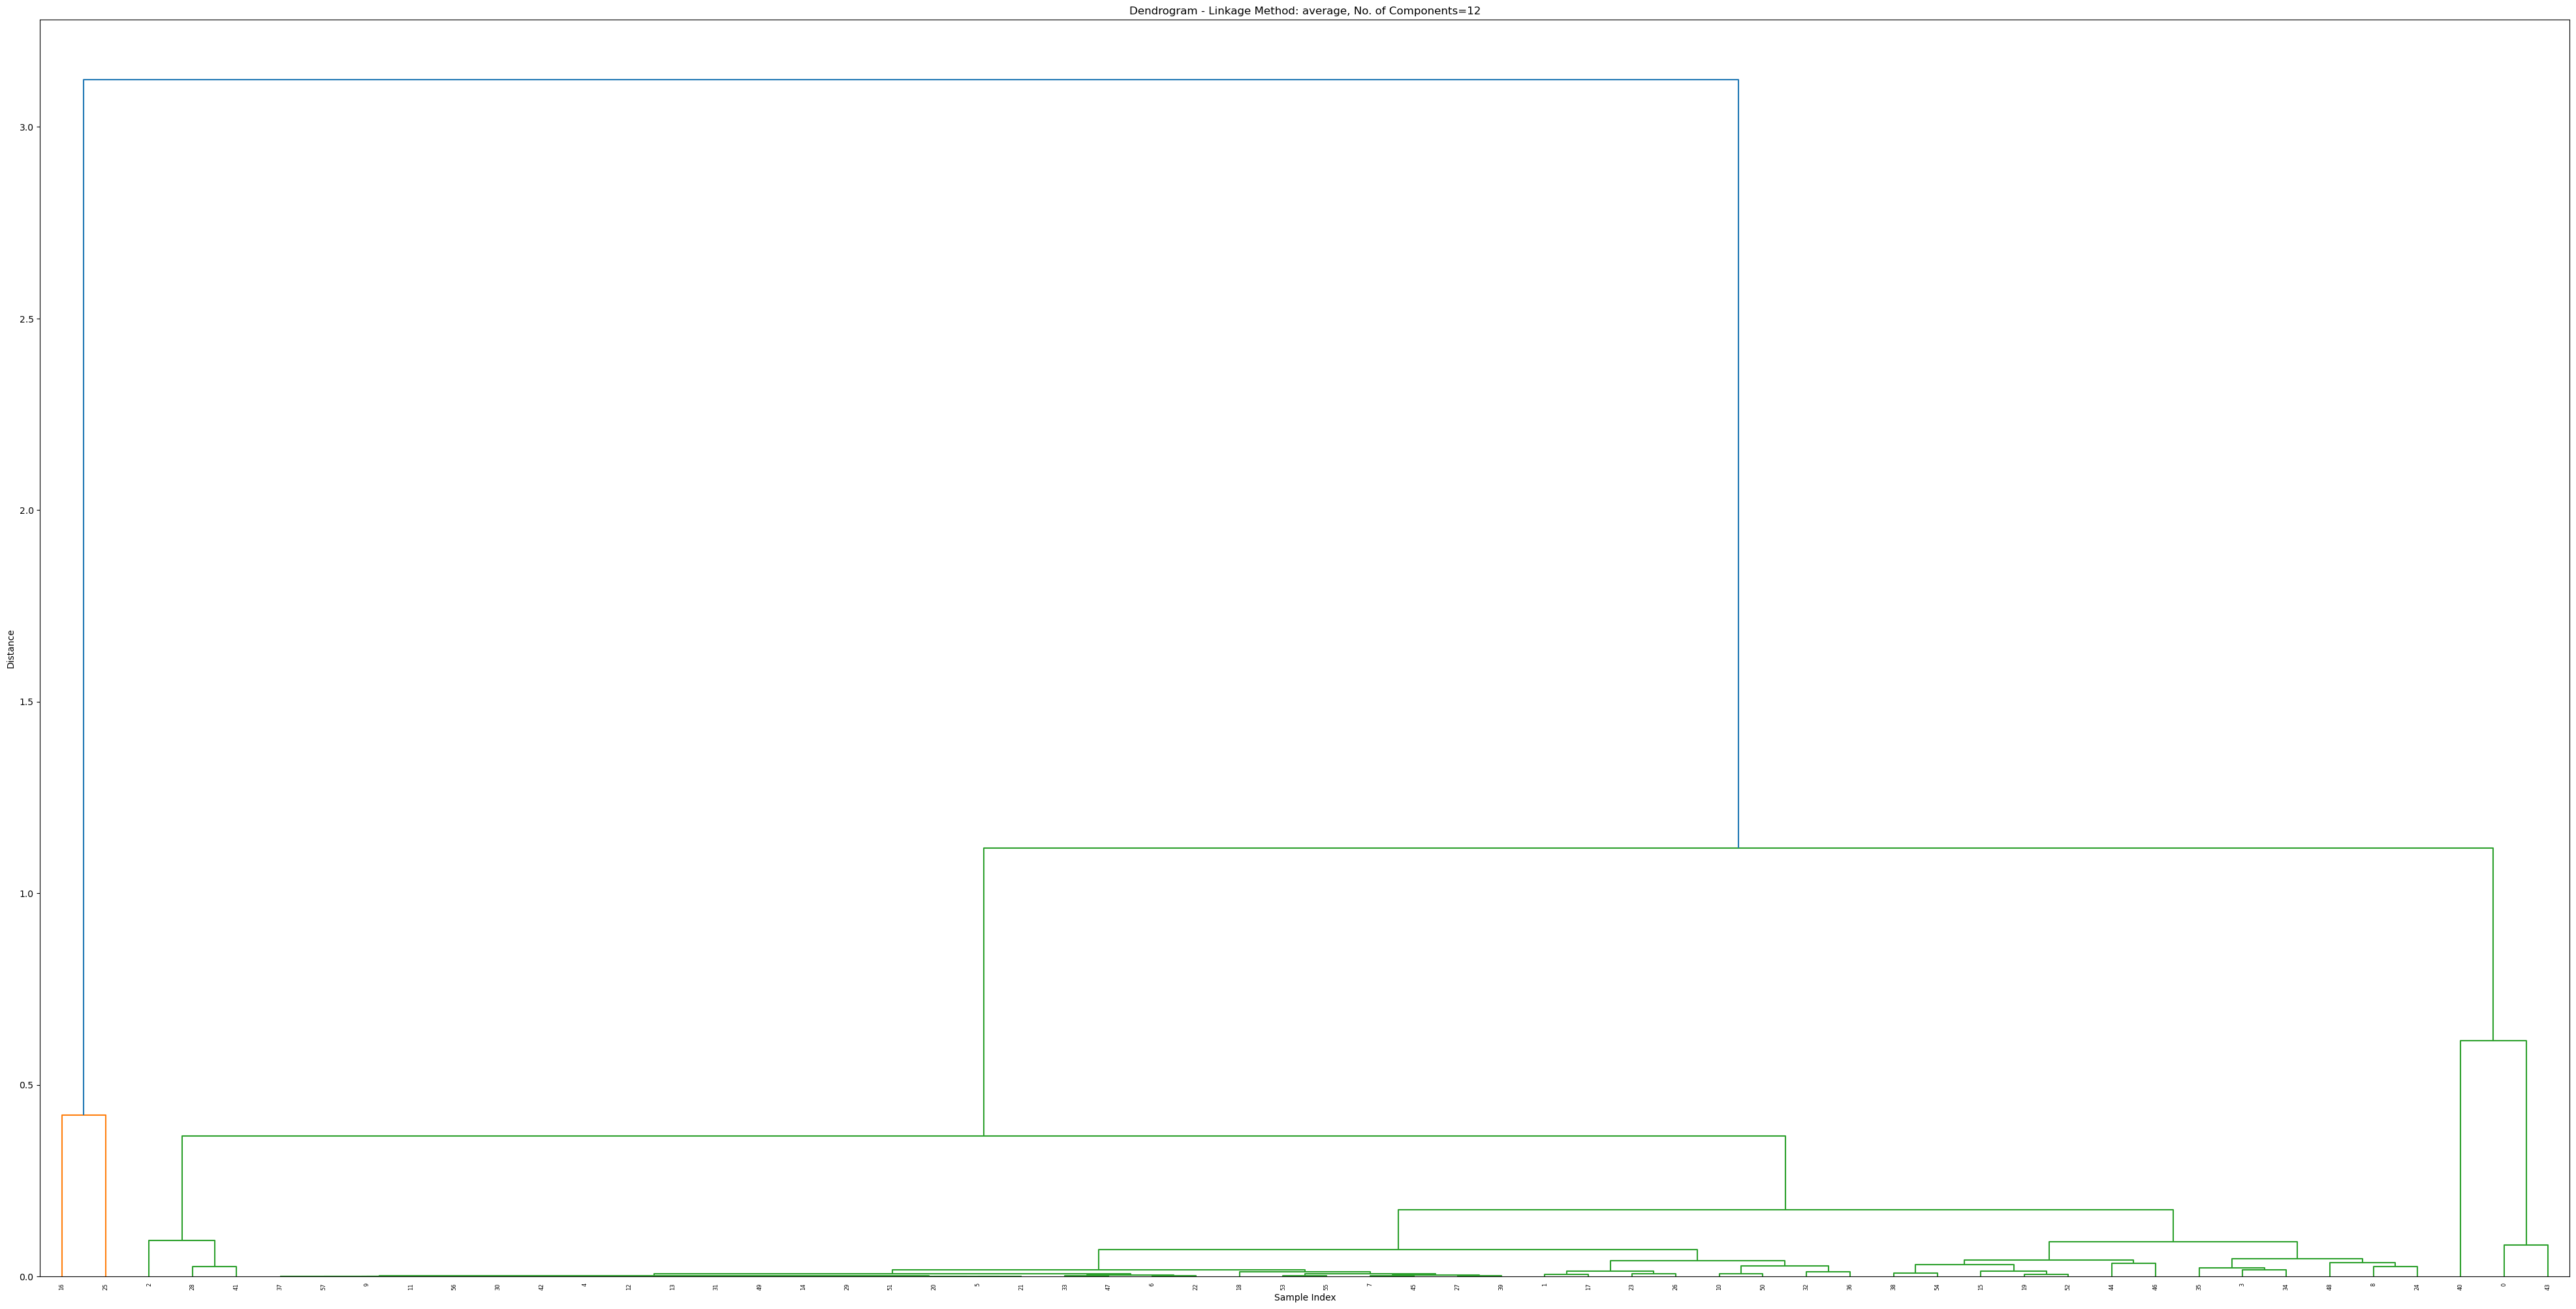

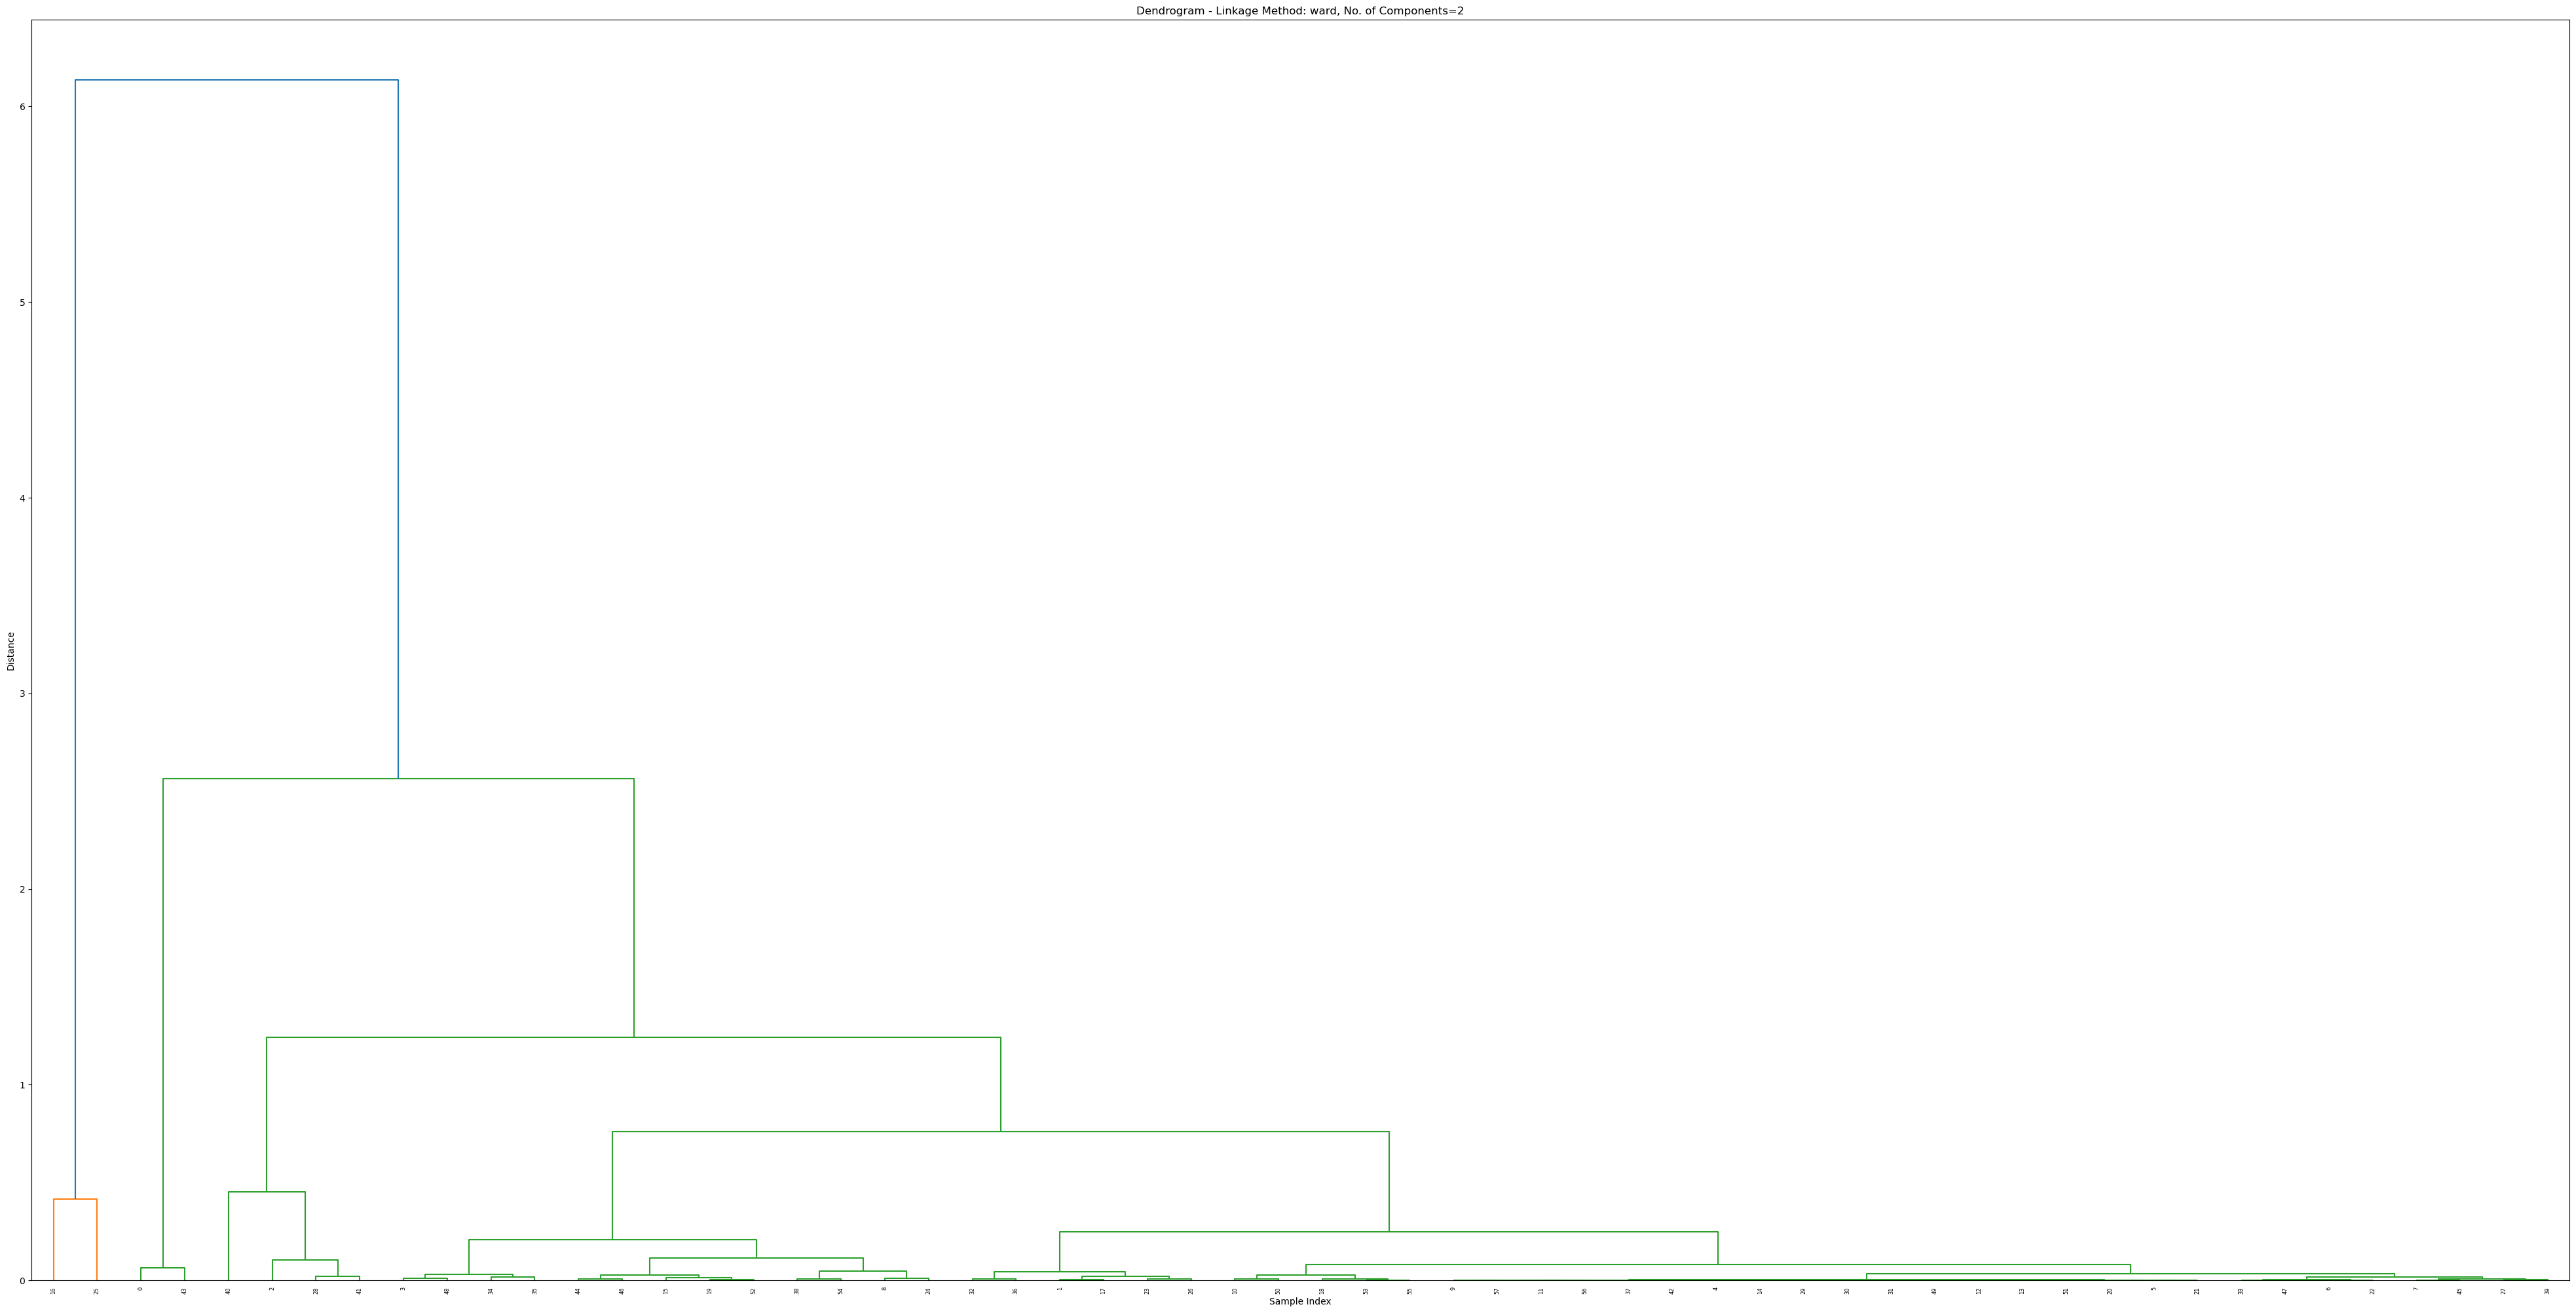

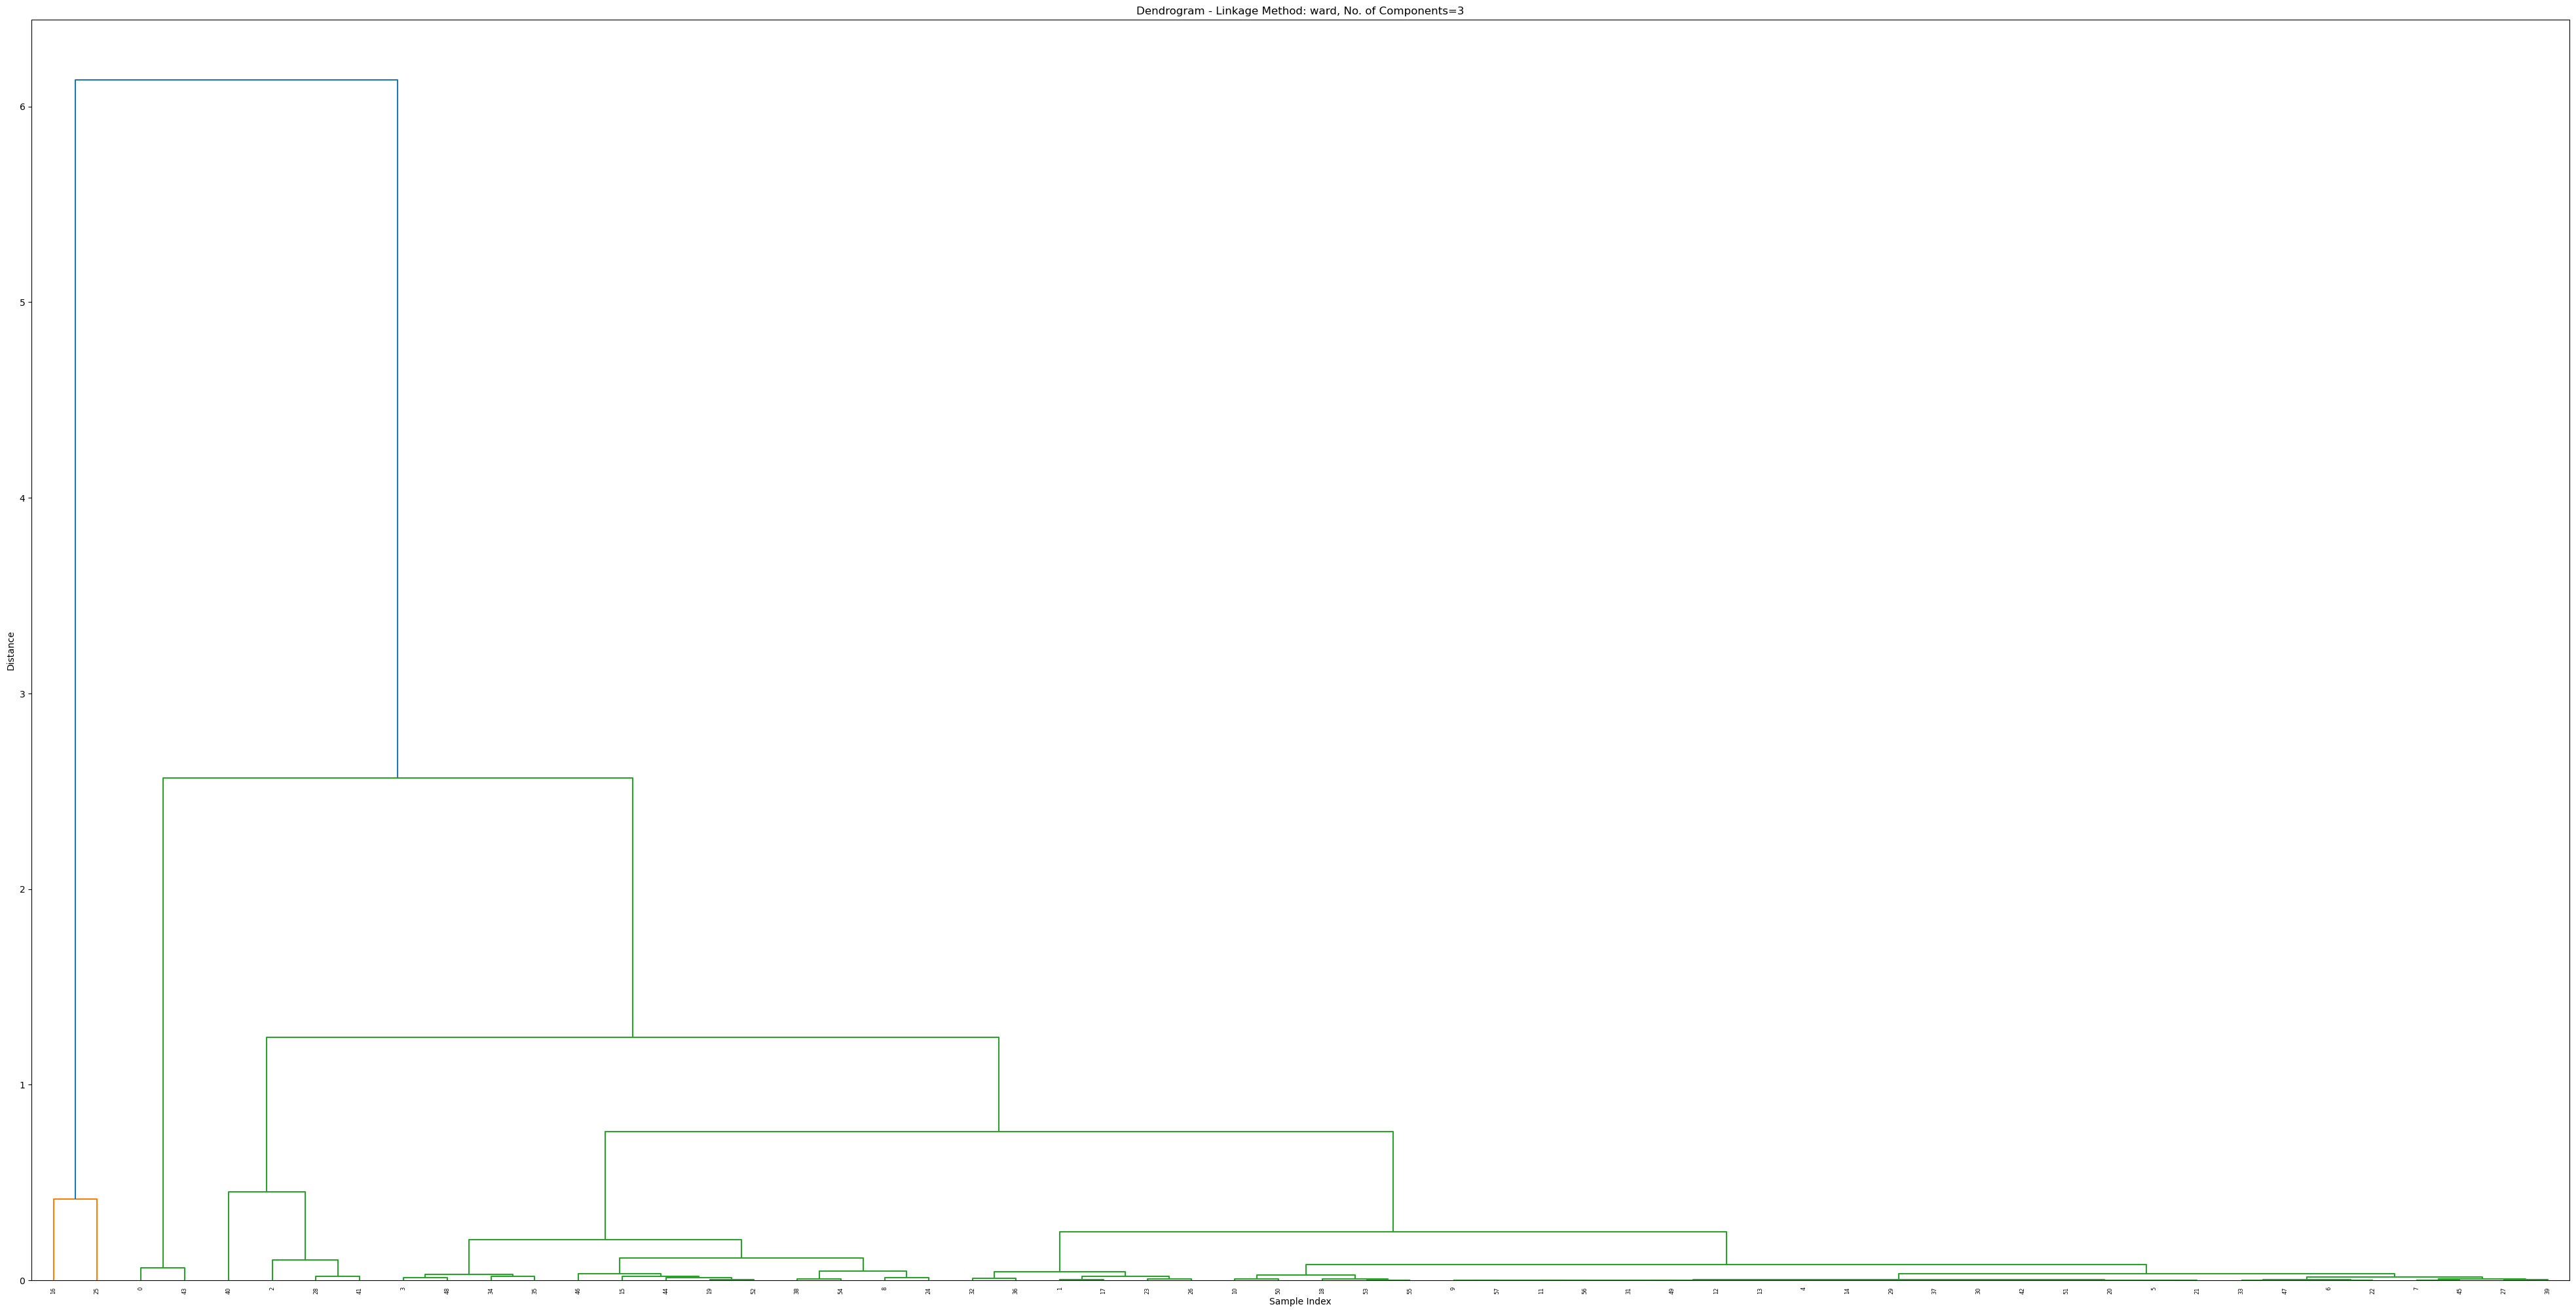

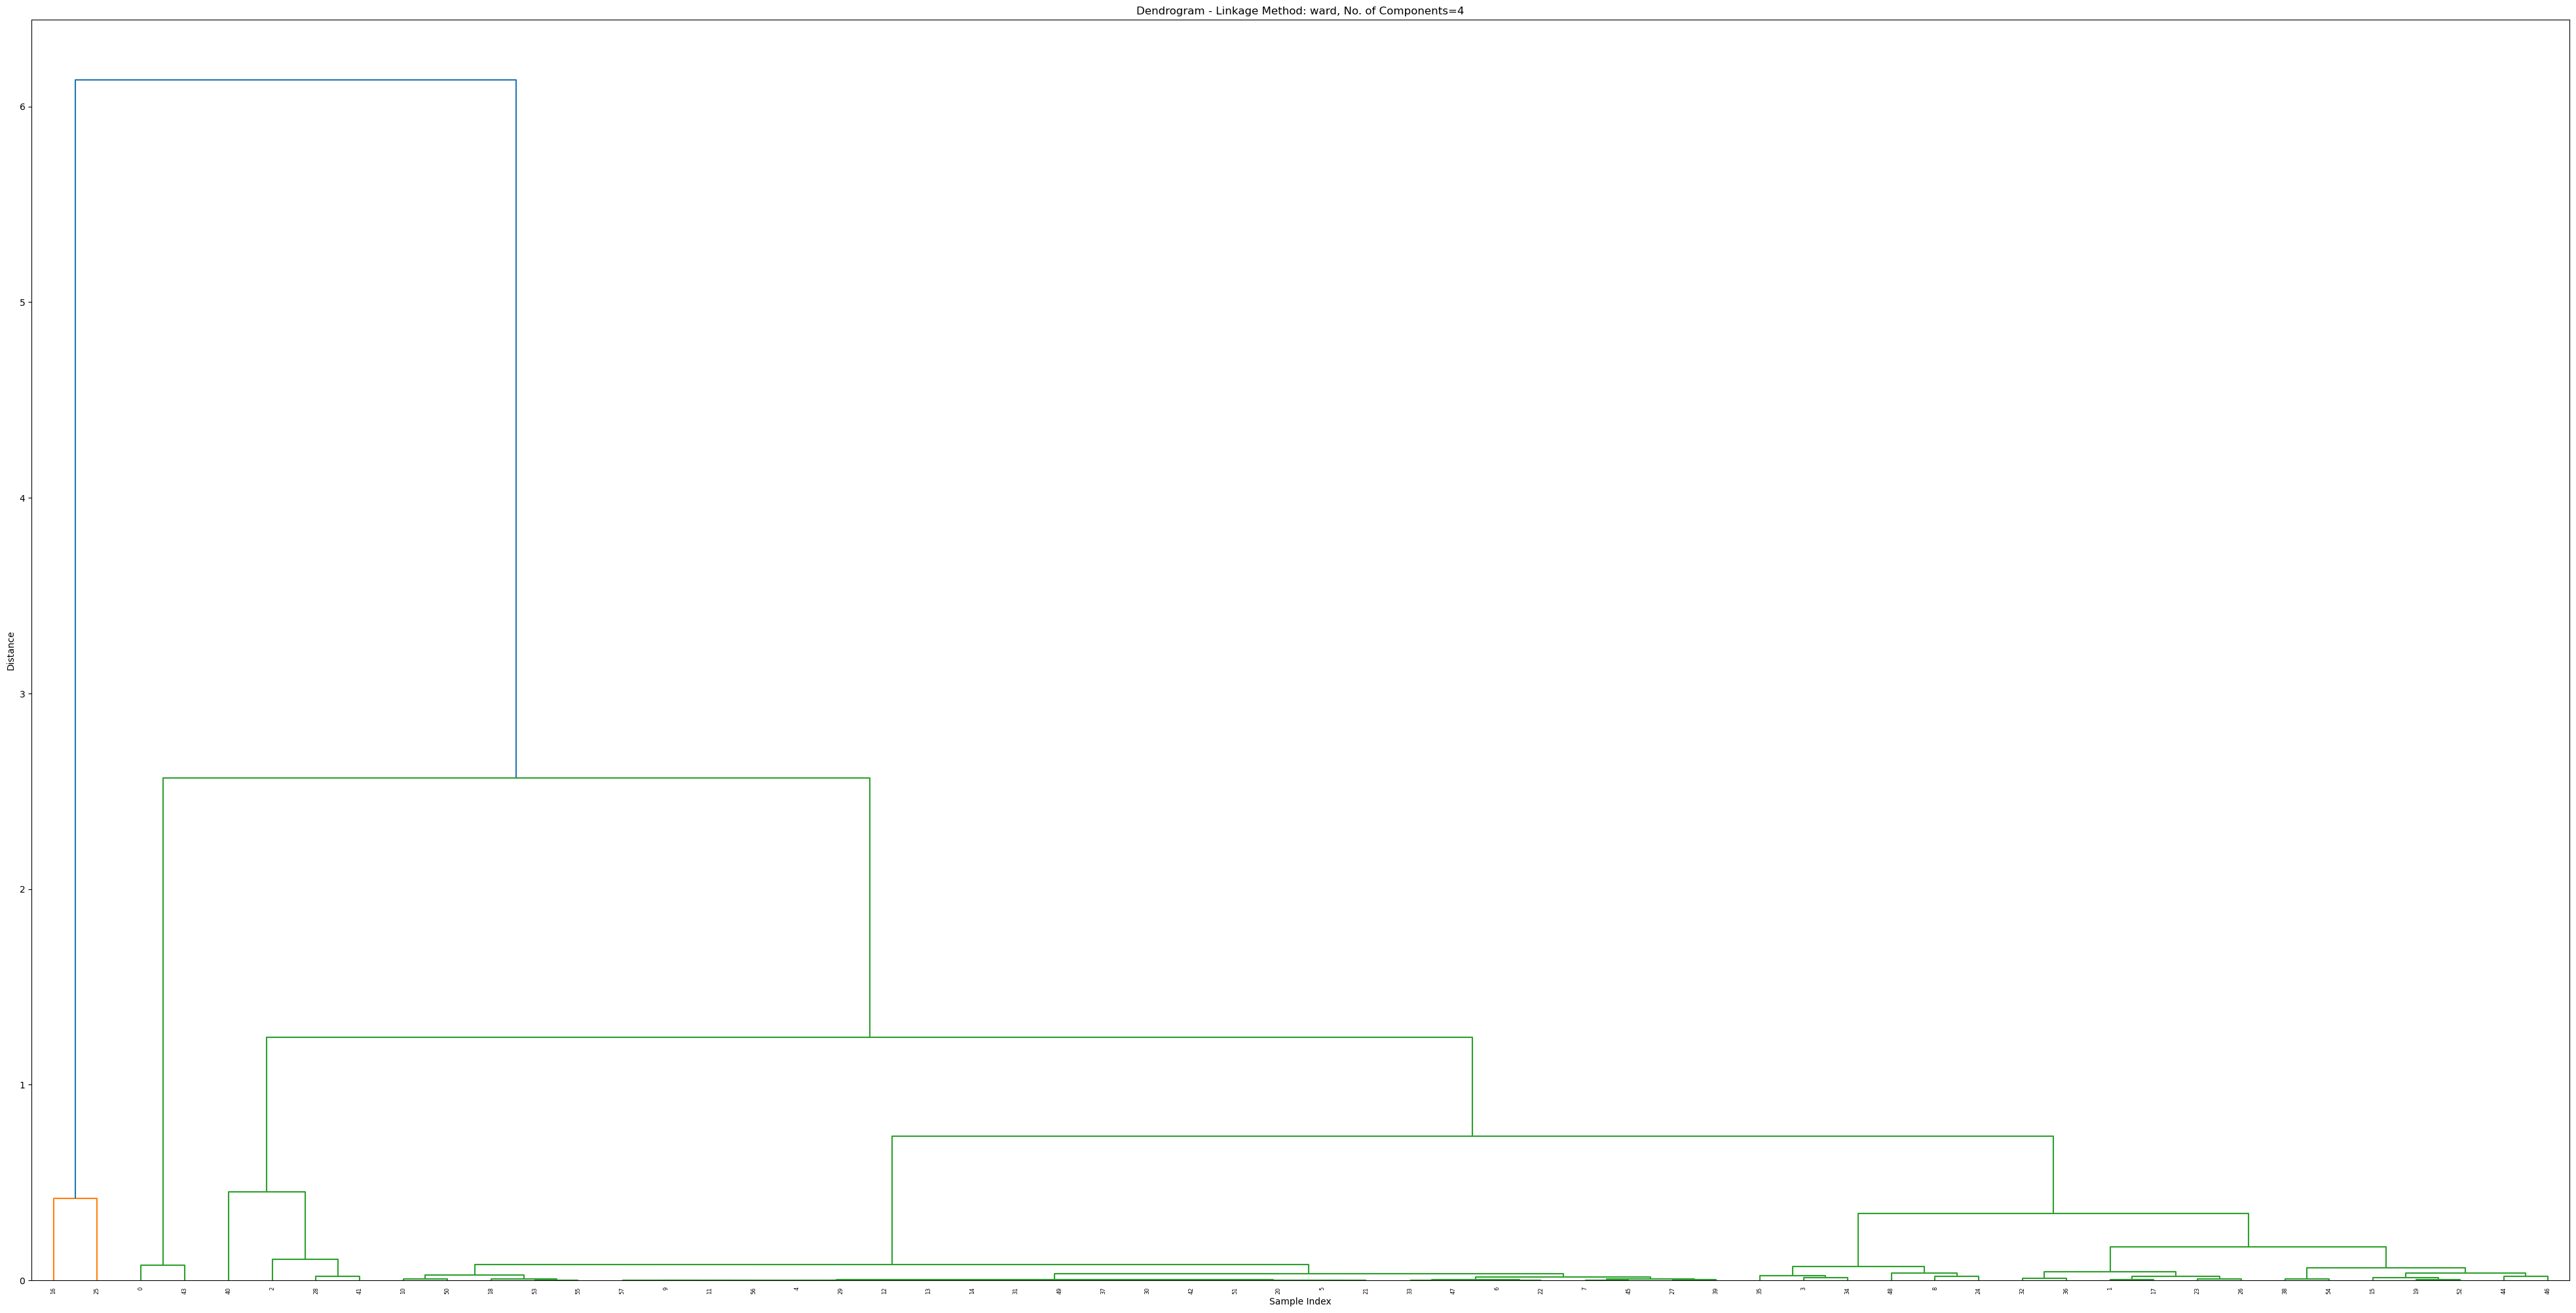

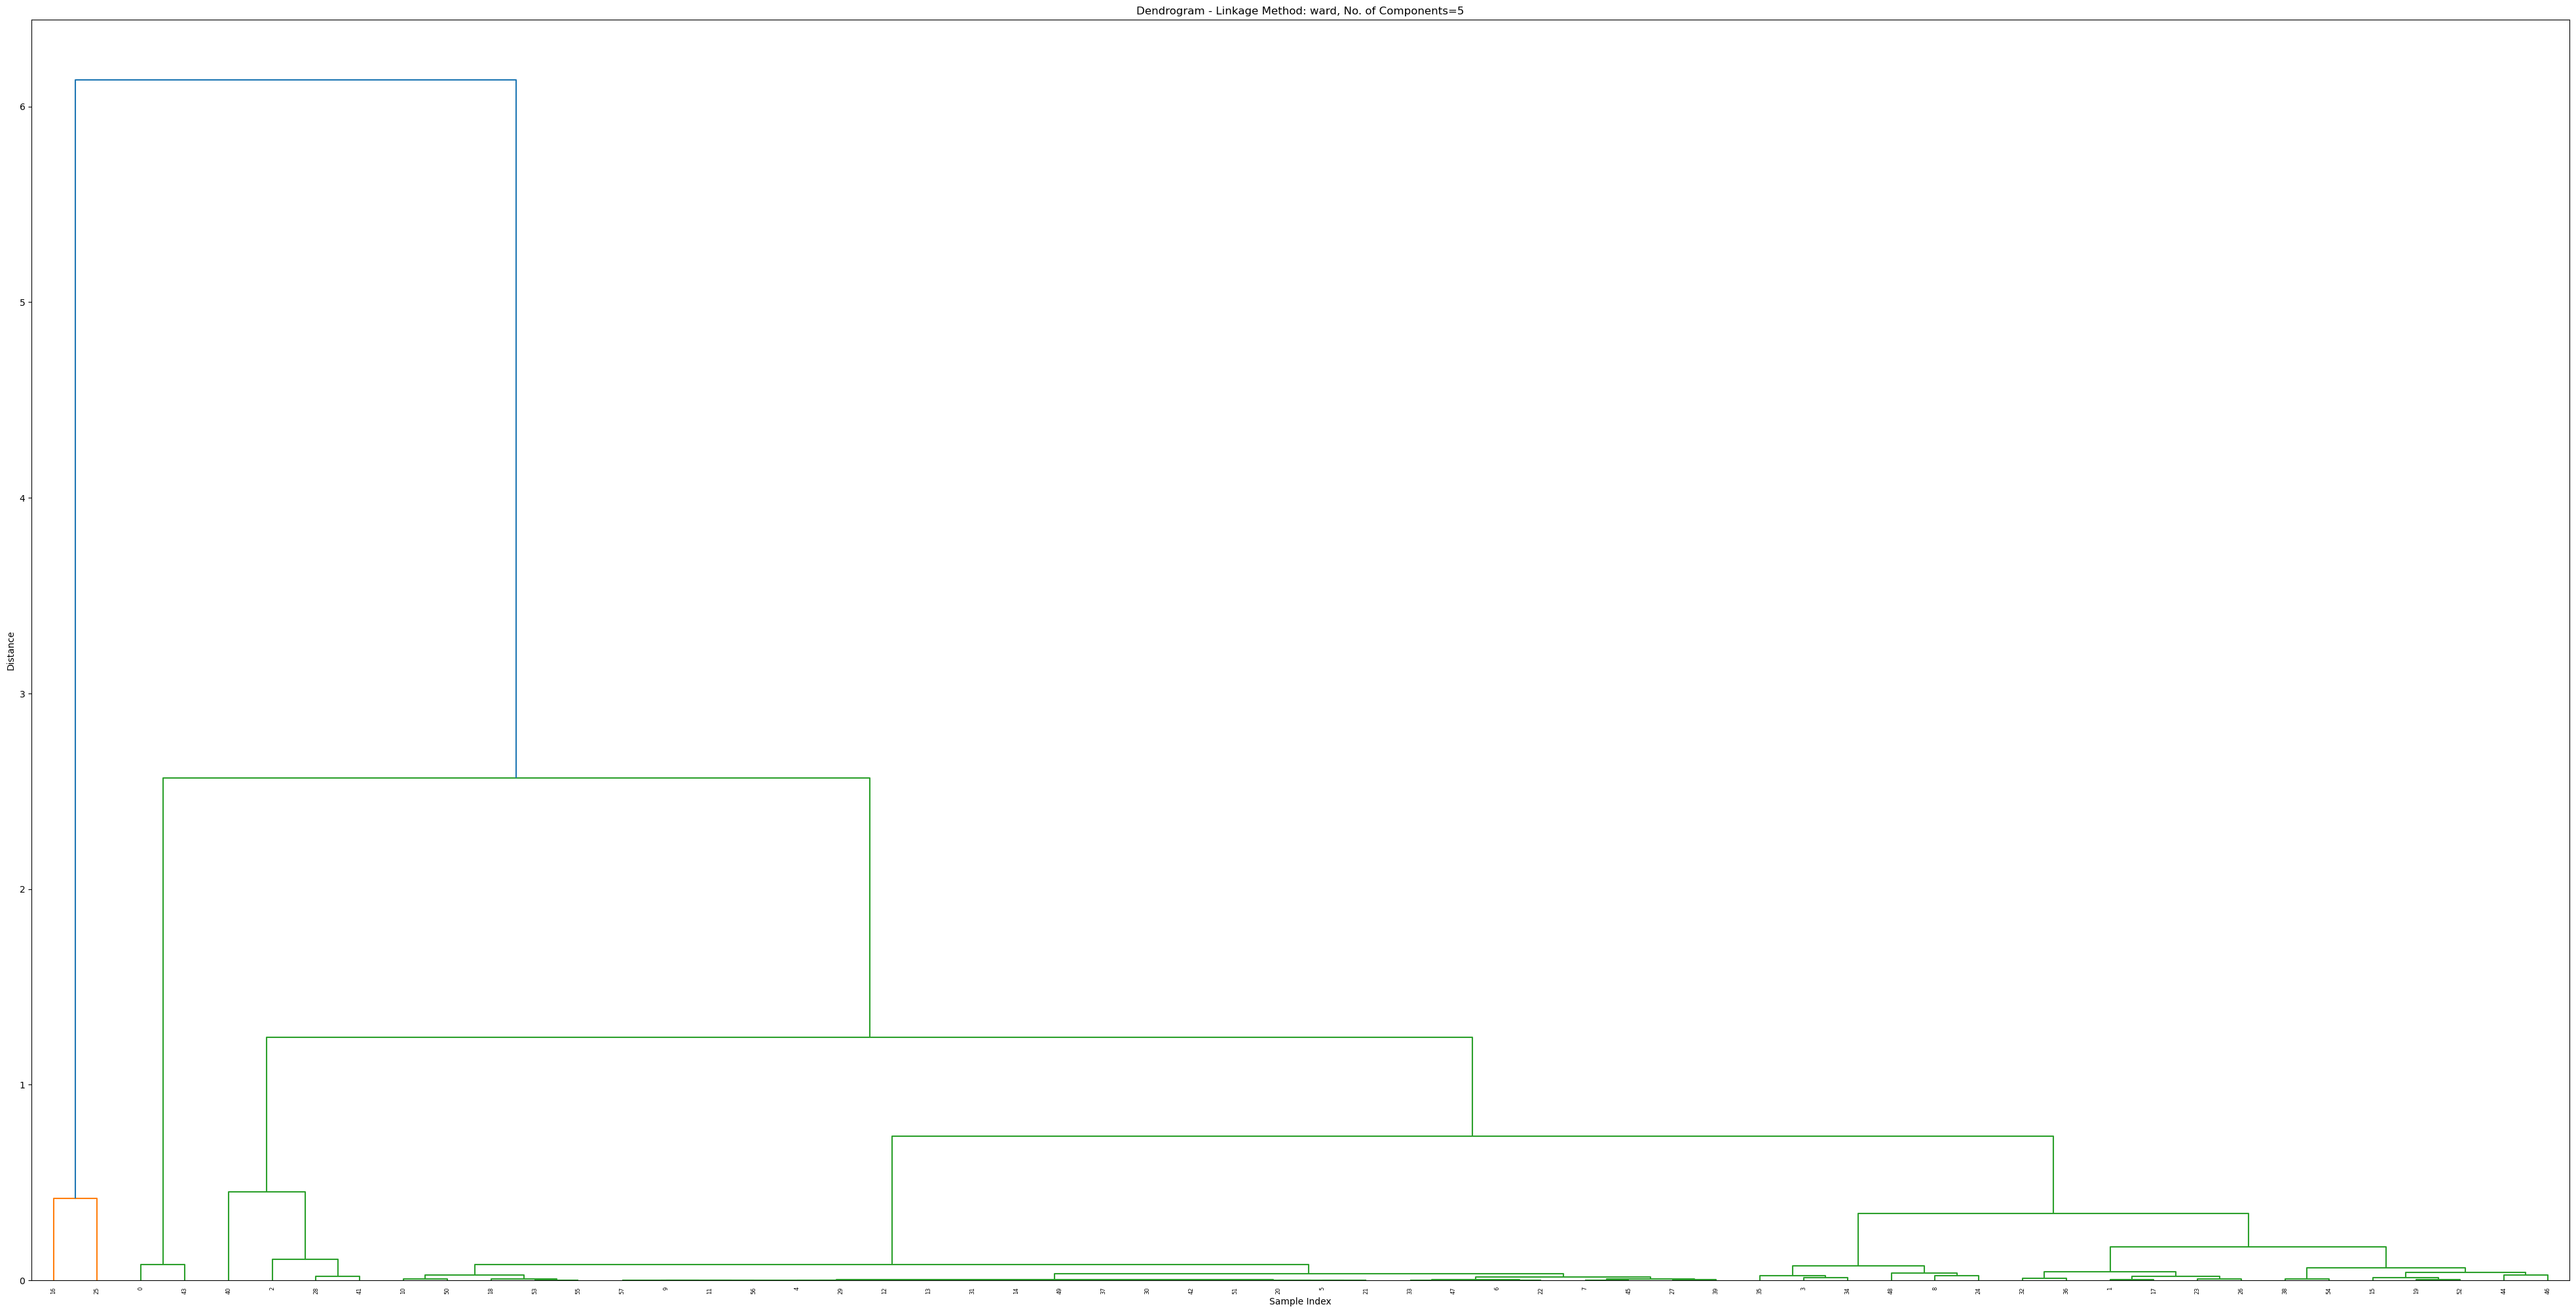

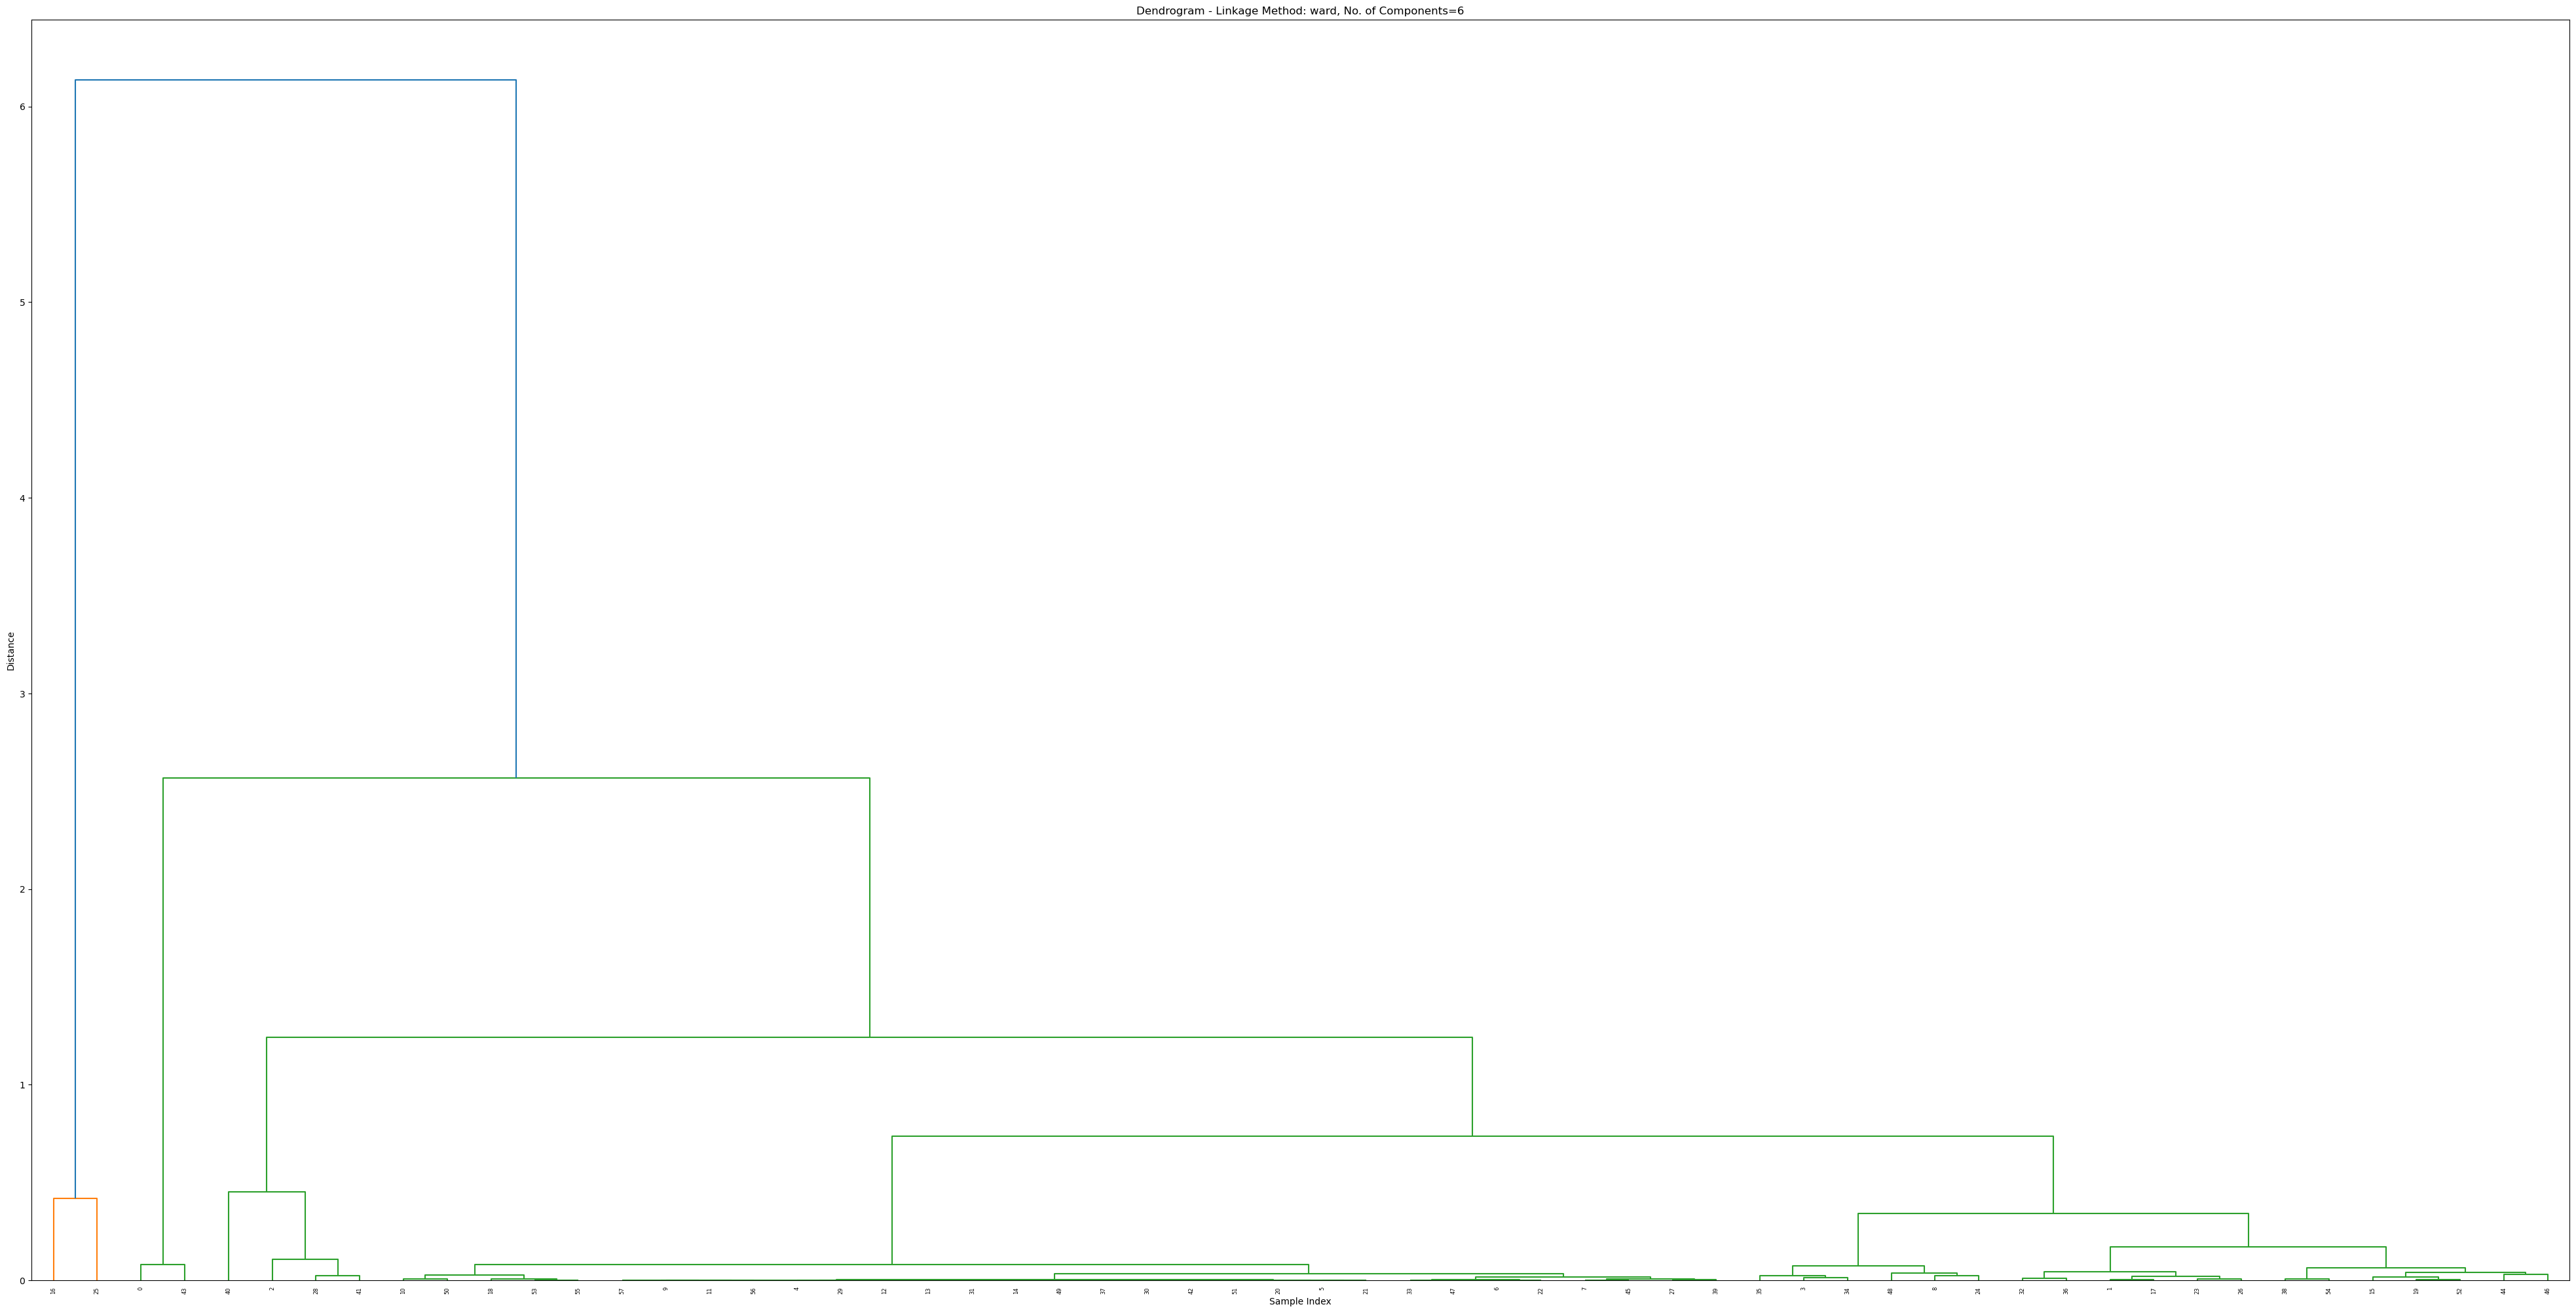

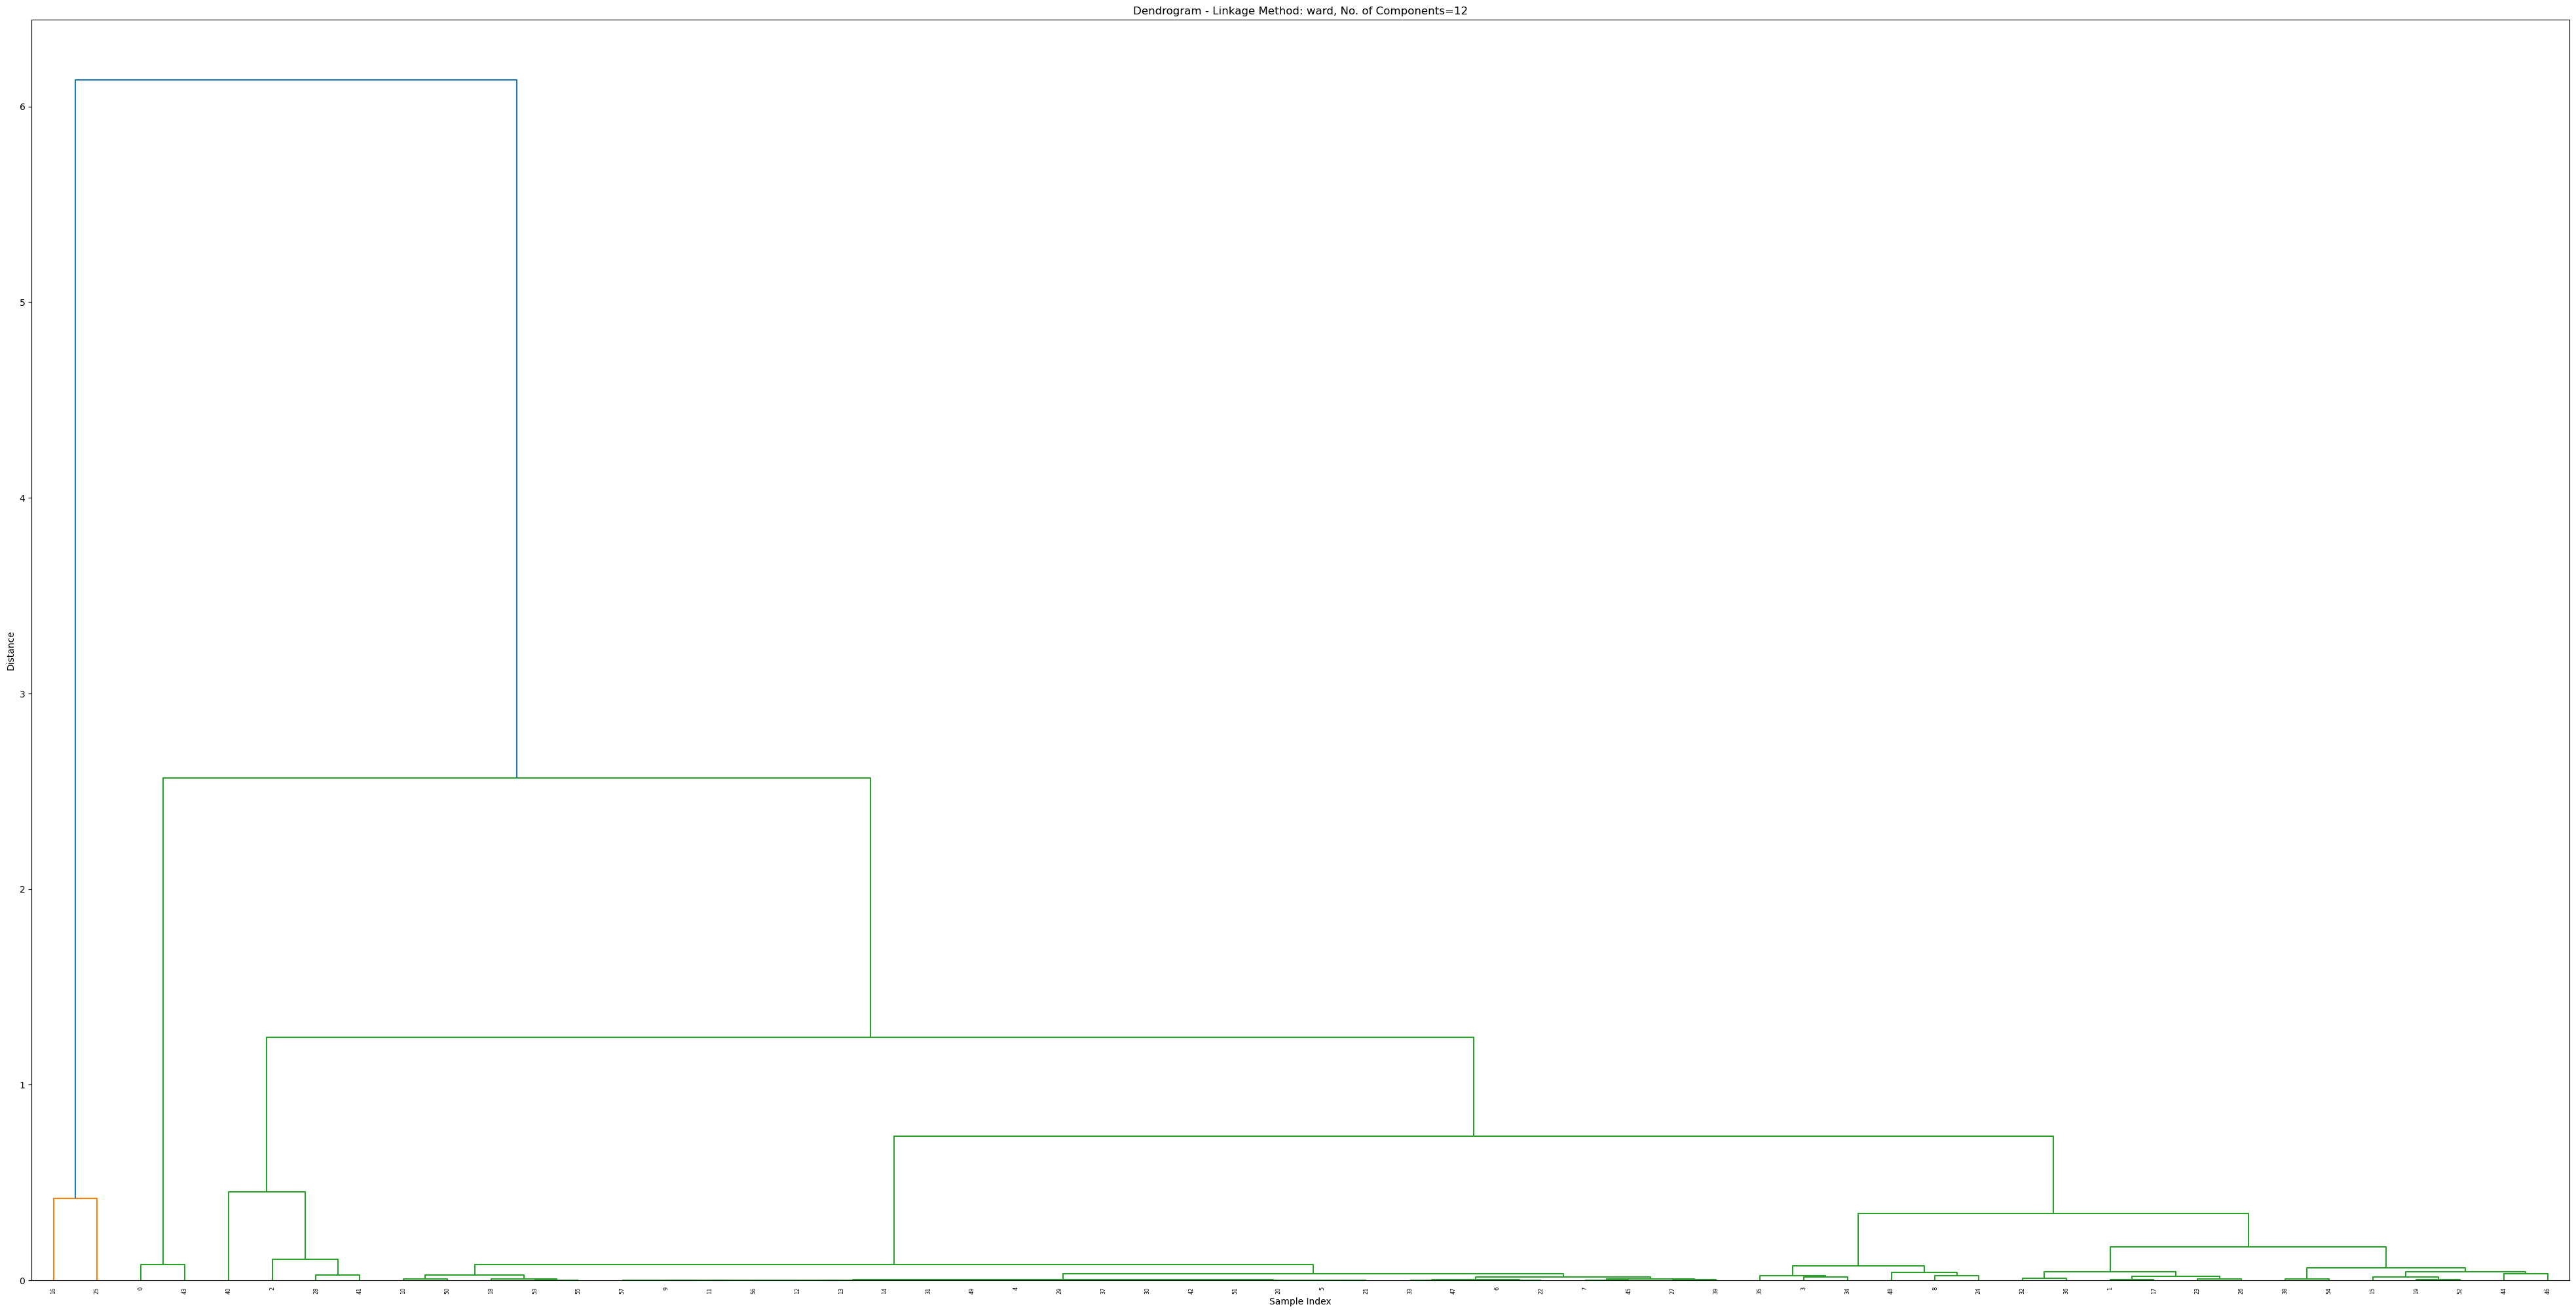

In [34]:
data=pd.read_csv('gene.csv')
data=data.iloc[:,1:].values
scalar=MinMaxScaler()
data=scalar.fit_transform(data)
links=['single','complete','average','ward']
n_comps=[2,3,4,5,6,12]
hc=HC()
for l in links:
    for n in n_comps:
        pca=PCA(n_components=n)
        data_pca=pca.fit_transform(data)
        plt.figure(figsize=(50, 25))
        Z=hc.linkages(data_pca,l)
        plt.title(f"Dendrogram - Linkage Method: {l}, No. of Components={n}")
        hc.Dendogram(Z)
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()